In [159]:
#Several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error #calculating RMSE

#importing statistical libraries from statsmodel
from statsmodels.tsa.seasonal import seasonal_decompose #for seasonal decompose
from statsmodels.tsa.api    import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tools.eval_measures as      em #calculating RMSE
from statsmodels.tsa.stattools import adfuller

#importing pmdarima for auto ARIMA,SARIMA
!pip install pmdarima
from pmdarima.arima import auto_arima


import datetime as dt




[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [160]:
#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## EDA of file_02

In [161]:
#reading df file
df=pd.read_csv("file_02.csv")

In [162]:
#to avoid truncated values
pd.set_option('display.max_row',999)
pd.set_option('display.max_columns',999)
pd.set_option('display.width',999)


In [163]:
#printing first 10 rows of the dataset
df.head(10)

index        Date        Region Thermal Generation Actual (in MU) Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  Hydro Generation Estimated (in MU)
0  0      2017-09-01  Northern      624.23                            484.21                               30.36                              35.57                                 273.27                           320.81                            
1  1      2017-09-01  Western       1,106.89                          1,024.33                             25.17                              3.81                                  72.00                            21.53                             
2  2      2017-09-01  Southern      576.66                            578.55                               62.73                              49.80                                 111.57                           64.78                             
3  3      2017-09-01  Eastern       441.02                            429.39                              NaN                                NaN                                    85.94                            69.36                             
4  4      2017-09-01  NorthEastern  29.11                             15.91                               NaN                                NaN                                    24.64                            21.21                             
5  5      2017-09-02  Northern      624.23                            507.42                               30.36                              35.69                                 273.27                           317.19                            
6  6      2017-09-02  Western       1,106.89                          1,050.91                             25.17                              3.83                                  72.00                            23.97                             
7  7      2017-09-02  Southern      576.66                            562.79                               62.73                              52.76                                 111.57                           59.49                             
8  8      2017-09-02  Eastern       441.02                            425.75                              NaN                                NaN                                    85.94                            74.18                             
9  9      2017-09-02  NorthEastern  29.11                             16.50                               NaN                                NaN                                    24.64                            20.81

In [164]:
#printing last 10 rows of the dataset
df.tail(10)

index        Date        Region Thermal Generation Actual (in MU) Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  Hydro Generation Estimated (in MU)
4935  300    2020-07-31  Northern      708.11                            625.88                               26.88                              22.78                                 327.08                           348.39                            
4936  301    2020-07-31  Western       1,199.28                          1,288.65                             42.37                              36.68                                 29.75                            19.26                             
4937  302    2020-07-31  Southern      543.60                            444.43                               61.83                              26.21                                 61.43                            85.42                             
4938  303    2020-07-31  Eastern       496.03                            553.21                              NaN                                NaN                                    80.00                            96.30                             
4939  304    2020-07-31  NorthEastern  36.98                             30.94                               NaN                                NaN                                    27.51                            29.76                             
4940  305    2020-08-01  Northern      669.47                            602.96                               26.88                              23.41                                 348.72                           351.98                            
4941  306    2020-08-01  Western       1,116.00                          1,262.10                             42.37                              36.63                                 54.67                            20.28                             
4942  307    2020-08-01  Southern      494.66                            415.53                               61.83                              26.28                                 93.49                            77.25                             
4943  308    2020-08-01  Eastern       482.86                            547.03                              NaN                                NaN                                    87.22                            93.78                             
4944  309    2020-08-01  NorthEastern  34.42                             32.81                               NaN                                NaN                                    29.87                            29.96

From the code it can seen that there are some null values in the data.In Eastern zone and North Eastern Zone mainly the null values are there for Nuclear Power generation.IT is because there are no nuclear power plant in Eastern and North Eastern India.

Data is taken from 1st of september 2017 -1st of august 2020

In [165]:
#getting info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 4945 non-null   int64  
 1   Date                                  4945 non-null   object 
 2   Region                                4945 non-null   object 
 3   Thermal Generation Actual (in MU)     4945 non-null   object 
 4   Thermal Generation Estimated (in MU)  4945 non-null   object 
 5   Nuclear Generation Actual (in MU)     2967 non-null   float64
 6   Nuclear Generation Estimated (in MU)  2967 non-null   float64
 7   Hydro Generation Actual (in MU)       4945 non-null   float64
 8   Hydro Generation Estimated (in MU)    4945 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 347.8+ KB


There are 4945 rows and 9 columns are there.
Only  Nuclear Generation Actual (in MU) and  Nuclear Generation Estimated (in MU) have null values.
There are 4 float datatypes,1 integer and 4 object datatype variables.

In [166]:
#Replacing delimiter in Values in Thermal generation Actual and Estimated
df["Thermal Generation Actual (in MU)"]=df["Thermal Generation Actual (in MU)"].str.replace(',','')
df["Thermal Generation Estimated (in MU)"]=df["Thermal Generation Estimated (in MU)"].str.replace(',','')

In [167]:
#converting Thermal Generation Actual(in MU) and Thermal Generation Actual(in MU) from object to float
df["Thermal Generation Actual (in MU)"] = df["Thermal Generation Actual (in MU)"].astype(float)
df["Thermal Generation Estimated (in MU)"] = df["Thermal Generation Estimated (in MU)"].astype(float)

In [168]:
#getting statistical description of the data
df.describe()

index  Thermal Generation Actual (in MU)  Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  Hydro Generation Estimated (in MU)
count  4945.000000  4945.000000                        4945.000000                           2967.000000                        2967.000000                           4945.000000                      4945.000000                       
mean   2181.433771  603.978358                         575.395116                            37.242208                          36.987877                             73.305921                        76.842965                         
std    1397.754755  383.534208                         383.387299                            15.883968                          11.491292                             74.482145                        82.043952                         
min    0.000000     12.340000                          12.380000                             0.000000                           0.000000                              0.000000                         0.000000                          
25%    926.000000   470.050000                         427.460000                            26.140000                          30.190000                             26.910000                        23.310000                         
50%    2162.000000  615.280000                         535.980000                            30.720000                          34.840000                             52.960000                        50.270000                         
75%    3398.000000  689.530000                         672.740000                            46.830000                          43.075000                             85.940000                        95.800000                         
max    4634.000000  1395.970000                        1442.380000                           68.740000                          76.640000                             348.720000                       397.380000

Observations:1)Thermal power actual generation mean is more than estimated generation mean.Same with nuclear power generation.  
2)Where as Hydro Power generation in actual is less than estimated hydro power generation.  
3)Min power generation :-Thermal-12.34 MU,Nuclear-0,Hydro -0  
4)Max power generation :-Thermal-1395.97 MU,Nuclear-68.74 MU,Hydro-348.72 MU  

In [169]:
#removing unwanted columns
df.drop(['index'],axis=1,inplace=True)

In [170]:
#getting unique values from region columns
df['Region'].unique()

array(['Northern', 'Western', 'Southern', 'Eastern', 'NorthEastern'],
      dtype=object)

There are 5 region in the dataset-'Northern', 'Western', 'Southern', 'Eastern', 'NorthEastern'

In [171]:
#Counting duplicate values
df.duplicated().sum()

0

There are no duplicate values

In [172]:
#Counting null value
df.isnull().sum()

Date                                    0   
Region                                  0   
Thermal Generation Actual (in MU)       0   
Thermal Generation Estimated (in MU)    0   
Nuclear Generation Actual (in MU)       1978
Nuclear Generation Estimated (in MU)    1978
Hydro Generation Actual (in MU)         0   
Hydro Generation Estimated (in MU)      0   
dtype: int64

In [173]:
#Counting null values according to Region
missing_pct=df.isnull().sum()*100/len(df)
missing_pct

Date                                    0.0 
Region                                  0.0 
Thermal Generation Actual (in MU)       0.0 
Thermal Generation Estimated (in MU)    0.0 
Nuclear Generation Actual (in MU)       40.0
Nuclear Generation Estimated (in MU)    40.0
Hydro Generation Actual (in MU)         0.0 
Hydro Generation Estimated (in MU)      0.0 
dtype: float64

40 % of null values are present in Nuclear generation column.

In [174]:
#counting negative values
df[df[['Thermal Generation Actual (in MU)','Thermal Generation Estimated (in MU)','Nuclear Generation Actual (in MU)','Nuclear Generation Estimated (in MU)','Hydro Generation Actual (in MU)','Hydro Generation Estimated (in MU)']]<0].count()

Date                                    0
Region                                  0
Thermal Generation Actual (in MU)       0
Thermal Generation Estimated (in MU)    0
Nuclear Generation Actual (in MU)       0
Nuclear Generation Estimated (in MU)    0
Hydro Generation Actual (in MU)         0
Hydro Generation Estimated (in MU)      0
dtype: int64

There are no negative values.

In [175]:
df.groupby(['Region']).count()

Date  Thermal Generation Actual (in MU)  Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  Hydro Generation Estimated (in MU)
Region                                                                                                                                                                                                                                   
Eastern       989   989                                989                                   0                                  0                                     989                              989                               
NorthEastern  989   989                                989                                   0                                  0                                     989                              989                               
Northern      989   989                                989                                   989                                989                                   989                              989                               
Southern      989   989                                989                                   989                                989                                   989                              989                               
Western       989   989                                989                                   989                                989                                   989                              989

Observations:only 2 region has null values ,Eastern and North Eastern region,where there are no nuclear power plants.

In [176]:
df1=df.groupby(by='Region')[['Thermal Generation Actual (in MU)','Thermal Generation Estimated (in MU)','Nuclear Generation Actual (in MU)','Nuclear Generation Estimated (in MU)','Hydro Generation Actual (in MU)','Hydro Generation Estimated (in MU)']].sum()
df1


Thermal Generation Actual (in MU)  Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  Hydro Generation Estimated (in MU)
Region                                                                                                                                                                                                                             
Eastern       482123.72                          468831.45                             0.00                               0.00                                  48686.62                         52461.95                          
NorthEastern  32115.79                           33105.95                              0.00                               0.00                                  17612.32                         14058.66                          
Northern      655048.26                          602168.52                             26964.08                           31378.94                              188854.16                        201204.03                         
Southern      610753.56                          543828.71                             55855.21                           46483.24                              71109.34                         77083.80                          
Western       1206631.65                         1197394.22                            27678.34                           31880.85                              36235.34                         35180.02

Western Region has the highest consumption of Thermal Power.  
Southern Region has the highest consumption of Nuclear Power.  
Northern Region has the highest consumption of Hydro Power.  
There are no generation of Nuclear Power in Eastern Region and North Eastern Region.  
All the regions are highly dependent on Thermal Power.

In [177]:
#filling all the NAN values with zero
df['Nuclear Generation Actual (in MU)']=df['Nuclear Generation Actual (in MU)'].fillna(0)
df['Nuclear Generation Estimated (in MU)']=df['Nuclear Generation Estimated (in MU)'].fillna(0)

In [178]:
#calculating total power generated and estimated
df['Total Power Actual Generated (in MU)']=df['Thermal Generation Actual (in MU)']+df['Nuclear Generation Actual (in MU)']+df['Hydro Generation Actual (in MU)']
df['Total Power Estimated (in MU)']=df['Thermal Generation Estimated (in MU)']+df['Nuclear Generation Estimated (in MU)']+df['Hydro Generation Estimated (in MU)']
df

Date        Region  Thermal Generation Actual (in MU)  Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  Hydro Generation Estimated (in MU)  Total Power Actual Generated (in MU)  Total Power Estimated (in MU)
0     2017-09-01  Northern      624.23                             484.21                                30.36                              35.57                                 273.27                           320.81                              927.86                                840.59                       
1     2017-09-01  Western       1106.89                            1024.33                               25.17                              3.81                                  72.00                            21.53                               1204.06                               1049.67                      
2     2017-09-01  Southern      576.66                             578.55                                62.73                              49.80                                 111.57                           64.78                               750.96                                693.13                       
3     2017-09-01  Eastern       441.02                             429.39                                0.00                               0.00                                  85.94                            69.36                               526.96                                498.75                       
4     2017-09-01  NorthEastern  29.11                              15.91                                 0.00                               0.00                                  24.64                            21.21                               53.75                                 37.12                        
...          ...           ...    ...                                ...                                  ...                                ...                                    ...                              ...                                 ...                                   ...                        
4940  2020-08-01  Northern      669.47                             602.96                                26.88                              23.41                                 348.72                           351.98                              1045.07                               978.35                       
4941  2020-08-01  Western       1116.00                            1262.10                               42.37                              36.63                                 54.67                            20.28                               1213.04                               1319.01                      
4942  2020-08-01  Southern      494.66                             415.53                                61.83                              26.28                                 93.49                            77.25                               649.98                                519.06                       
4943  2020-08-01  Eastern       482.86                             547.03                                0.00                               0.00                                  87.22                            93.78                               570.08                                640.81                       
4944  2020-08-01  NorthEastern  34.42                              32.81                                 0.00                               0.00                                  29.87                            29.96                               64.29                                 62.77                        

[4945 rows x 10 columns]

In [179]:
#getting region wise total power 
df1=df.groupby(by='Region')[['Total Power Actual Generated (in MU)','Total Power Estimated (in MU)']].sum()
df1


Total Power Actual Generated (in MU)  Total Power Estimated (in MU)
Region                                                                           
Eastern       530810.34                             521293.40                    
NorthEastern  49728.11                              47164.61                     
Northern      870866.50                             834751.49                    
Southern      737718.11                             667395.75                    
Western       1270545.33                            1264455.09

Western Region has the highest consumption of Electricity Power.  
North Eastern Region has the lowest Consumption of Electricity Power.   
Actual Power generation is more than the estimated power generation.  


### Dividing the dataset into regions

In [180]:
#Dividing the dataset into 5 dataset (Region wise)
df_eastern=df[df['Region']== 'Eastern']
df_northeastern=df[df['Region']== 'NorthEastern']
df_western=df[df['Region']== 'Western']
df_southern=df[df['Region']== 'Southern']
df_northern=df[df['Region']== 'Northern']

In [181]:
#printing few rows from df_eastern
df_eastern

Date   Region  Thermal Generation Actual (in MU)  Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  Hydro Generation Estimated (in MU)  Total Power Actual Generated (in MU)  Total Power Estimated (in MU)
3     2017-09-01  Eastern  441.02                             429.39                                0.0                                0.0                                   85.94                            69.36                               526.96                                498.75                       
8     2017-09-02  Eastern  441.02                             425.75                                0.0                                0.0                                   85.94                            74.18                               526.96                                499.93                       
13    2017-09-03  Eastern  445.38                             427.61                                0.0                                0.0                                   85.94                            71.05                               531.32                                498.66                       
18    2017-09-04  Eastern  445.38                             450.85                                0.0                                0.0                                   85.94                            75.21                               531.32                                526.06                       
23    2017-09-05  Eastern  449.92                             459.09                                0.0                                0.0                                   85.94                            70.29                               535.86                                529.38                       
28    2017-09-06  Eastern  449.92                             464.82                                0.0                                0.0                                   85.94                            76.43                               535.86                                541.25                       
33    2017-09-07  Eastern  449.92                             461.96                                0.0                                0.0                                   85.94                            75.34                               535.86                                537.30                       
38    2017-09-08  Eastern  455.66                             454.88                                0.0                                0.0                                   85.94                            81.48                               541.60                                536.36                       
43    2017-09-09  Eastern  455.66                             455.25                                0.0                                0.0                                   85.94                            80.46                               541.60                                535.71                       
48    2017-09-10  Eastern  455.66                             432.59                                0.0                                0.0                                   85.94                            72.65                               541.60                                505.24                       
53    2017-09-11  Eastern  455.66                             435.21                                0.0                                0.0                                   85.94                            77.93                               541.60                                513.14                       
58    2017-09-12  Eastern  455.66                             440.93                                0.0                                0.0                                   85.94                            71.55                               541.60                                512.48      

In [182]:
#printing few rows from df_western
df_western

Date   Region  Thermal Generation Actual (in MU)  Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  Hydro Generation Estimated (in MU)  Total Power Actual Generated (in MU)  Total Power Estimated (in MU)
1     2017-09-01  Western  1106.89                            1024.33                               25.17                              3.81                                  72.00                            21.53                               1204.06                               1049.67                      
6     2017-09-02  Western  1106.89                            1050.91                               25.17                              3.83                                  72.00                            23.97                               1204.06                               1078.71                      
11    2017-09-03  Western  1106.89                            1066.73                               25.17                              3.80                                  72.00                            13.94                               1204.06                               1084.47                      
16    2017-09-04  Western  1106.89                            1115.43                               25.17                              3.81                                  72.00                            37.38                               1204.06                               1156.62                      
21    2017-09-05  Western  1106.89                            1131.78                               25.17                              3.83                                  72.00                            28.78                               1204.06                               1164.39                      
26    2017-09-06  Western  1124.57                            1171.82                               25.17                              3.84                                  72.00                            40.94                               1221.74                               1216.60                      
31    2017-09-07  Western  1124.57                            1180.30                               25.17                              3.82                                  72.00                            48.25                               1221.74                               1232.37                      
36    2017-09-08  Western  1124.57                            1189.75                               25.17                              3.83                                  72.00                            35.86                               1221.74                               1229.44                      
41    2017-09-09  Western  1128.66                            1204.61                               25.17                              3.87                                  72.00                            38.57                               1225.83                               1247.05                      
46    2017-09-10  Western  1131.56                            1218.51                               25.17                              3.84                                  72.00                            33.90                               1228.73                               1256.25                      
51    2017-09-11  Western  1131.56                            1203.65                               25.17                              3.82                                  72.00                            54.72                               1228.73                               1262.19                      
56    2017-09-12  Western  1131.56                            1194.99                               25.17                              3.81                                  72.00                            74.08                               1228.73                               1272.88     

In [183]:
#printing few rows from df_northeastern
df_northeastern

Date        Region  Thermal Generation Actual (in MU)  Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  Hydro Generation Estimated (in MU)  Total Power Actual Generated (in MU)  Total Power Estimated (in MU)
4     2017-09-01  NorthEastern  29.11                              15.91                                 0.0                                0.0                                   24.64                            21.21                               53.75                                 37.12                        
9     2017-09-02  NorthEastern  29.11                              16.50                                 0.0                                0.0                                   24.64                            20.81                               53.75                                 37.31                        
14    2017-09-03  NorthEastern  29.11                              15.52                                 0.0                                0.0                                   24.64                            23.84                               53.75                                 39.36                        
19    2017-09-04  NorthEastern  29.11                              16.85                                 0.0                                0.0                                   24.64                            24.10                               53.75                                 40.95                        
24    2017-09-05  NorthEastern  29.11                              16.64                                 0.0                                0.0                                   24.64                            22.86                               53.75                                 39.50                        
29    2017-09-06  NorthEastern  29.11                              16.44                                 0.0                                0.0                                   24.64                            27.80                               53.75                                 44.24                        
34    2017-09-07  NorthEastern  29.11                              20.71                                 0.0                                0.0                                   24.64                            24.12                               53.75                                 44.83                        
39    2017-09-08  NorthEastern  29.11                              20.85                                 0.0                                0.0                                   24.64                            24.32                               53.75                                 45.17                        
44    2017-09-09  NorthEastern  29.11                              18.92                                 0.0                                0.0                                   24.64                            24.94                               53.75                                 43.86                        
49    2017-09-10  NorthEastern  29.11                              23.01                                 0.0                                0.0                                   24.64                            26.70                               53.75                                 49.71                        
54    2017-09-11  NorthEastern  29.11                              23.32                                 0.0                                0.0                                   24.64                            22.78                               53.75                                 46.10                        
59    2017-09-12  NorthEastern  29.11                              25.41                                 0.0                                0.0                                   24.64                            24.12                

In [184]:
#printing few rows from df_northern
df_northern

Date    Region  Thermal Generation Actual (in MU)  Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  Hydro Generation Estimated (in MU)  Total Power Actual Generated (in MU)  Total Power Estimated (in MU)
0     2017-09-01  Northern  624.23                             484.21                                30.36                              35.57                                 273.27                           320.81                              927.86                                840.59                       
5     2017-09-02  Northern  624.23                             507.42                                30.36                              35.69                                 273.27                           317.19                              927.86                                860.30                       
10    2017-09-03  Northern  624.23                             492.69                                30.36                              35.65                                 273.27                           316.69                              927.86                                845.03                       
15    2017-09-04  Northern  624.23                             568.34                                30.36                              35.62                                 273.27                           297.47                              927.86                                901.43                       
20    2017-09-05  Northern  628.58                             597.08                                30.36                              35.72                                 273.27                           290.23                              932.21                                923.03                       
25    2017-09-06  Northern  628.58                             628.93                                30.36                              35.86                                 273.27                           296.10                              932.21                                960.89                       
30    2017-09-07  Northern  628.48                             651.03                                30.36                              35.86                                 273.27                           298.57                              932.11                                985.46                       
35    2017-09-08  Northern  628.48                             689.88                                30.36                              35.68                                 273.27                           289.16                              932.11                                1014.72                      
40    2017-09-09  Northern  631.16                             717.43                                30.36                              35.58                                 273.27                           278.05                              934.79                                1031.06                      
45    2017-09-10  Northern  620.05                             729.84                                30.36                              35.72                                 273.27                           275.40                              923.68                                1040.96                      
50    2017-09-11  Northern  623.30                             733.92                                30.36                              35.66                                 273.27                           283.93                              926.93                                1053.51                      
55    2017-09-12  Northern  623.30                             739.87                                30.36                              34.56                                 273.27                           271.18                              926.93                               

In [185]:
#printing few rows from df_southern
df_southern

Date    Region  Thermal Generation Actual (in MU)  Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  Hydro Generation Estimated (in MU)  Total Power Actual Generated (in MU)  Total Power Estimated (in MU)
2     2017-09-01  Southern  576.66                             578.55                                62.73                              49.80                                 111.57                           64.78                               750.96                                693.13                       
7     2017-09-02  Southern  576.66                             562.79                                62.73                              52.76                                 111.57                           59.49                               750.96                                675.04                       
12    2017-09-03  Southern  572.16                             530.68                                62.73                              53.12                                 111.57                           47.53                               746.46                                631.33                       
17    2017-09-04  Southern  572.16                             562.81                                62.73                              53.19                                 111.57                           66.20                               746.46                                682.20                       
22    2017-09-05  Southern  576.35                             575.06                                62.73                              53.16                                 111.57                           58.00                               750.65                                686.22                       
27    2017-09-06  Southern  576.35                             549.10                                62.73                              53.41                                 111.57                           58.70                               750.65                                661.21                       
32    2017-09-07  Southern  585.98                             565.52                                62.73                              53.41                                 111.57                           55.52                               760.28                                674.45                       
37    2017-09-08  Southern  590.63                             549.88                                62.73                              53.65                                 111.57                           66.92                               764.93                                670.45                       
42    2017-09-09  Southern  589.74                             549.44                                62.73                              53.78                                 111.57                           72.25                               764.04                                675.47                       
47    2017-09-10  Southern  589.74                             548.38                                62.73                              54.52                                 111.57                           51.99                               764.04                                654.89                       
52    2017-09-11  Southern  589.74                             574.95                                62.73                              54.55                                 111.57                           83.20                               764.04                                712.70                       
57    2017-09-12  Southern  589.74                             585.91                                62.73                              54.68                                 111.57                           89.81                               764.04                               

In [186]:
#concatinating region wise dataset
df_region=pd.concat([df_northern,df_western,df_southern,df_eastern,df_northeastern],axis=0)

## Univariate Analysis

In [187]:
#converting date datatype from object to datetime
df['Date']=pd.to_datetime(df['Date'])

Text(0.5, 1.0, 'date index relation')

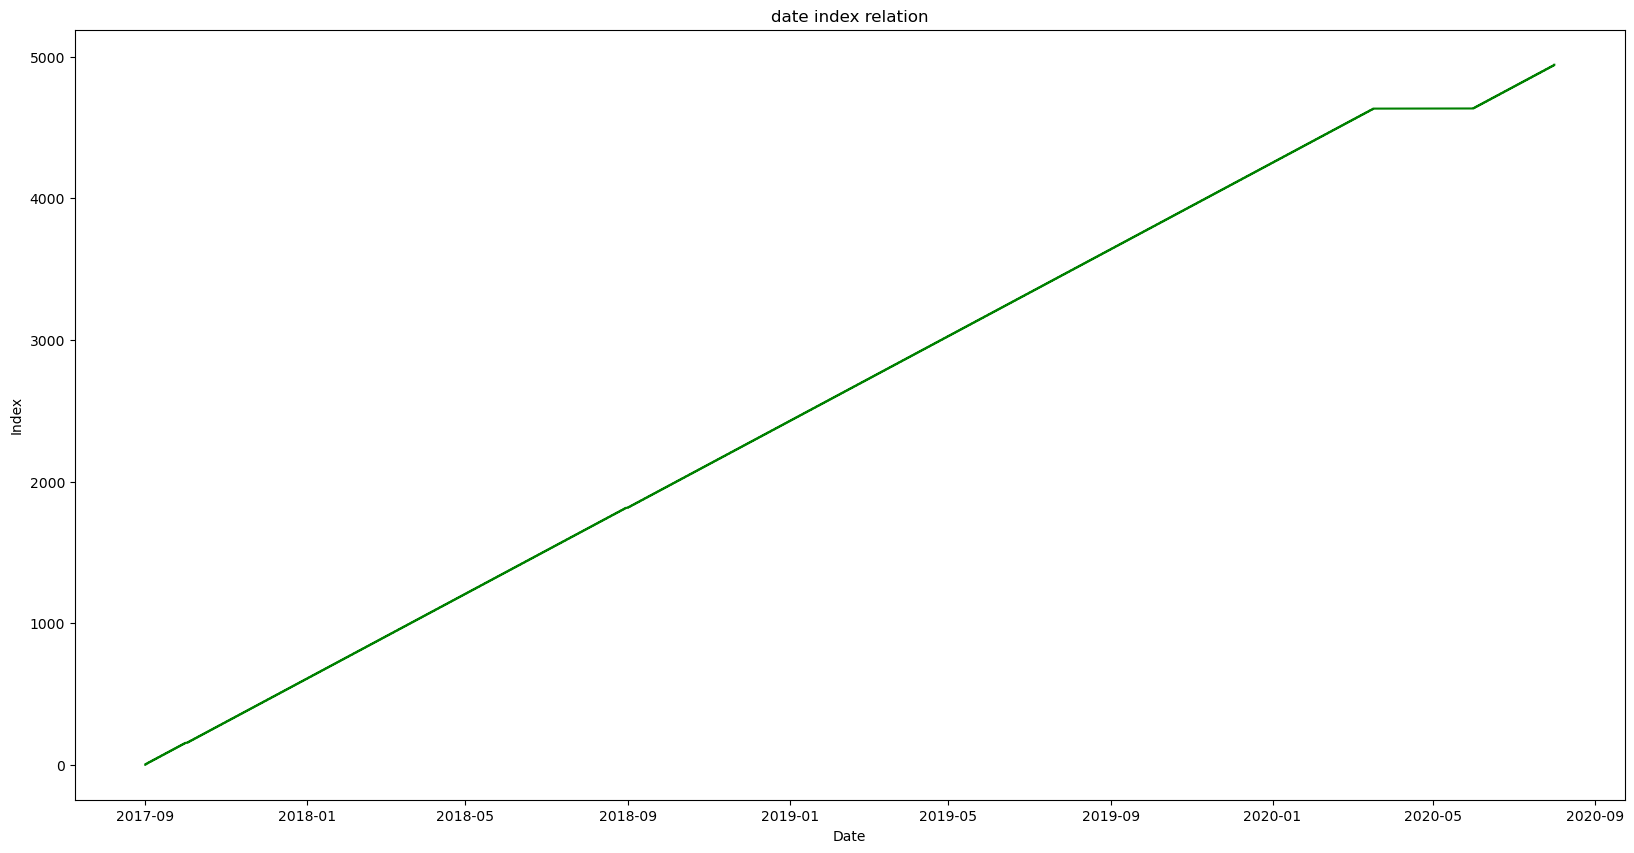

In [188]:
#plotting date against Index to find missing date
plt.figure(figsize=(20,10))
plt.plot(df['Date'], df.index,c='g')
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('date index relation')

There are some missing dates in the dataset in the year 2020.

In [189]:
#changing date column to index and finding all the missing dates
df=df.set_index('Date')
pd.date_range(df.index.min(), df.index.max(),).difference(df.index)

DatetimeIndex(['2017-10-02', '2018-08-31', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
     

These are the missing dates.

In [190]:
#creating a list of index
new_index=pd.date_range(df.index.min(), df.index.max(),).difference(df.index)

In [191]:
#creating a new dataframe containing missing dates as index 
df_new=pd.DataFrame(data=None,columns=df.columns,index=new_index)

In [192]:
#printing new dataframe
df_new

Region Thermal Generation Actual (in MU) Thermal Generation Estimated (in MU) Nuclear Generation Actual (in MU) Nuclear Generation Estimated (in MU) Hydro Generation Actual (in MU) Hydro Generation Estimated (in MU) Total Power Actual Generated (in MU) Total Power Estimated (in MU)
2017-10-02  NaN    NaN                               NaN                                  NaN                               NaN                                  NaN                             NaN                                NaN                                  NaN                         
2018-08-31  NaN    NaN                               NaN                                  NaN                               NaN                                  NaN                             NaN                                NaN                                  NaN                         
2020-03-18  NaN    NaN                               NaN                                  NaN                               NaN                                  NaN                             NaN                                NaN                                  NaN                         
2020-03-19  NaN    NaN                               NaN                                  NaN                               NaN                                  NaN                             NaN                                NaN                                  NaN                         
2020-03-20  NaN    NaN                               NaN                                  NaN                               NaN                                  NaN                             NaN                                NaN                                  NaN                         
2020-03-21  NaN    NaN                               NaN                                  NaN                               NaN                                  NaN                             NaN                                NaN                                  NaN                         
2020-03-22  NaN    NaN                               NaN                                  NaN                               NaN                                  NaN                             NaN                                NaN                                  NaN                         
2020-03-23  NaN    NaN                               NaN                                  NaN                               NaN                                  NaN                             NaN                                NaN                                  NaN                         
2020-03-24  NaN    NaN                               NaN                                  NaN                               NaN                                  NaN                             NaN                                NaN                                  NaN                         
2020-03-25  NaN    NaN                               NaN                                  NaN                               NaN                                  NaN                             NaN                                NaN                                  NaN                         
2020-03-26  NaN    NaN                               NaN                                  NaN                               NaN                                  NaN                             NaN                                NaN                                  NaN                         
2020-03-27  NaN    NaN                               NaN                                  NaN                               NaN                                  NaN                             NaN                                NaN                                  NaN                         
2020-03-28  NaN    NaN                               NaN                                  NaN                               NaN                                  NaN                         

In [193]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2017-10-02 to 2020-05-31
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Region                                0 non-null      object
 1   Thermal Generation Actual (in MU)     0 non-null      object
 2   Thermal Generation Estimated (in MU)  0 non-null      object
 3   Nuclear Generation Actual (in MU)     0 non-null      object
 4   Nuclear Generation Estimated (in MU)  0 non-null      object
 5   Hydro Generation Actual (in MU)       0 non-null      object
 6   Hydro Generation Estimated (in MU)    0 non-null      object
 7   Total Power Actual Generated (in MU)  0 non-null      object
 8   Total Power Estimated (in MU)         0 non-null      object
dtypes: object(9)
memory usage: 6.0+ KB


In [194]:
#creating for loop to merge new dataframe with regionwise dataframes 
for i in [df_eastern,df_western,df_northern,df_southern,df_northeastern]:
    i=pd.concat([i,df_new],axis=0)
    i=i.sort_values(by=['Date'],ascending=True)

In [195]:
#creating for loop for interpolating power generation values
for i in [df_eastern,df_western,df_northern,df_southern,df_northeastern]:
    i['Region'].fillna(i['Region'].mode(),inplace=True)
    for column in i[['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)','Thermal Generation Estimated (in MU)','Nuclear Generation Estimated (in MU)','Hydro Generation Estimated (in MU)','Total Power Actual Generated (in MU)','Total Power Estimated (in MU)']]:
        i[column].interpolate(method='linear',limit_direction='forward')

In [196]:
#concatinating region wise dataset
df_region=pd.concat([df_northern,df_western,df_southern,df_eastern,df_northeastern],axis=0)

Text(0.5, 1.0, 'date index relation')

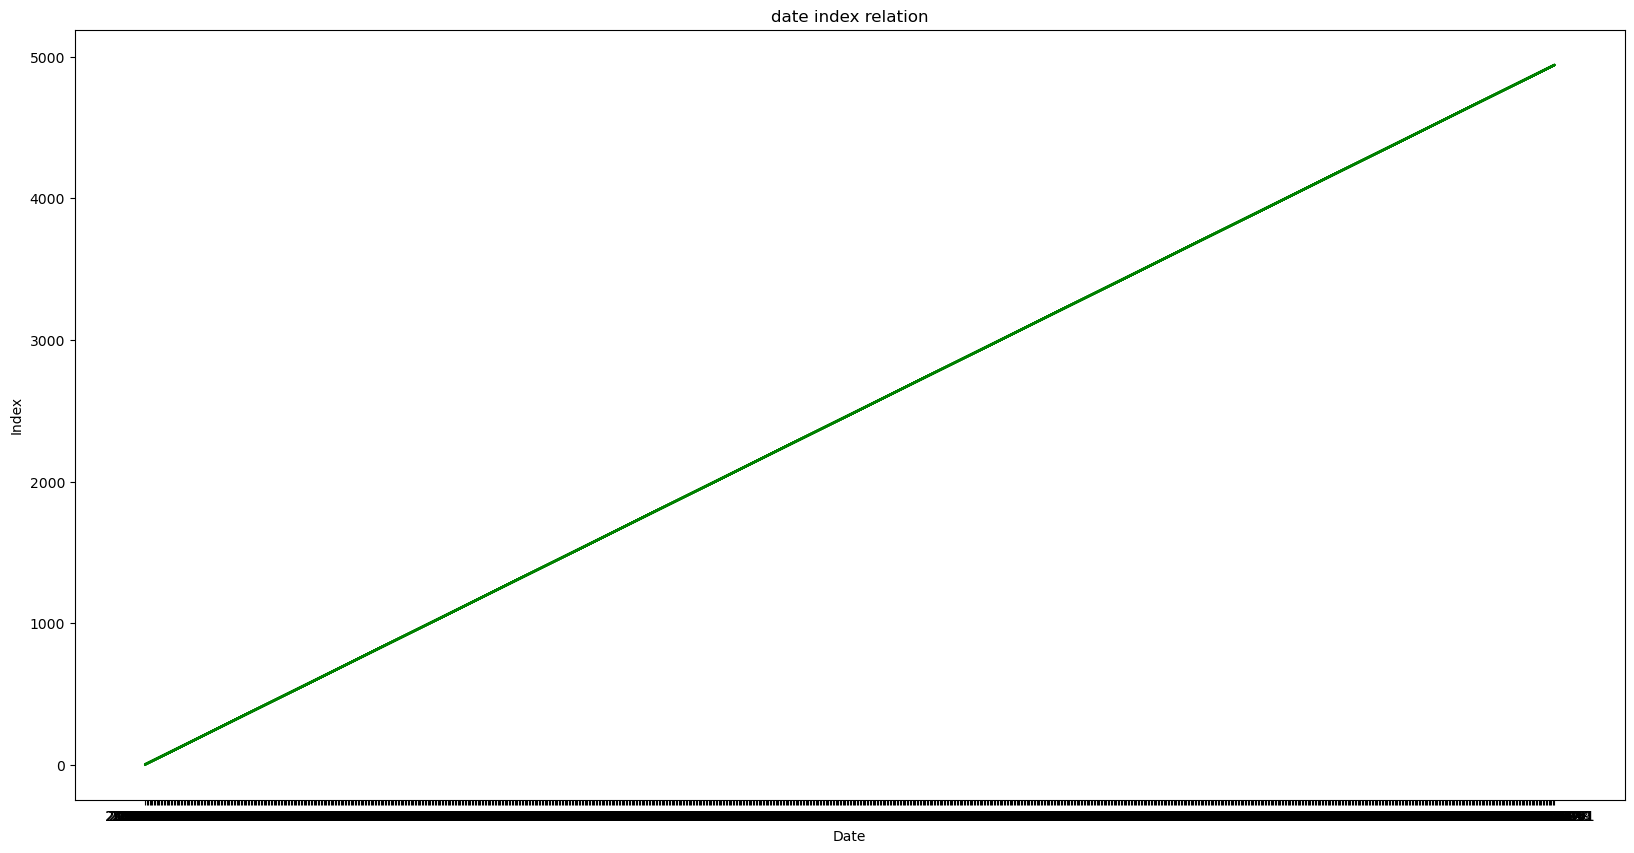

In [197]:
#Again plotting date against Index to find missing date
plt.figure(figsize=(20,10))
plt.plot(df_region['Date'], df_region.index,c='g')
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('date index relation')

#### Plotting Actual Generation Vs Date(Region Wise)

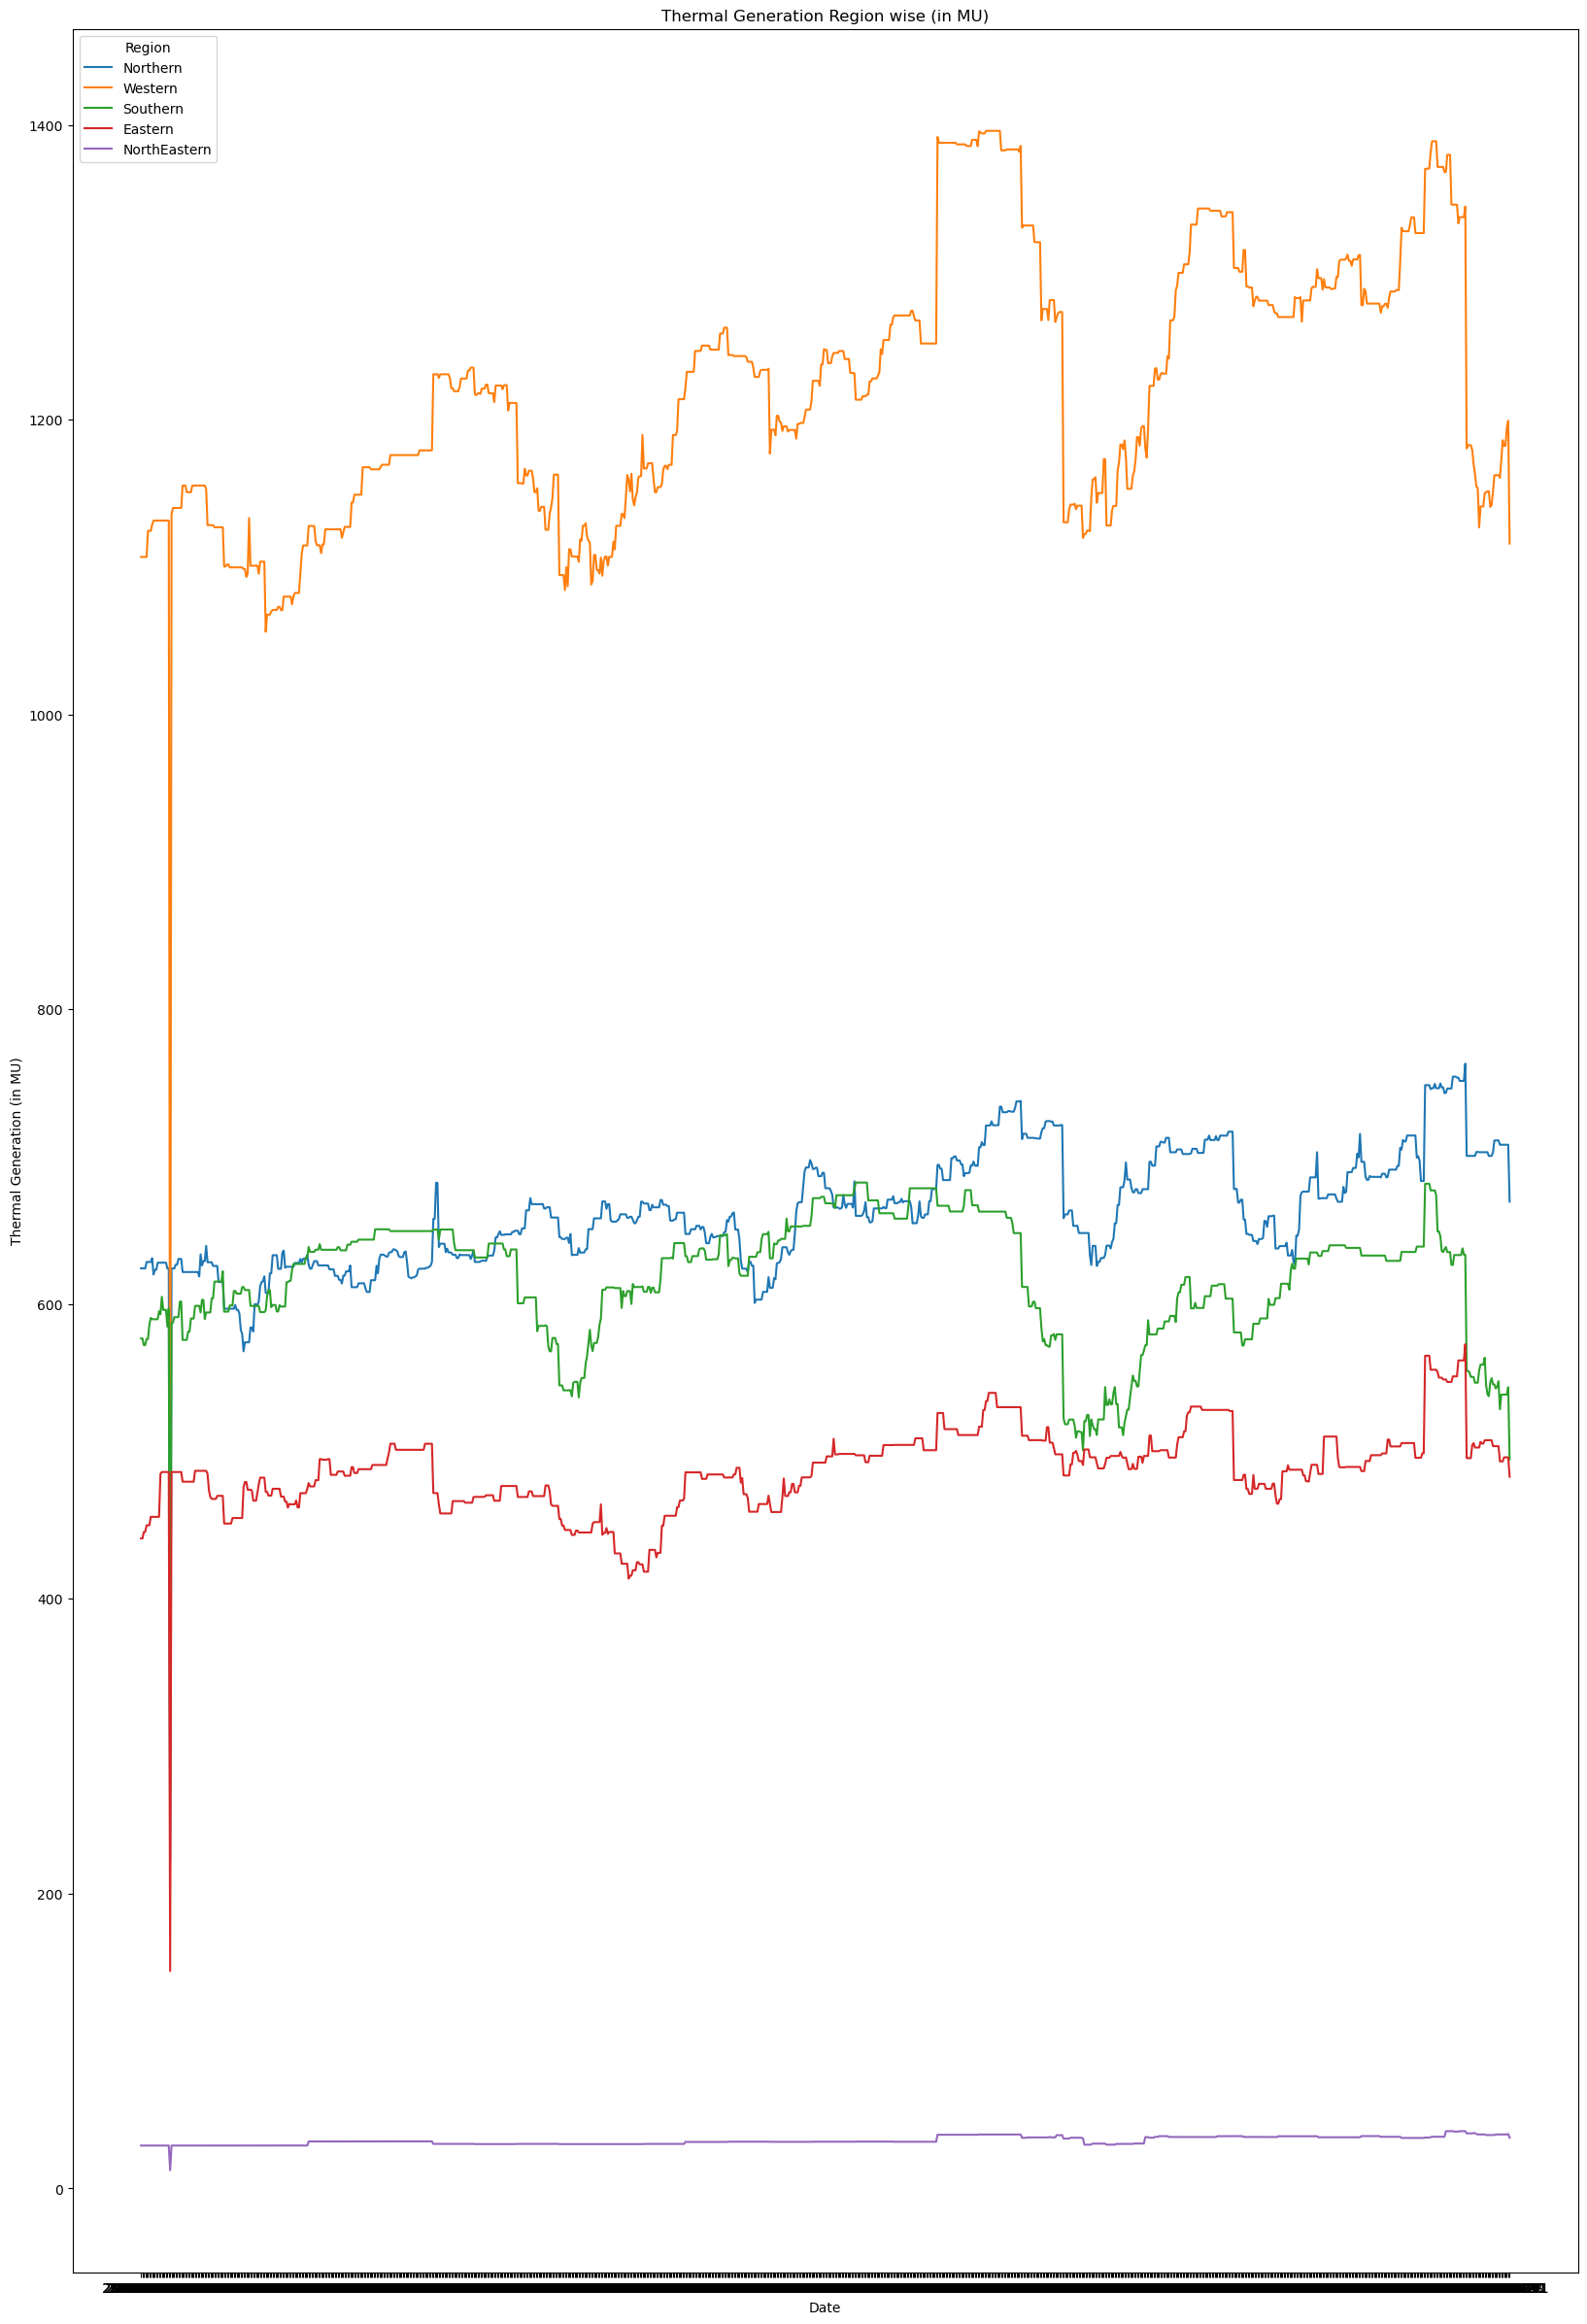

In [198]:
##plotting Thermal Power (Actual and Estimated) with date
plt.figure(figsize=(20,30))
sns.lineplot(data=df_region,x='Date',y='Thermal Generation Actual (in MU)',ci=False,hue='Region')
plt.ylabel('Thermal Generation (in MU)')
plt.title("Thermal Generation Region wise (in MU)")
plt.show();

It is clearly visible that thermal power consumption in western region is higher among all other regions.  
In Northern and Southern Regions the thermal power consumptions are almost same .  
North Eastern has the lowest thermal power consumption.  
In all the regions the estimated thermal power generation is lower than the actual power generated.The reason is might be as per to the requirement of the region.

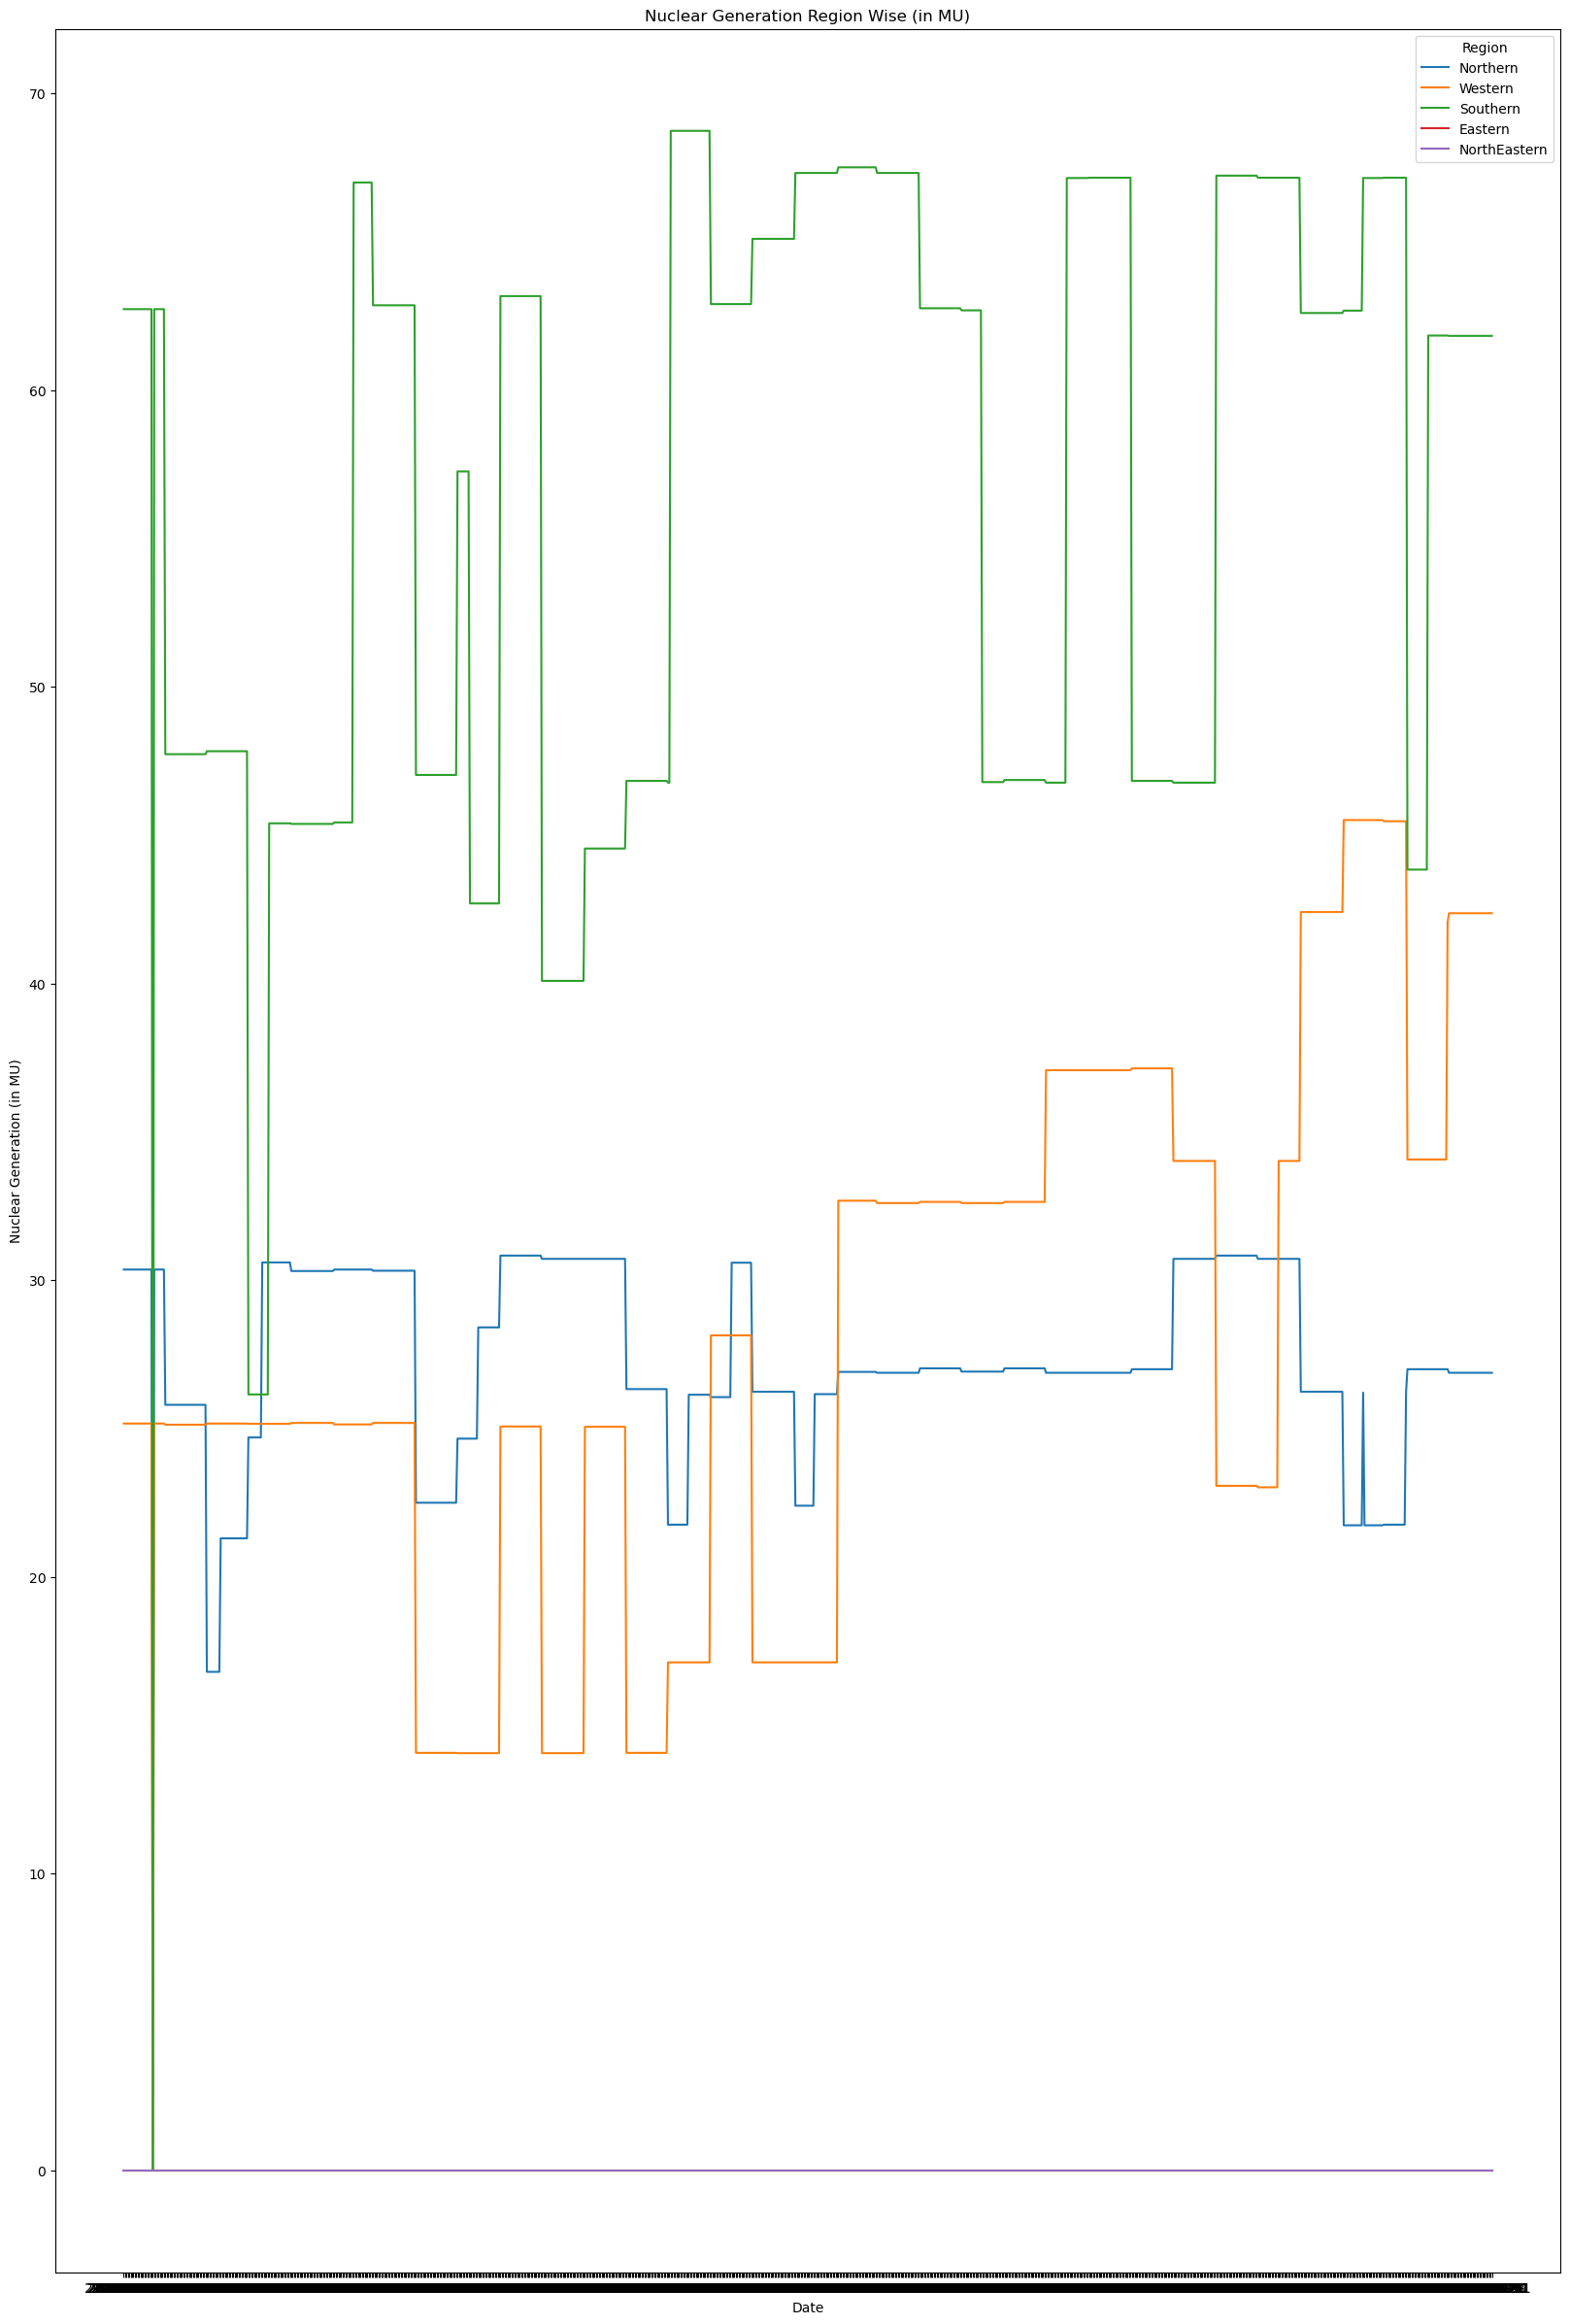

In [199]:
#plotting Nuclear Power (Actual and Estimated) with date
plt.figure(figsize=(20,30))
sns.lineplot(data=df_region,x='Date',y='Nuclear Generation Actual (in MU)',hue='Region',ci=False)
plt.title("Nuclear Generation Region Wise (in MU)")
plt.ylabel("Nuclear Generation (in MU)")
plt.show();

There are trends in the Plot.  
The nuclear power generated are same for some days.They are square.  
No nuclear power is used in North Eastern and Eastern Region.  
Southern Region has the highest consumption of Nuclear Power .

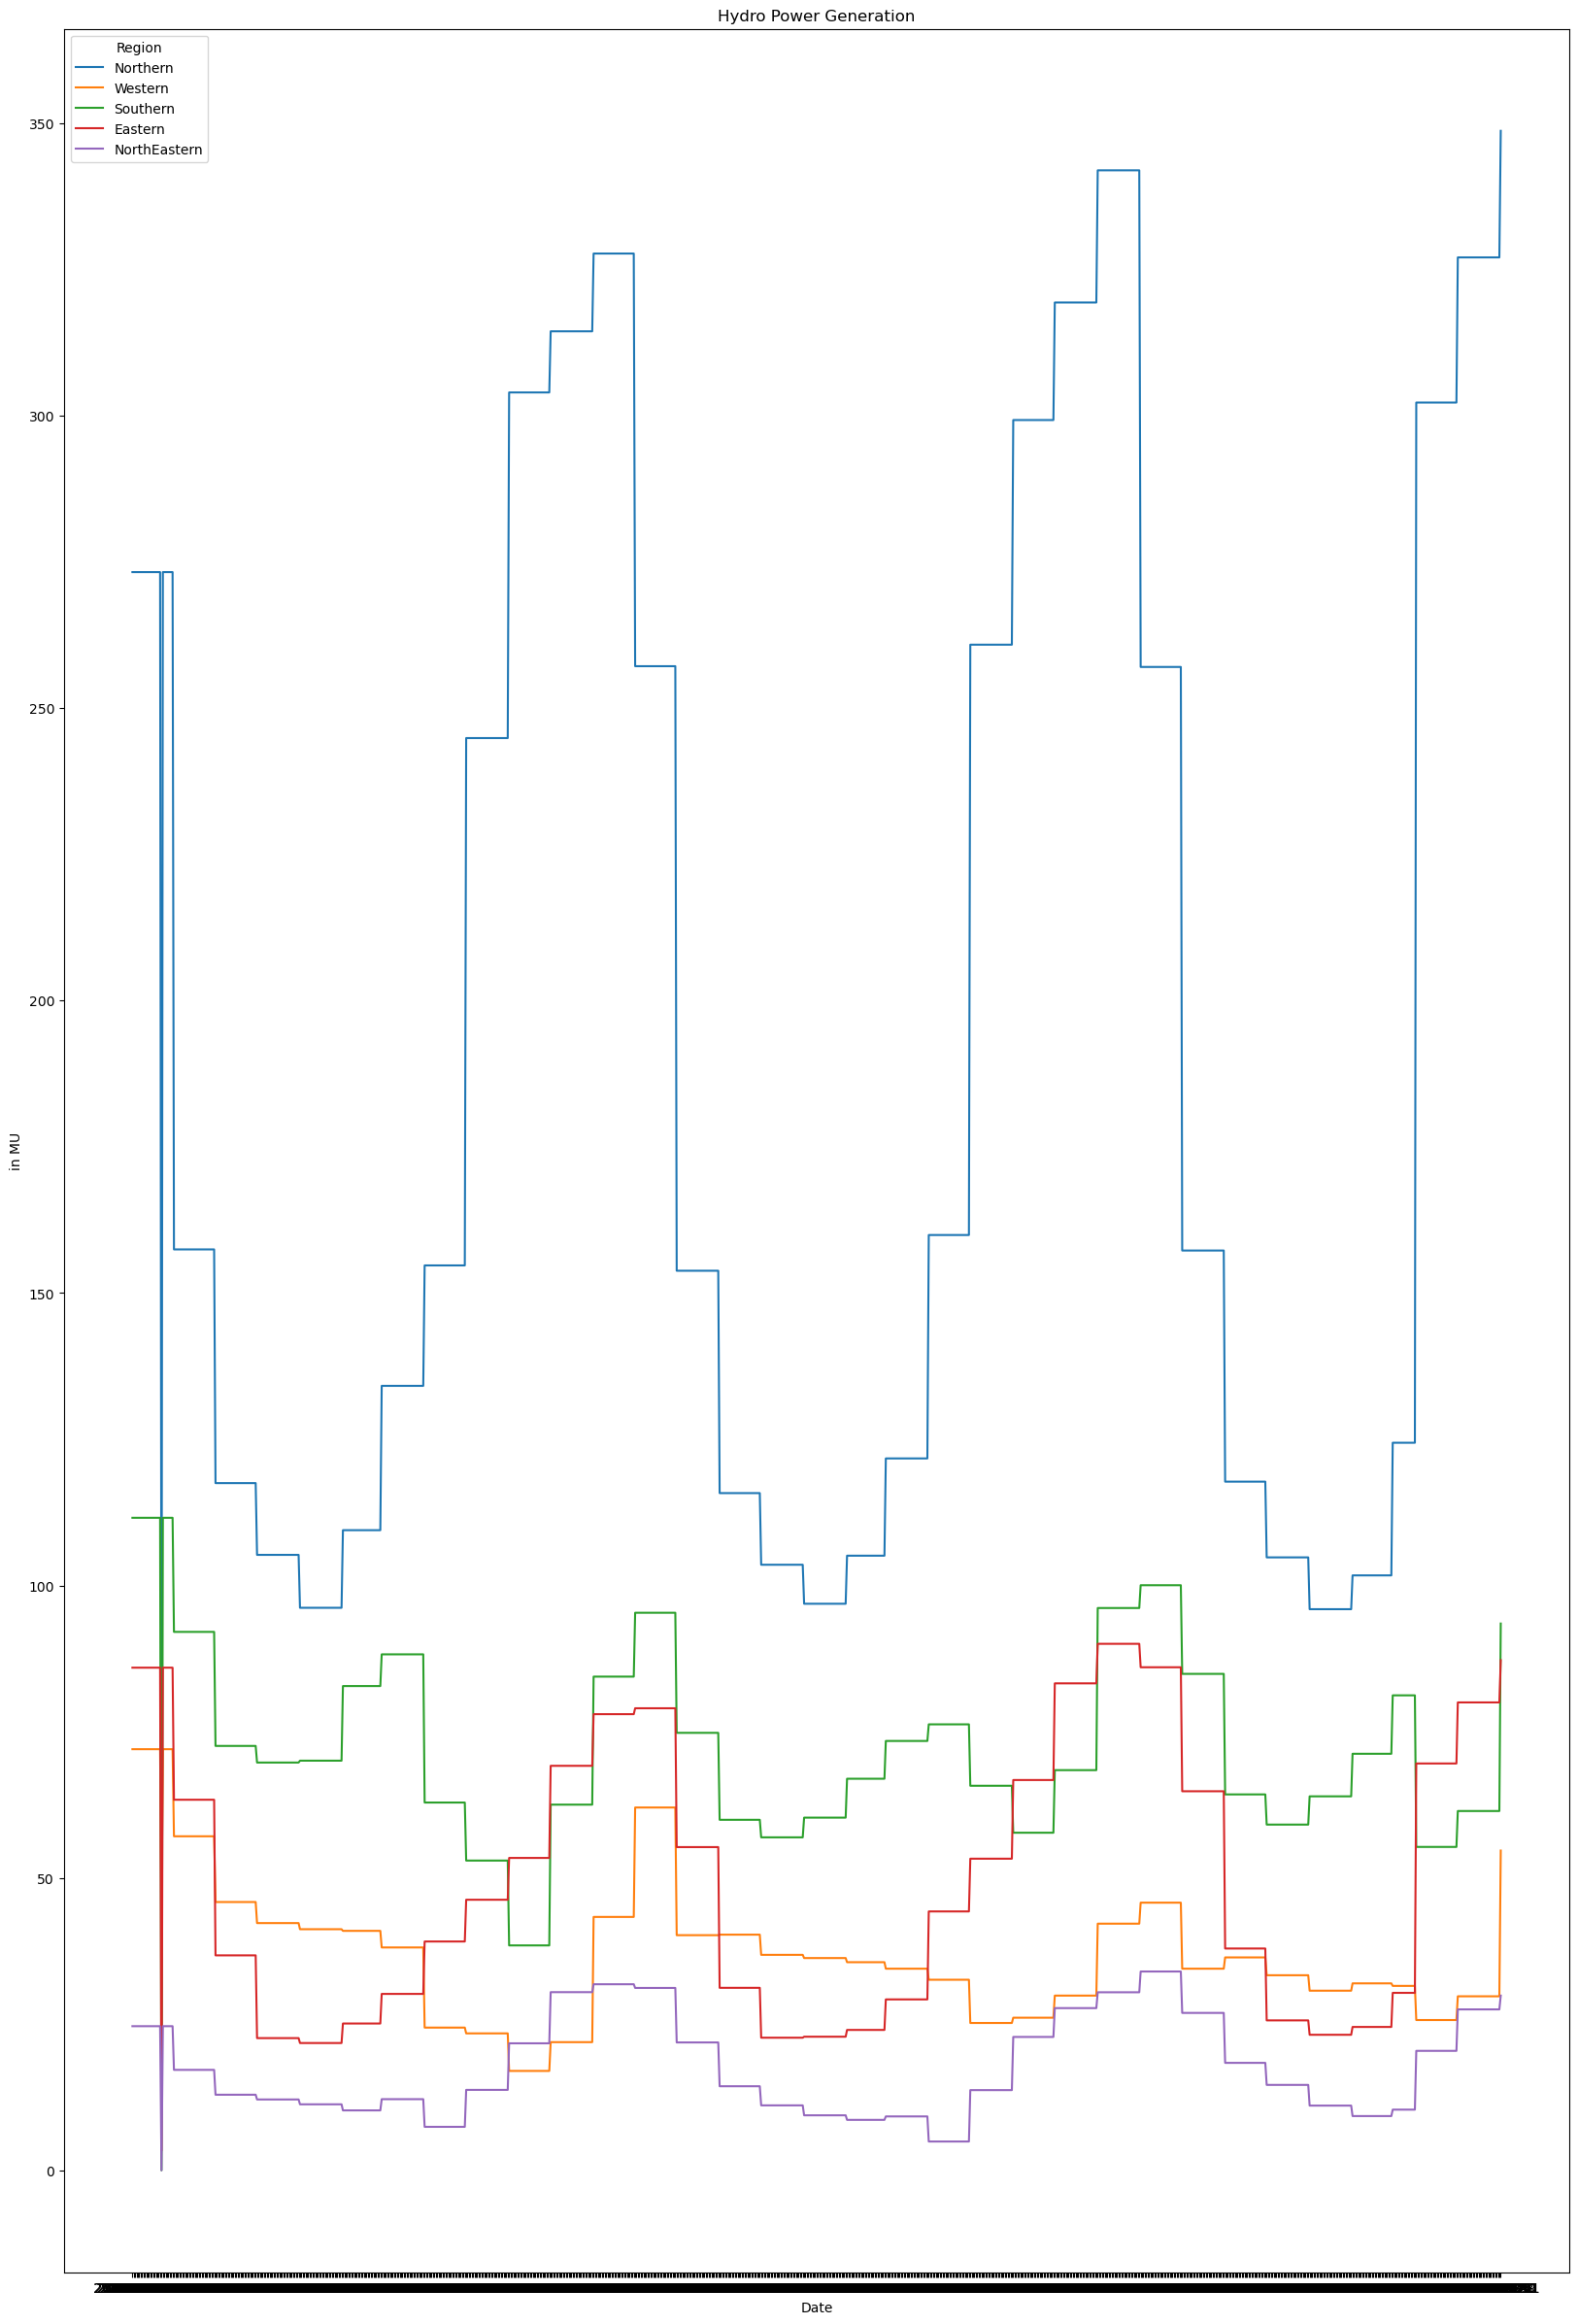

In [200]:
#plotting Hydro Power (Actual and Estimated) with date
plt.figure(figsize=(20,30))
sns.lineplot(data=df_region,x='Date',y='Hydro Generation Actual (in MU)',ci=False,hue='Region')
plt.ylabel("in MU")
plt.title("Hydro Power Generation")
plt.show();

Northern Region has the highest consumption of Hydro power.  
Hydro Power is generated same for some months as there are straight line in the graph .  
North Eastern Region has the lowest consumption of Hydro Power.  

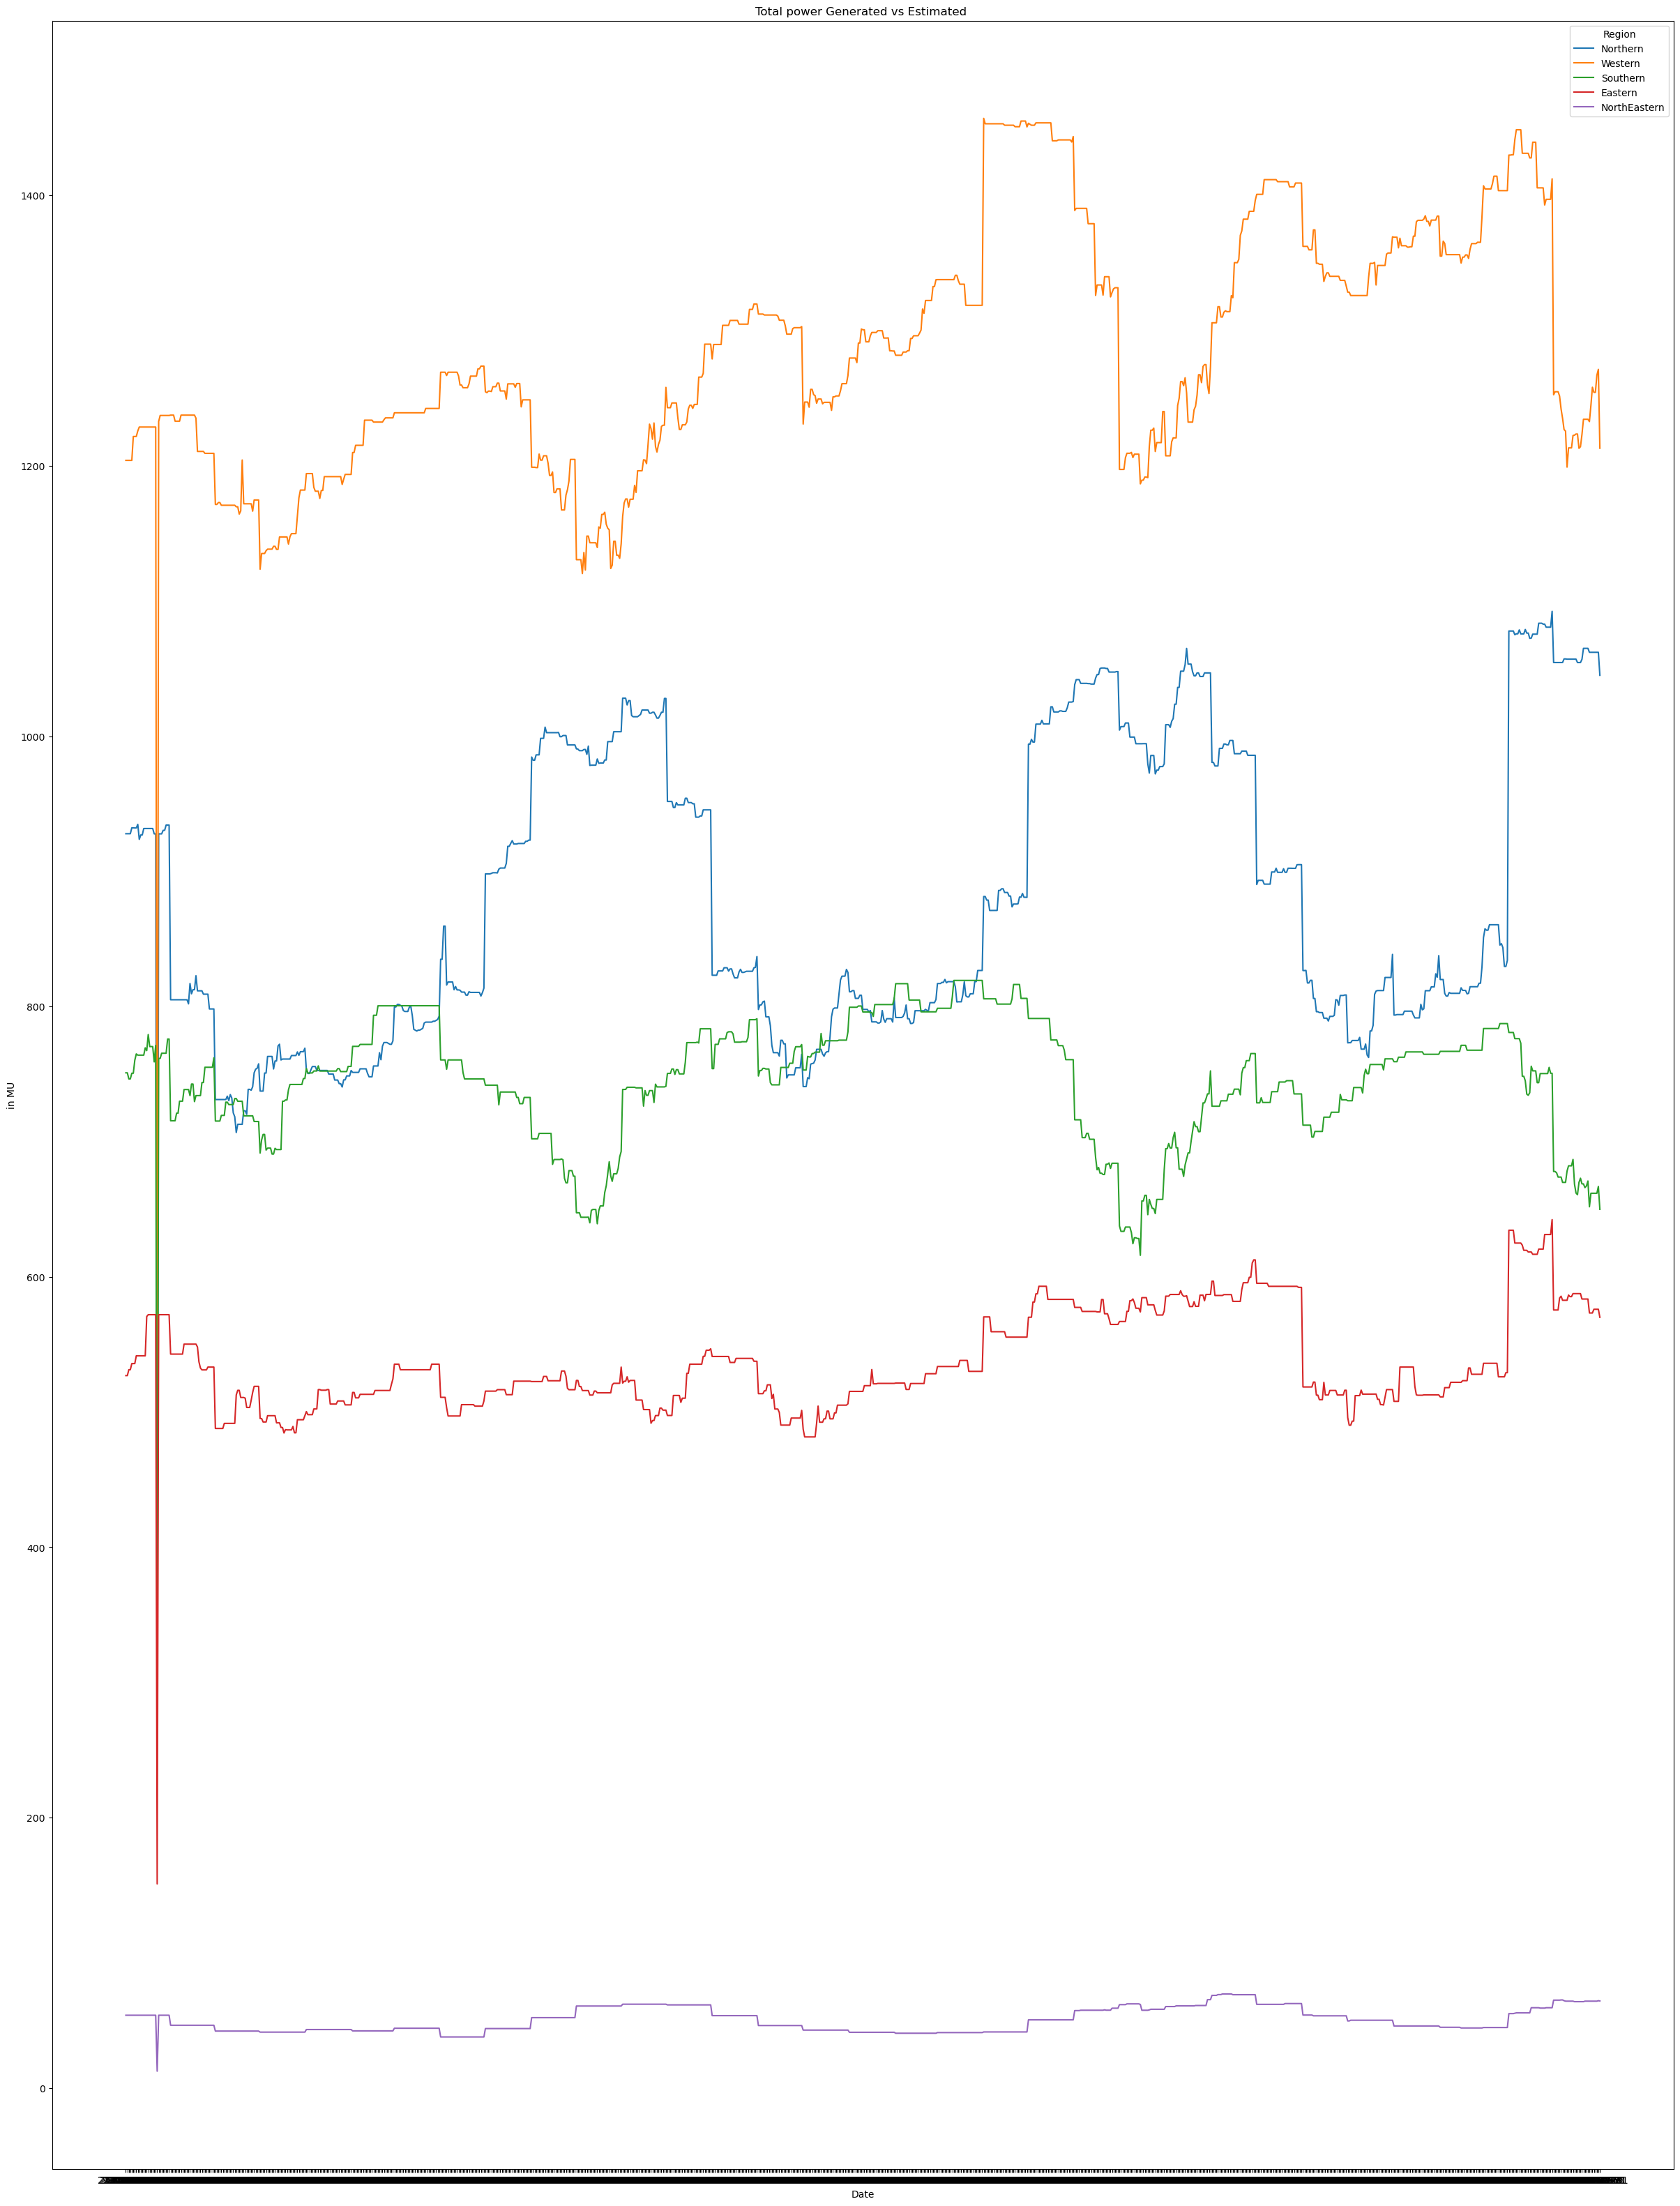

In [201]:
#plotting total power consumption
plt.figure(figsize=(30,40))
sns.lineplot(data=df_region,x='Date',y='Total Power Actual Generated (in MU)',ci=False,hue='Region')
plt.ylabel("in MU")
plt.title("Total power Generated vs Estimated ")
plt.show();

Western Region has the highest comsumption of electricity .  
North Eastern has the lowest consumption of electricity.

There must be an outlier because of which it is showing a dip in one particular date.

### Plotting Boxplot to detect Outliers

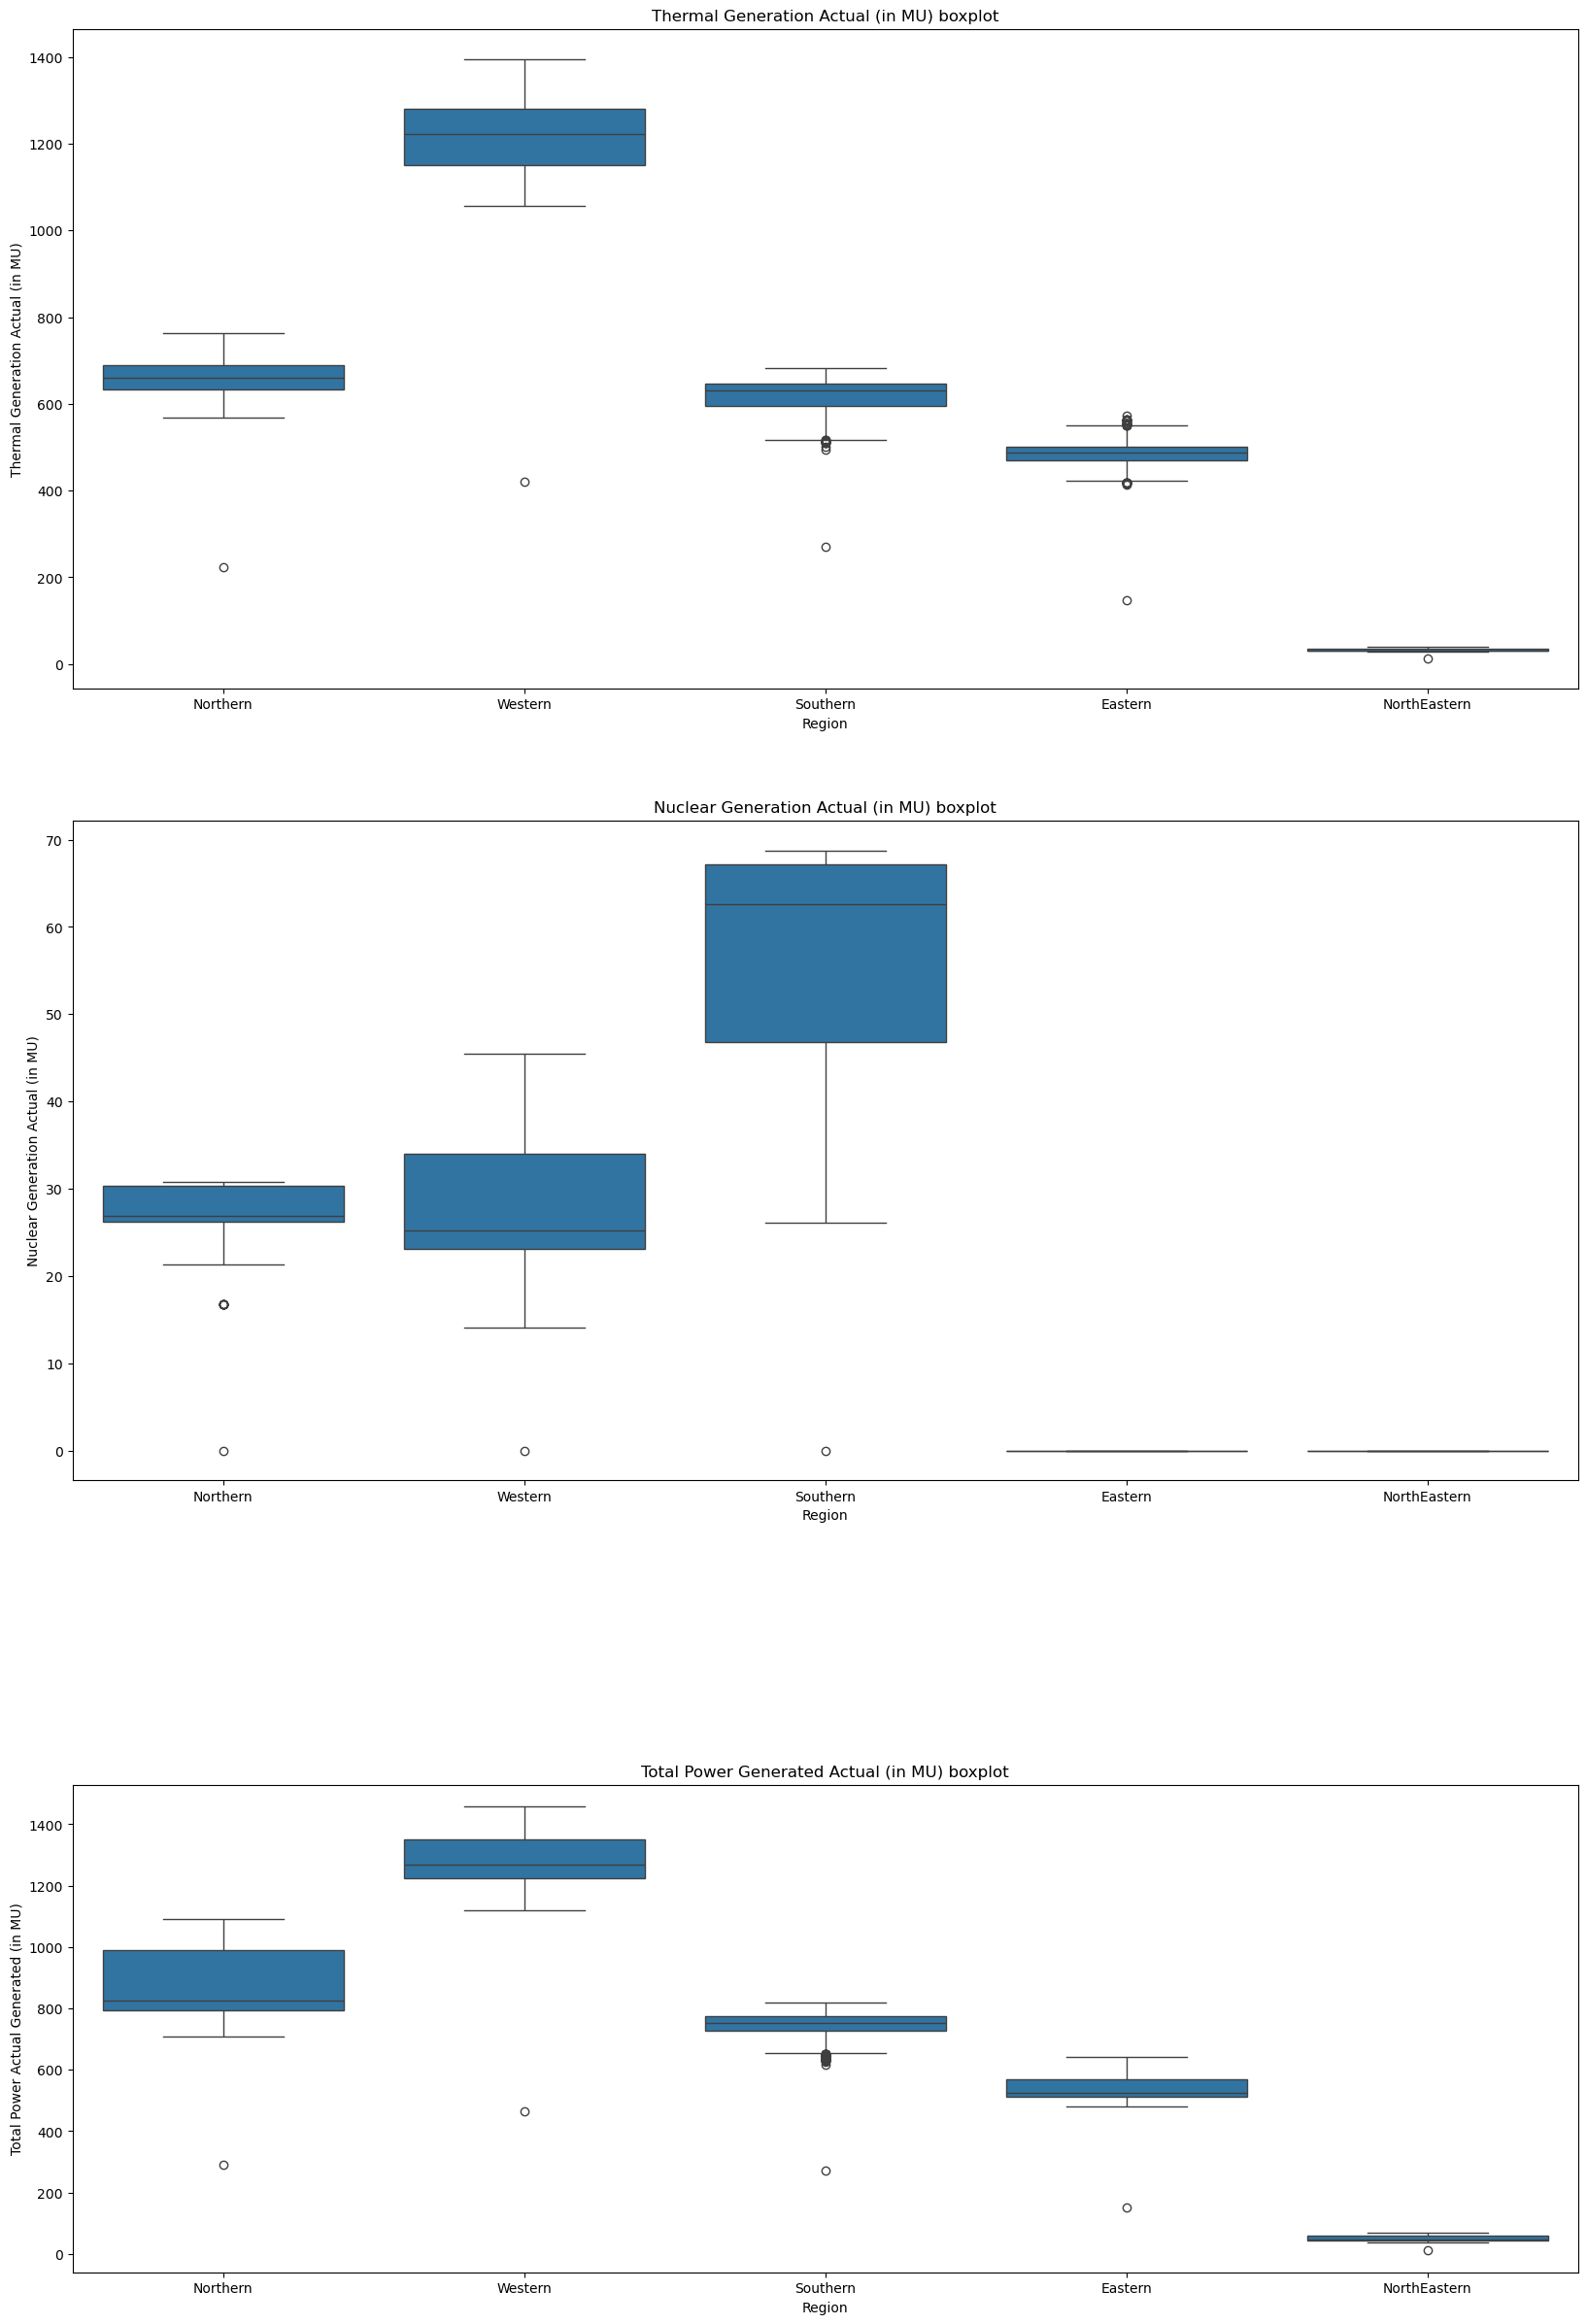

In [203]:
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
sns.boxplot(data=df_region,x='Region',y='Thermal Generation Actual (in MU)')
plt.title("Thermal Generation Actual (in MU) boxplot")
plt.subplot(3,1,2)
sns.boxplot(data=df_region,x='Region',y='Nuclear Generation Actual (in MU)')
plt.title("Nuclear Generation Actual (in MU) boxplot")
plt.subplot(3,1,3)
sns.boxplot(data=df_region,x='Region',y='Hydro Generation Actual (in MU)')
plt.title("Hydro Generation Actual (in MU) boxplot")
plt.subplot(4,1,4)
sns.boxplot(data=df_region,x='Region',y='Total Power Actual Generated (in MU)')
plt.title("Total Power Generated Actual (in MU) boxplot")
plt.show();

There are outliers in each and every boxplot.

In [204]:
#defining a function to calcuate lower range and upper range
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [205]:
for i in [df_eastern,df_western,df_northern,df_southern,df_northeastern]:
    for column in i[['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)','Total Power Actual Generated (in MU)']]:
        lr,ur=remove_outlier (i[column])
        i[column]=np.where(i[column]>ur,ur,i[column])
        i[column]=np.where(i[column]<lr,lr,i[column])

In [206]:
#again concatinating region wise dataset
df_region=pd.concat([df_northern,df_western,df_southern,df_eastern,df_northeastern],axis=0)

In [207]:
df_region

Date        Region  Thermal Generation Actual (in MU)  Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  Hydro Generation Estimated (in MU)  Total Power Actual Generated (in MU)  Total Power Estimated (in MU)
0     2017-09-01  Northern      624.23                             484.21                                30.36                              35.57                                 273.27                           320.81                              927.86                                840.59                       
5     2017-09-02  Northern      624.23                             507.42                                30.36                              35.69                                 273.27                           317.19                              927.86                                860.30                       
10    2017-09-03  Northern      624.23                             492.69                                30.36                              35.65                                 273.27                           316.69                              927.86                                845.03                       
15    2017-09-04  Northern      624.23                             568.34                                30.36                              35.62                                 273.27                           297.47                              927.86                                901.43                       
20    2017-09-05  Northern      628.58                             597.08                                30.36                              35.72                                 273.27                           290.23                              932.21                                923.03                       
...          ...       ...         ...                                ...                                  ...                                ...                                    ...                              ...                                 ...                                   ...                       
4924  2020-07-28  NorthEastern  36.65                              33.55                                 0.00                               0.00                                  27.51                            30.08                               64.16                                 63.63                        
4929  2020-07-29  NorthEastern  36.65                              30.63                                 0.00                               0.00                                  27.51                            30.19                               64.16                                 60.82                        
4934  2020-07-30  NorthEastern  36.65                              30.86                                 0.00                               0.00                                  27.51                            30.20                               64.16                                 61.06                        
4939  2020-07-31  NorthEastern  36.98                              30.94                                 0.00                               0.00                                  27.51                            29.76                               64.49                                 60.70                        
4944  2020-08-01  NorthEastern  34.42                              32.81                                 0.00                               0.00                                  29.87                            29.96                               64.29                                 62.77                        

[4945 rows x 10 columns]

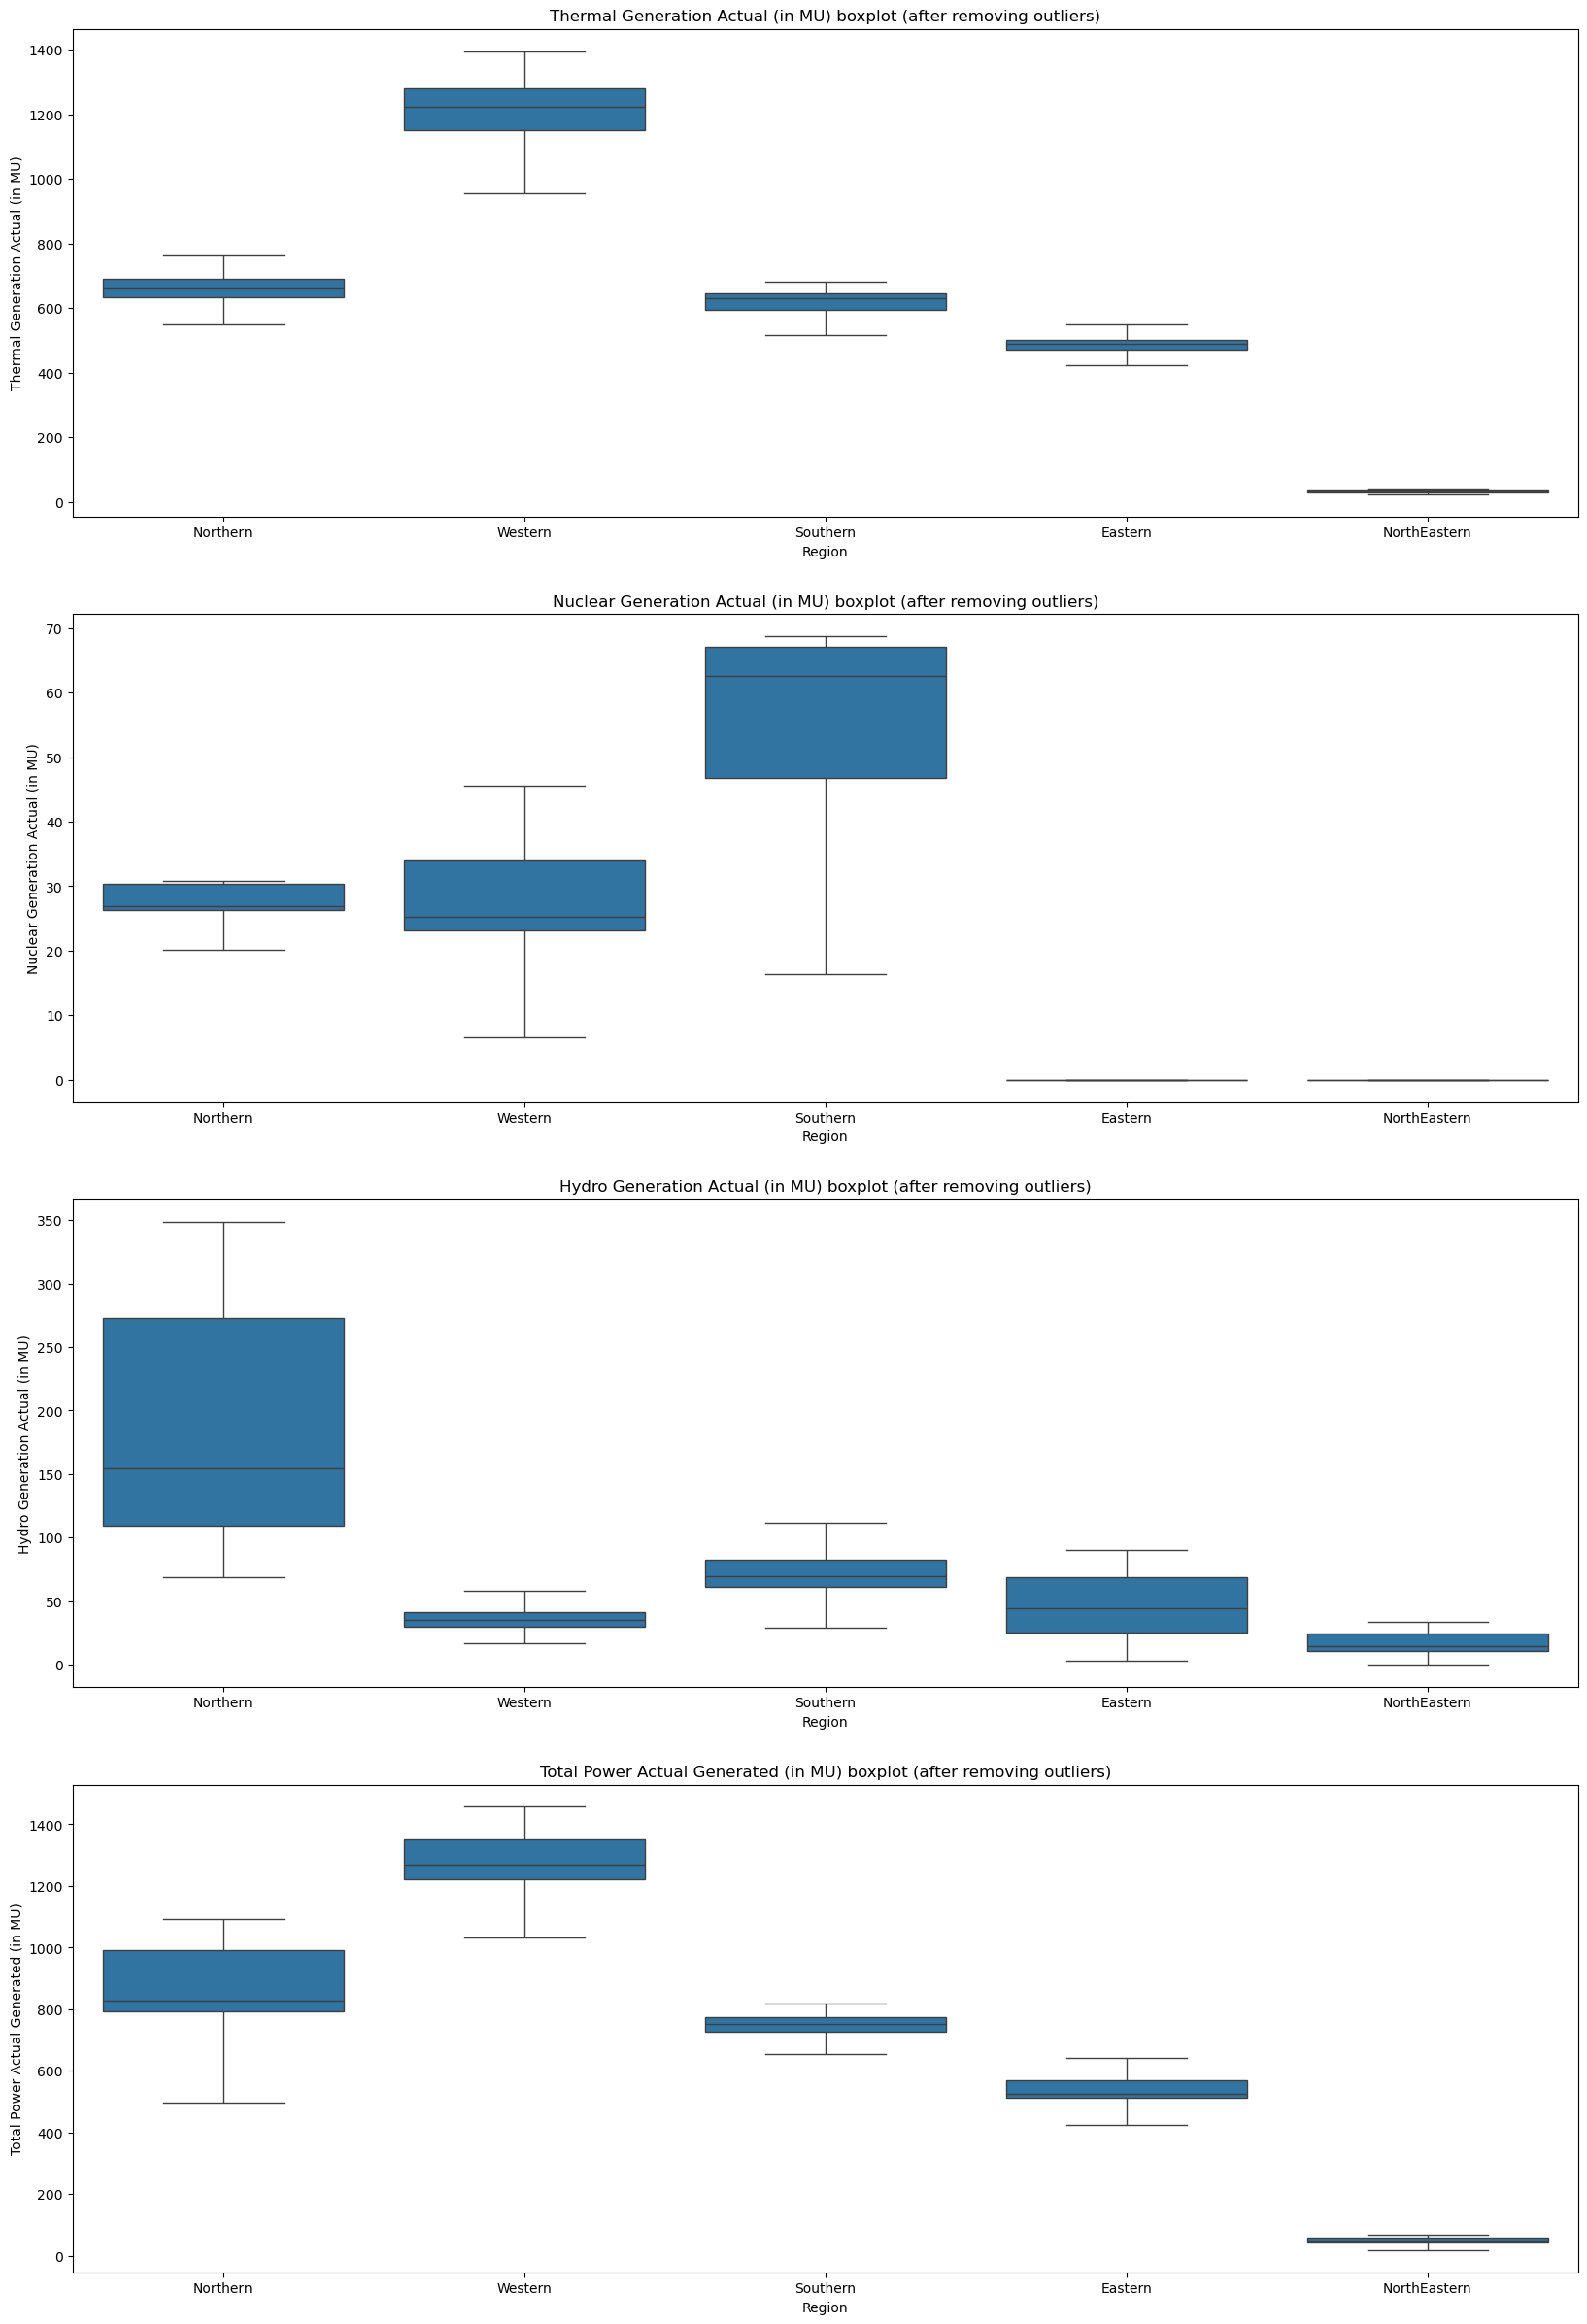

In [208]:
#plotting a graph without outliers
plt.figure(figsize=(20,30))
plt.subplot(4,1,1)
sns.boxplot(data=df_region,x='Region',y='Thermal Generation Actual (in MU)')
plt.title("Thermal Generation Actual (in MU) boxplot (after removing outliers)")
plt.subplot(4,1,2)
sns.boxplot(data=df_region,x='Region',y='Nuclear Generation Actual (in MU)')
plt.title("Nuclear Generation Actual (in MU) boxplot (after removing outliers)")
plt.subplot(4,1,3)
sns.boxplot(data=df_region,x='Region',y='Hydro Generation Actual (in MU)')
plt.title("Hydro Generation Actual (in MU) boxplot (after removing outliers)")
plt.subplot(4,1,4)
sns.boxplot(data=df_region,x='Region',y='Total Power Actual Generated (in MU)')
plt.title("Total Power Actual Generated (in MU) boxplot (after removing outliers)")
plt.show();

#### Plotting Actual Generation Vs Date(Region Wise)-After Outlier Treatment

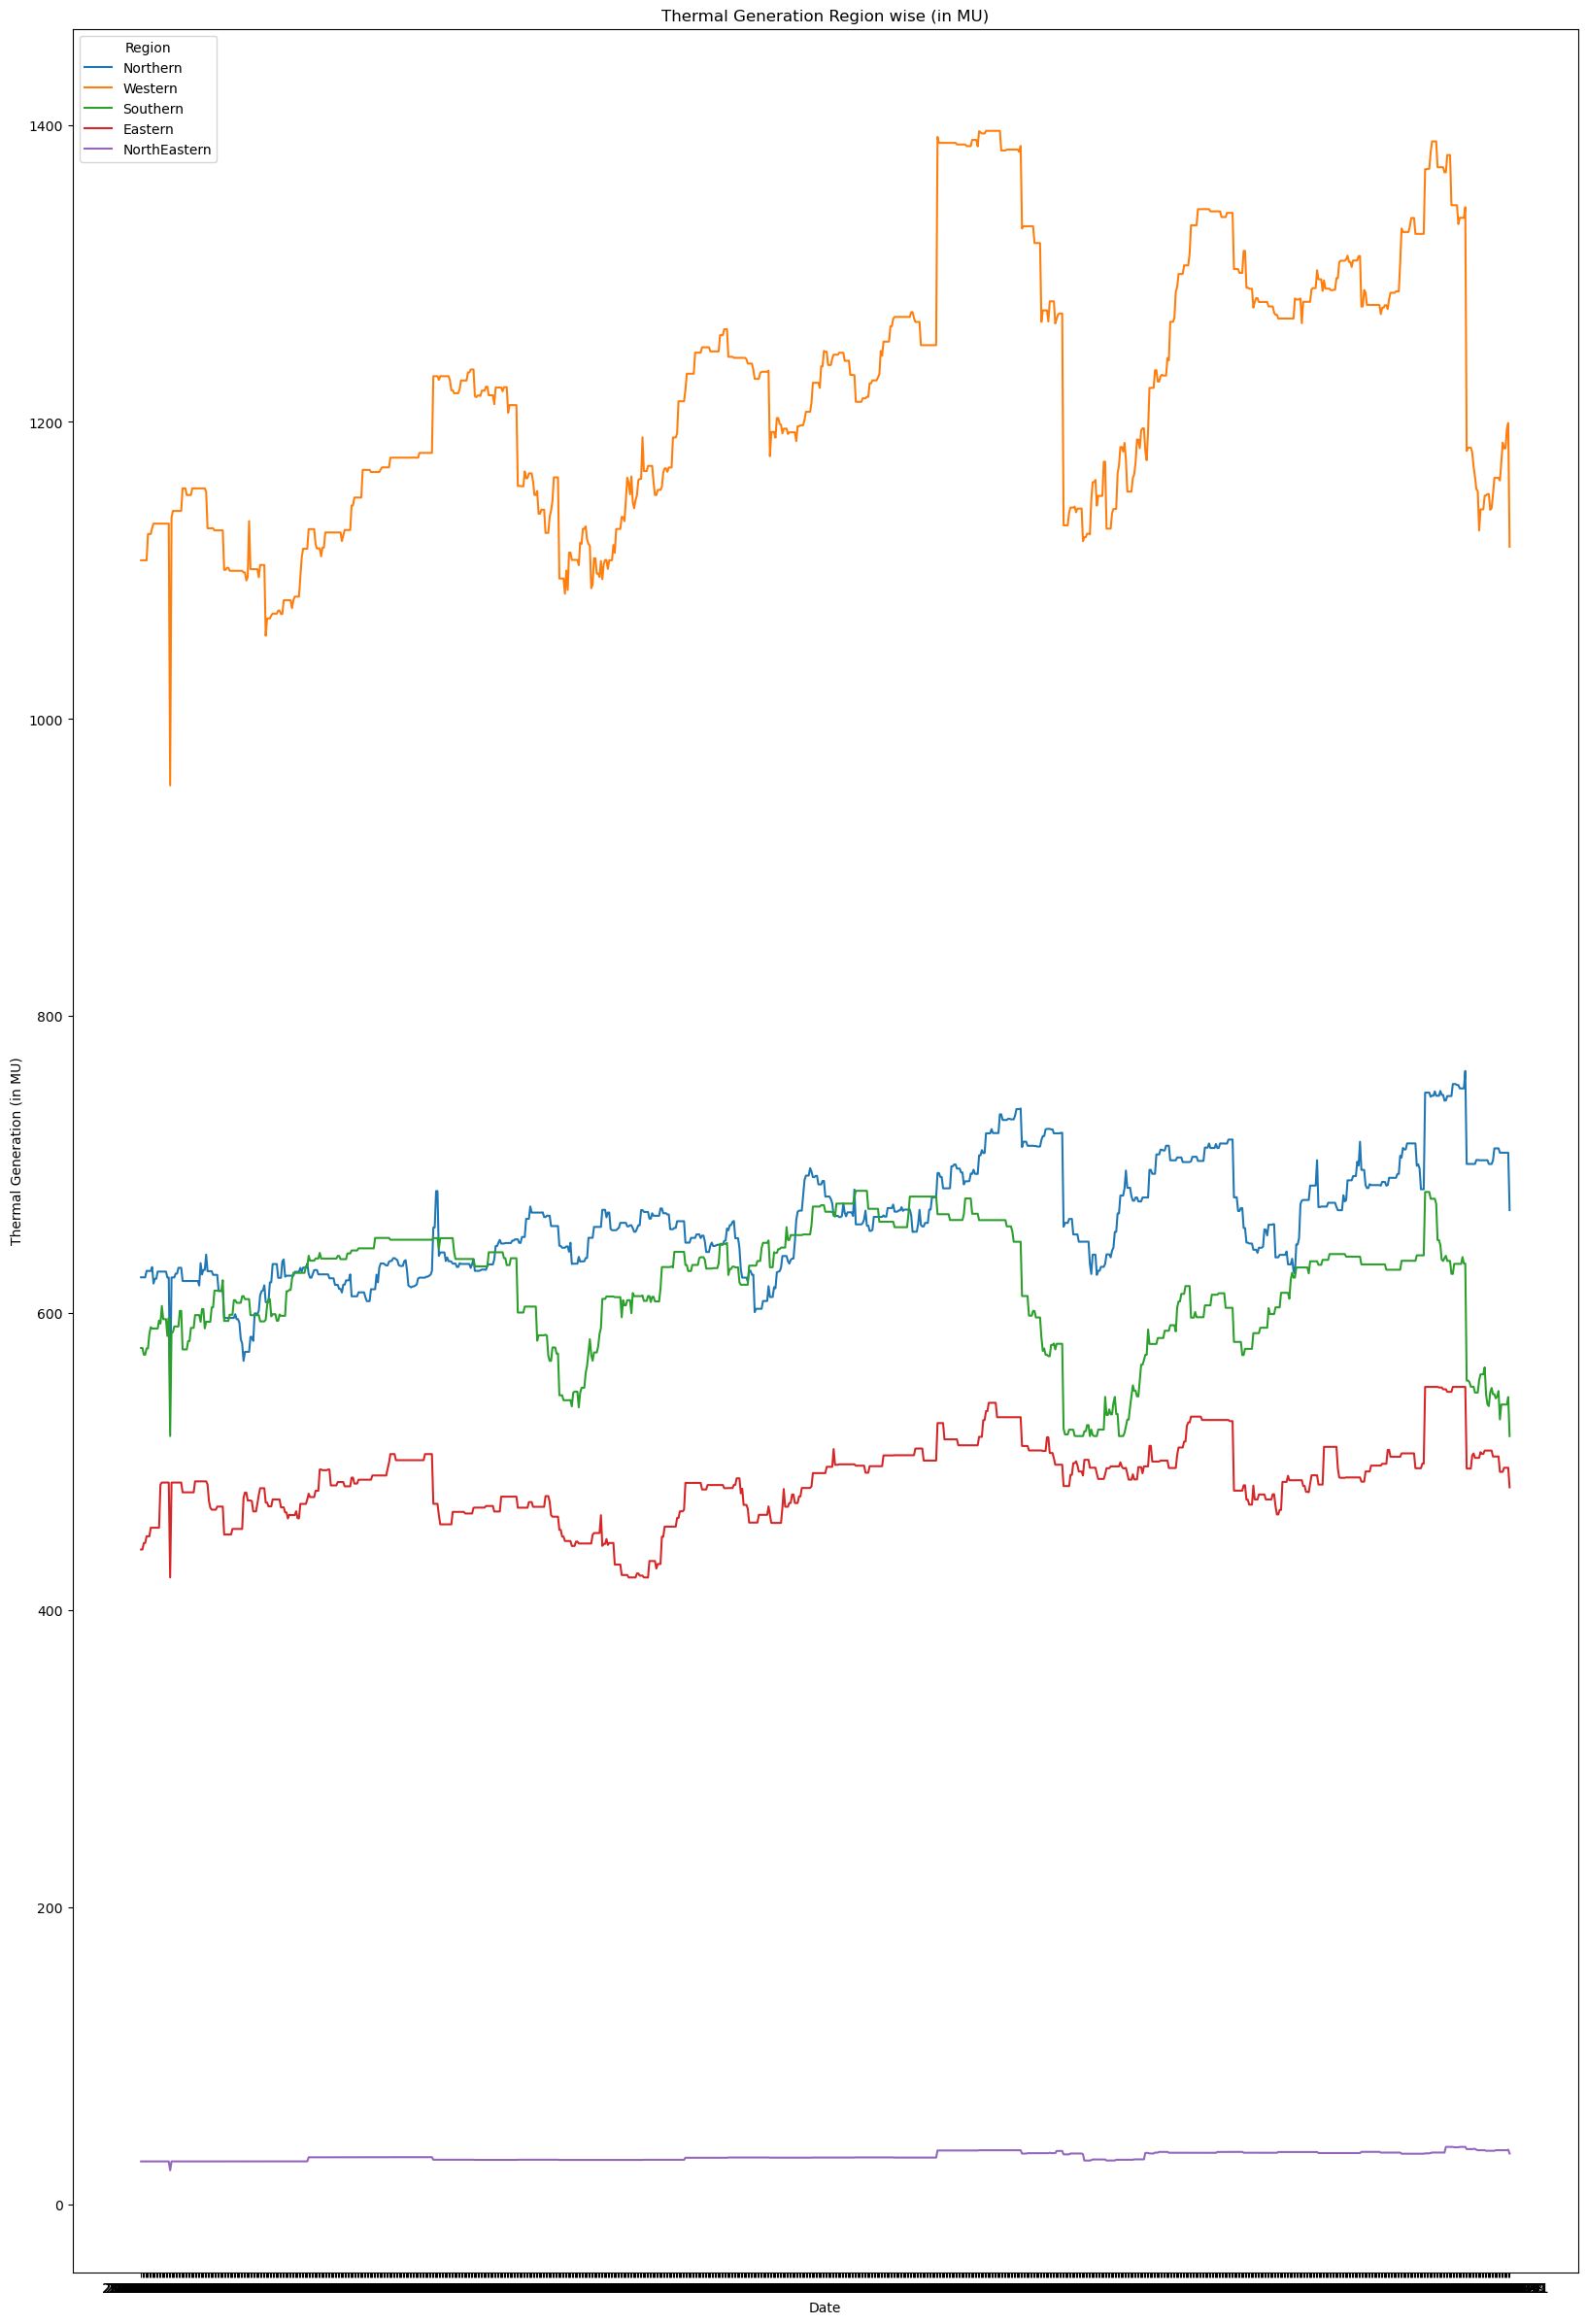

In [209]:
##plotting Thermal Power (Actual and Estimated) with date
plt.figure(figsize=(20,30))
sns.lineplot(data=df_region,x='Date',y='Thermal Generation Actual (in MU)',ci=False,hue='Region')
plt.ylabel('Thermal Generation (in MU)')
plt.title("Thermal Generation Region wise (in MU)")
plt.show();

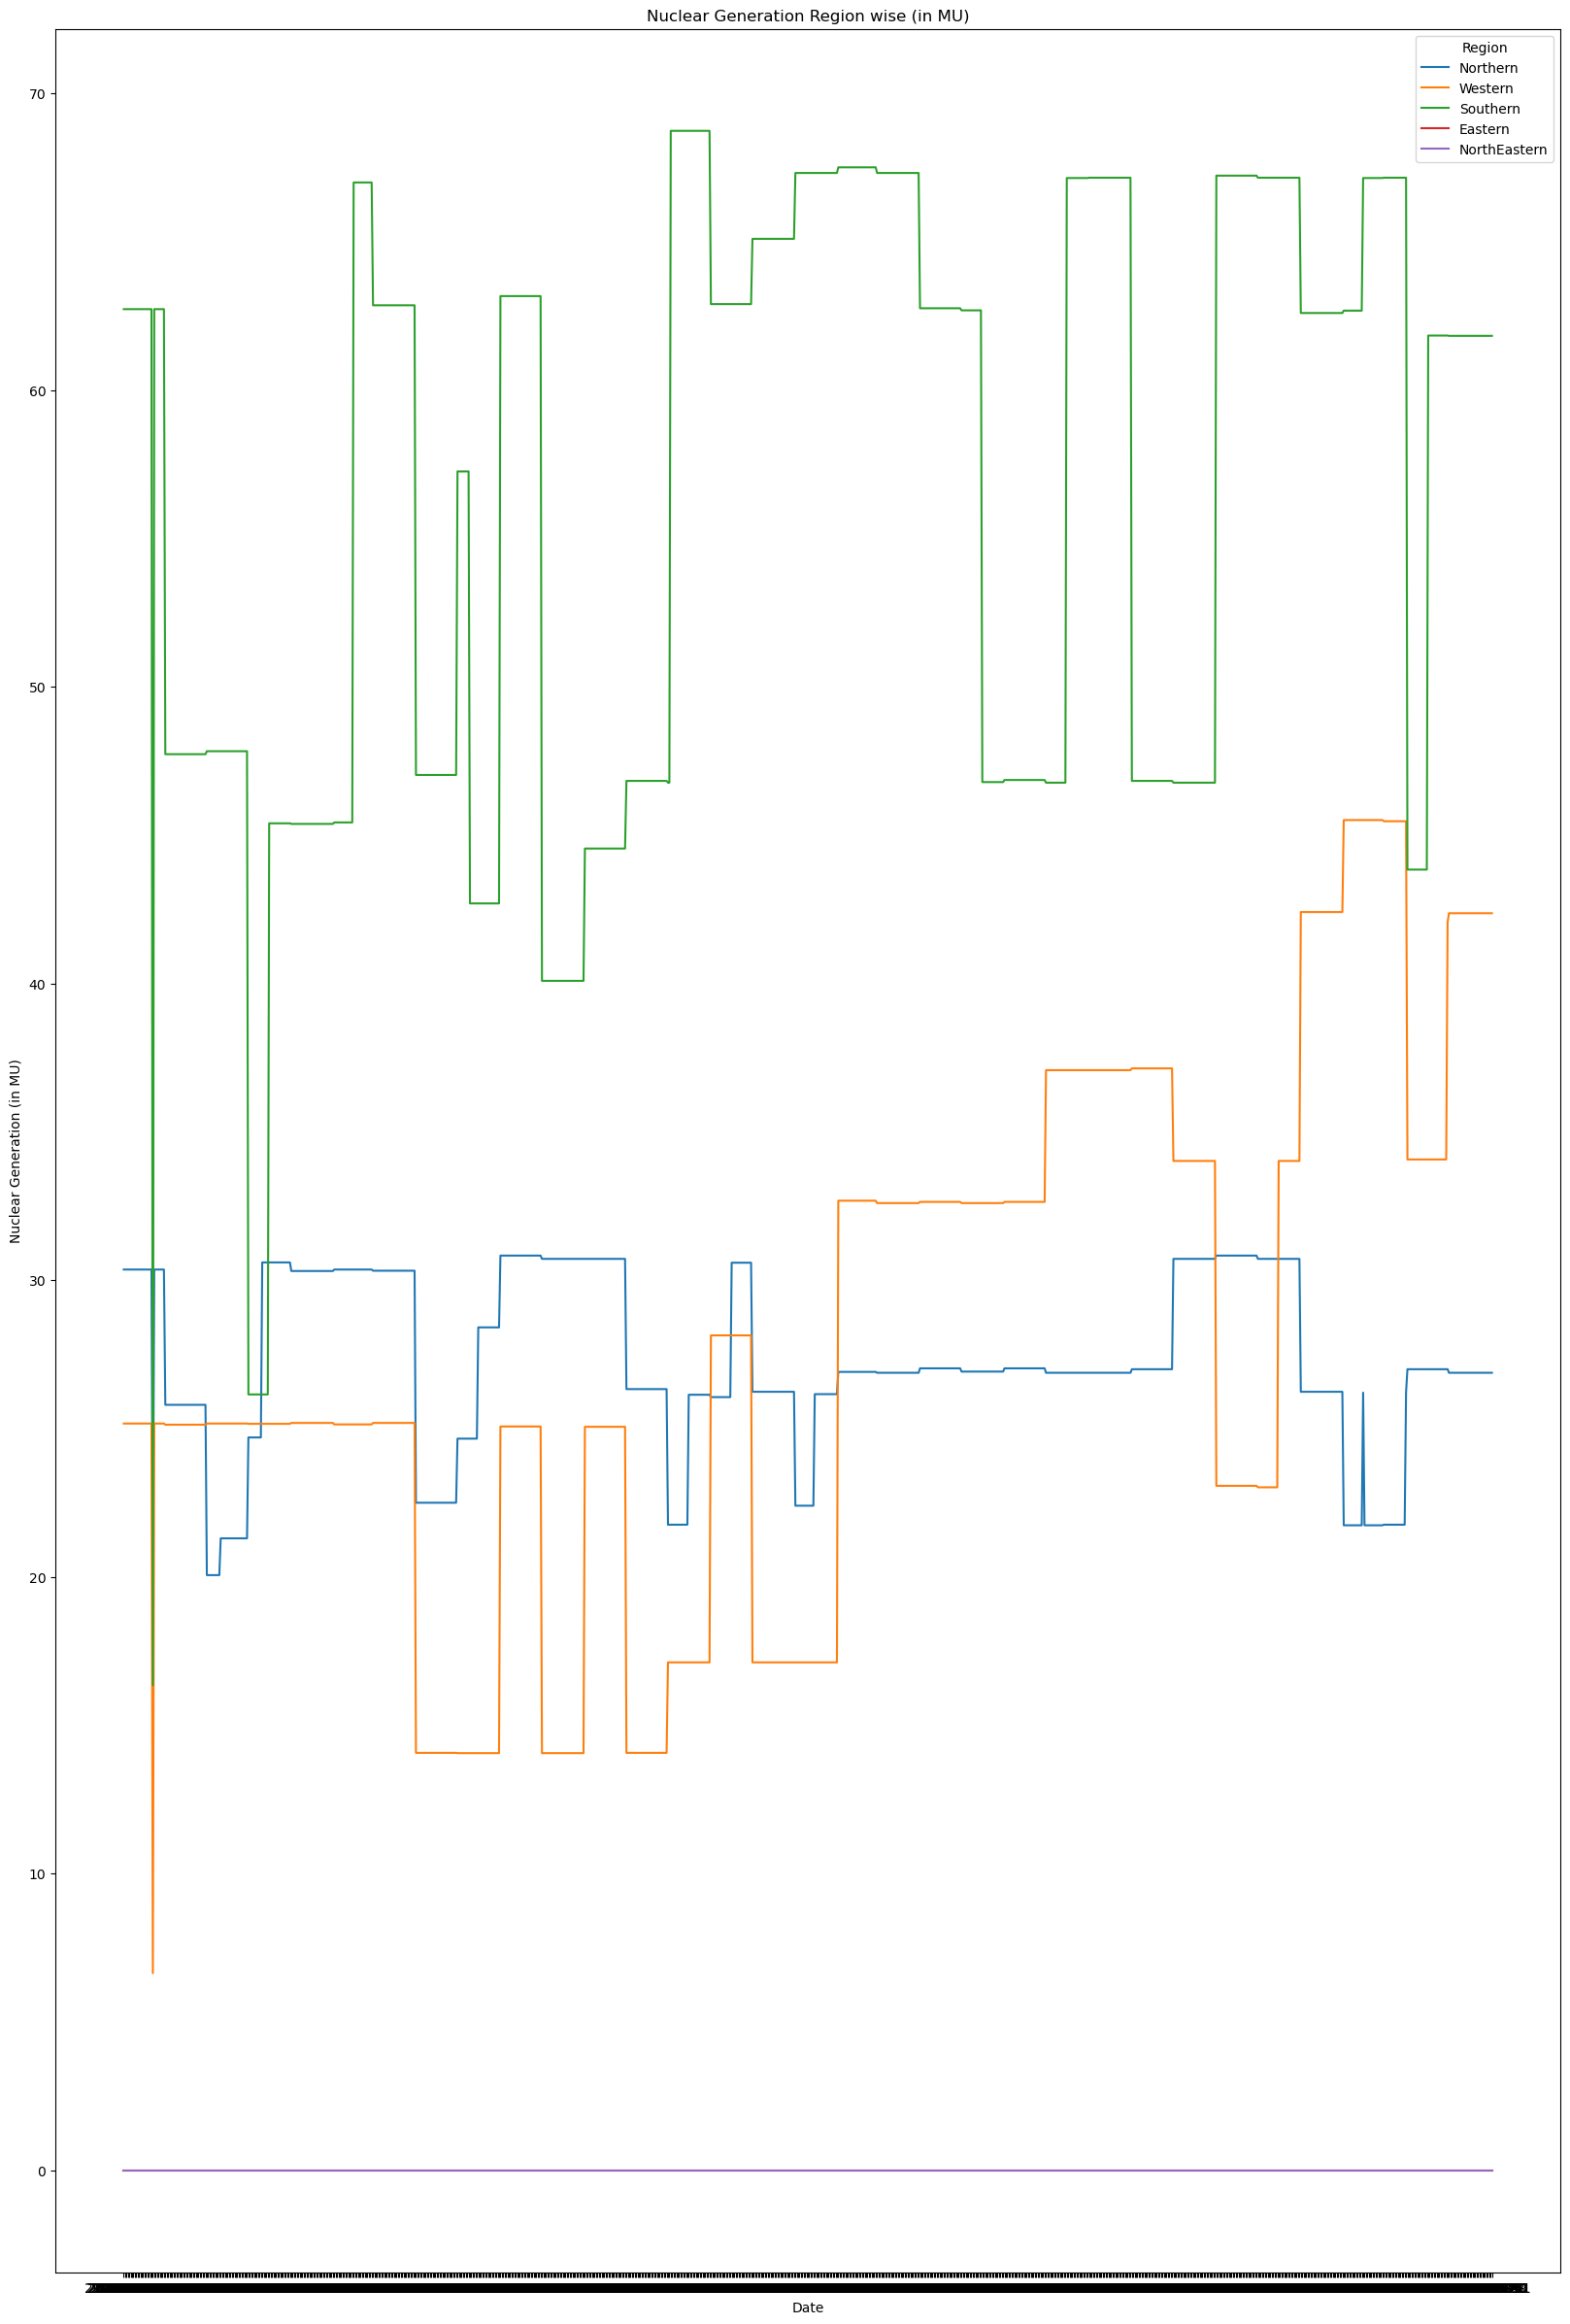

In [210]:
##plotting Nuclear Power (Actual and Estimated) with date
plt.figure(figsize=(20,30))
sns.lineplot(data=df_region,x='Date',y='Nuclear Generation Actual (in MU)',ci=False,hue='Region')
plt.ylabel('Nuclear Generation (in MU)')
plt.title("Nuclear Generation Region wise (in MU)")
plt.show();

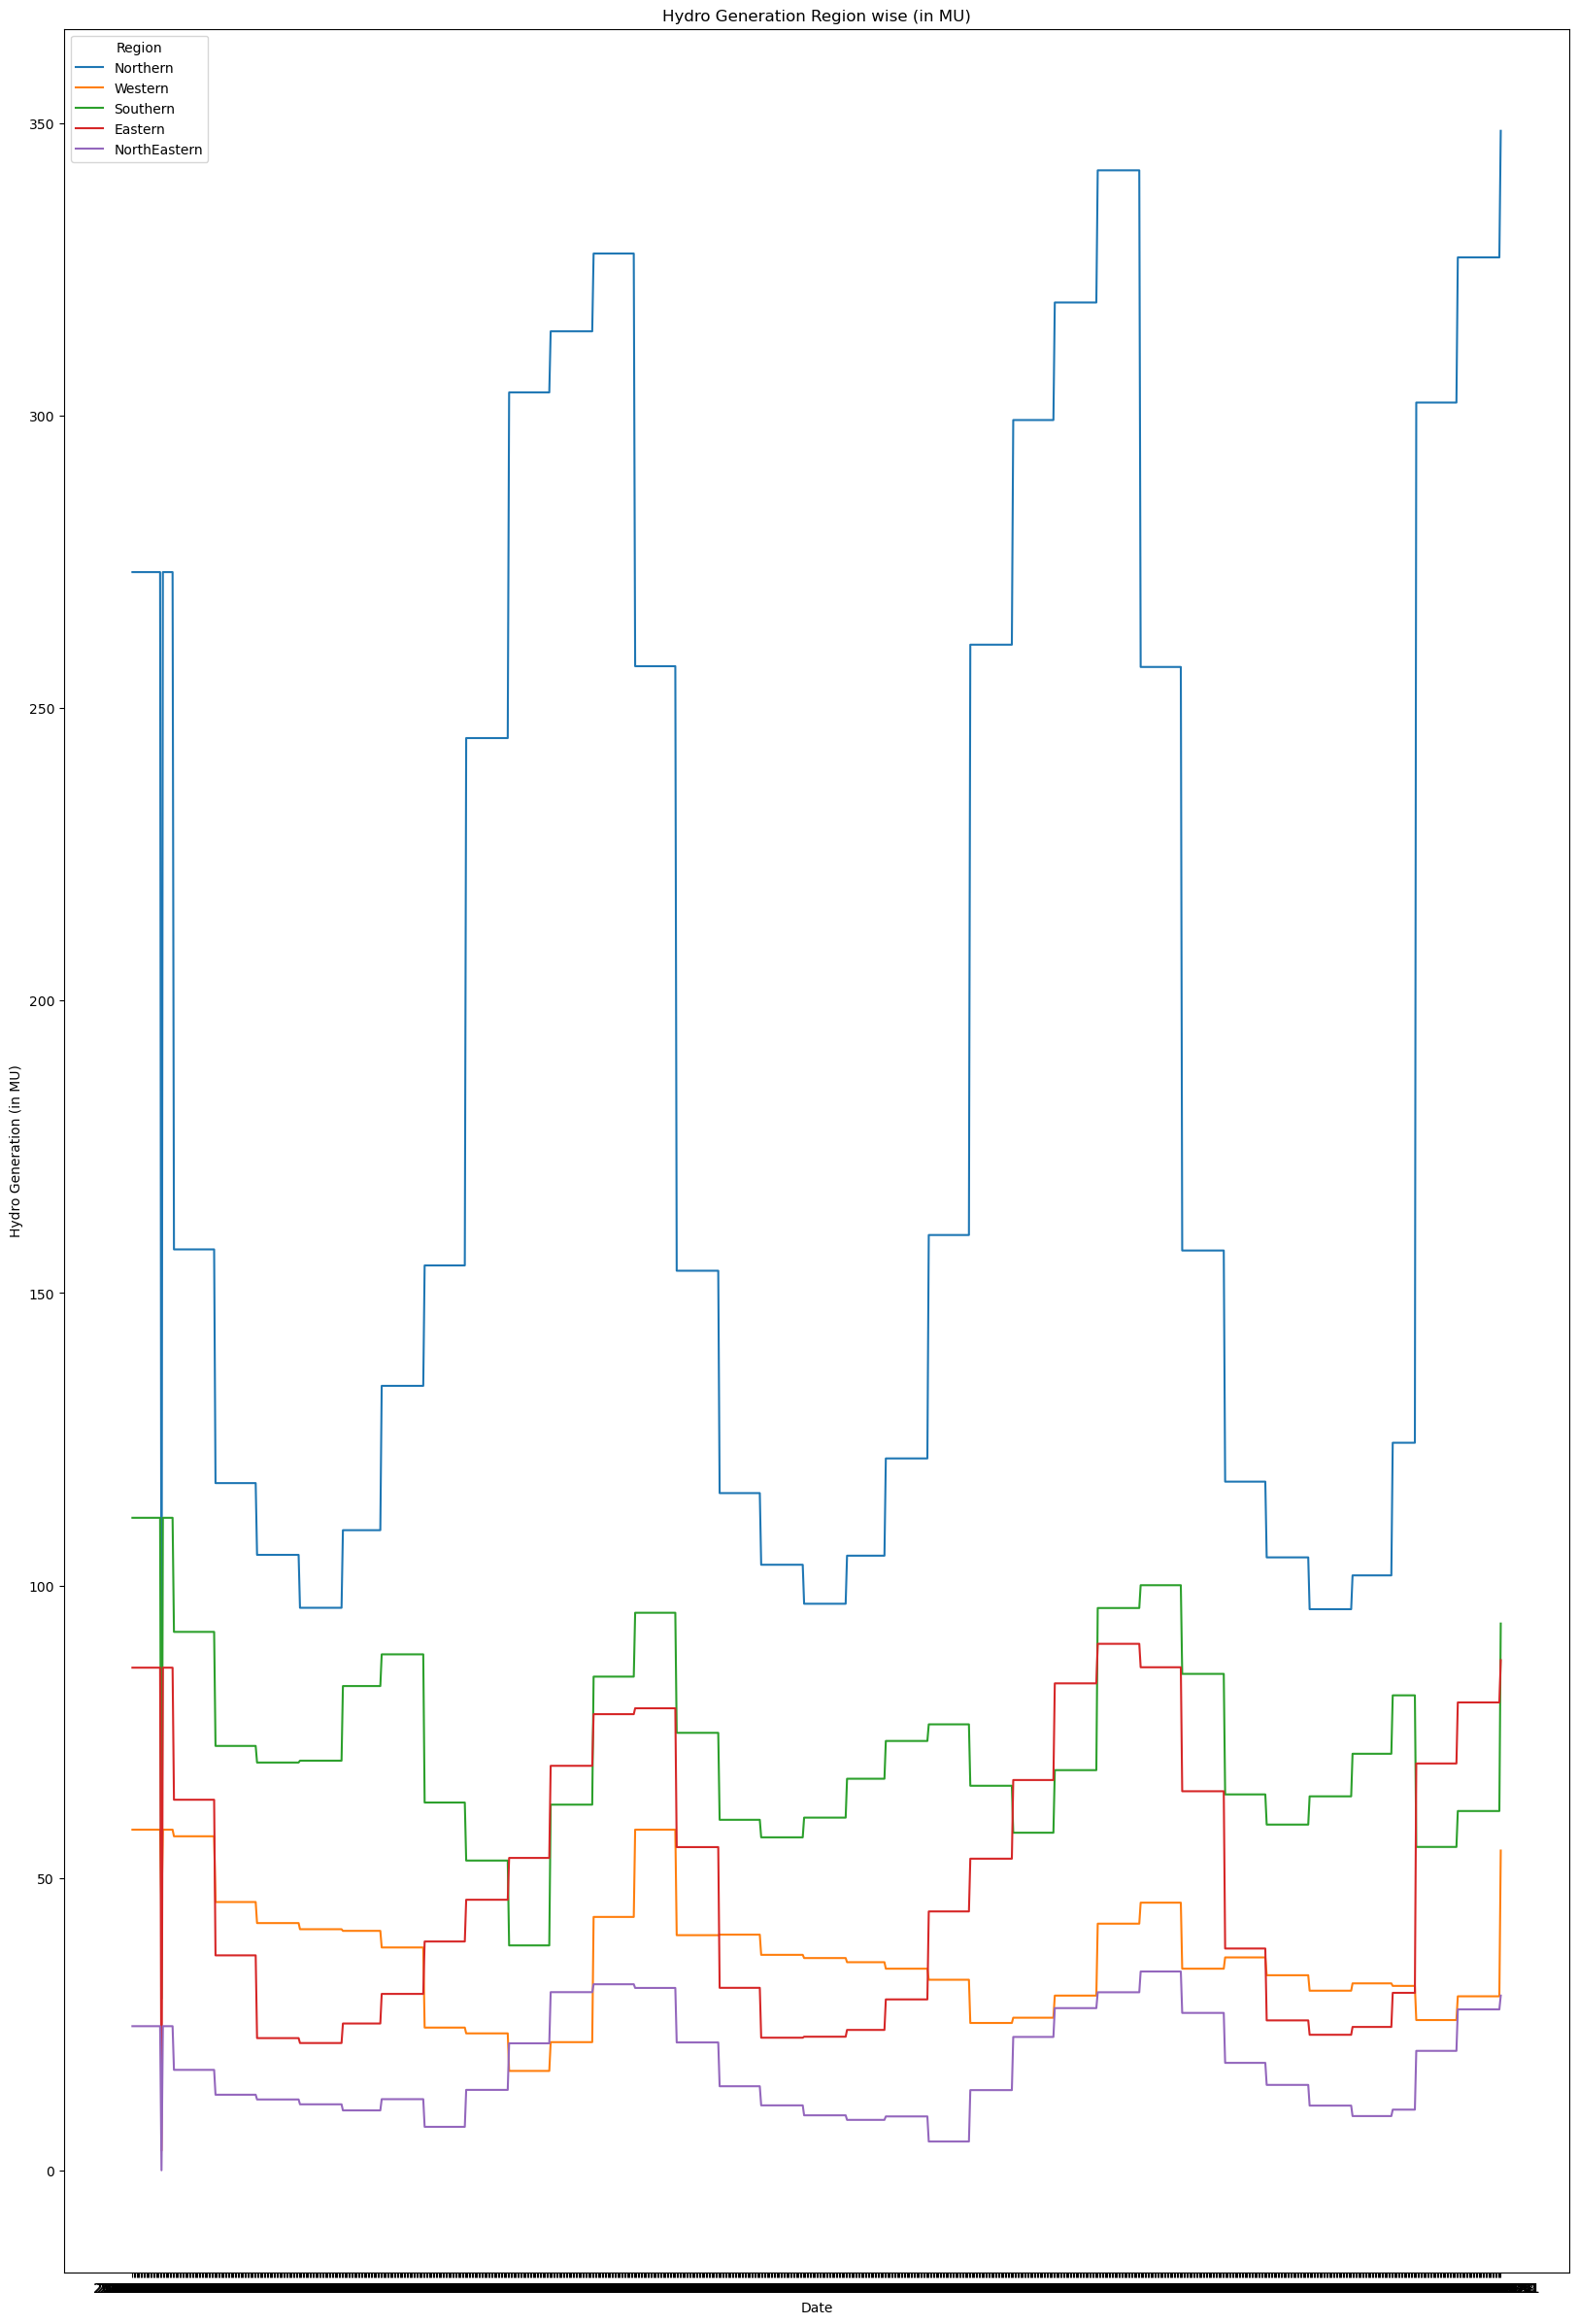

In [211]:
##plotting Hydro Power (Actual and Estimated) with date
plt.figure(figsize=(20,30))
sns.lineplot(data=df_region,x='Date',y='Hydro Generation Actual (in MU)',ci=False,hue='Region')
plt.ylabel('Hydro Generation (in MU)')
plt.title("Hydro Generation Region wise (in MU)")
plt.show();

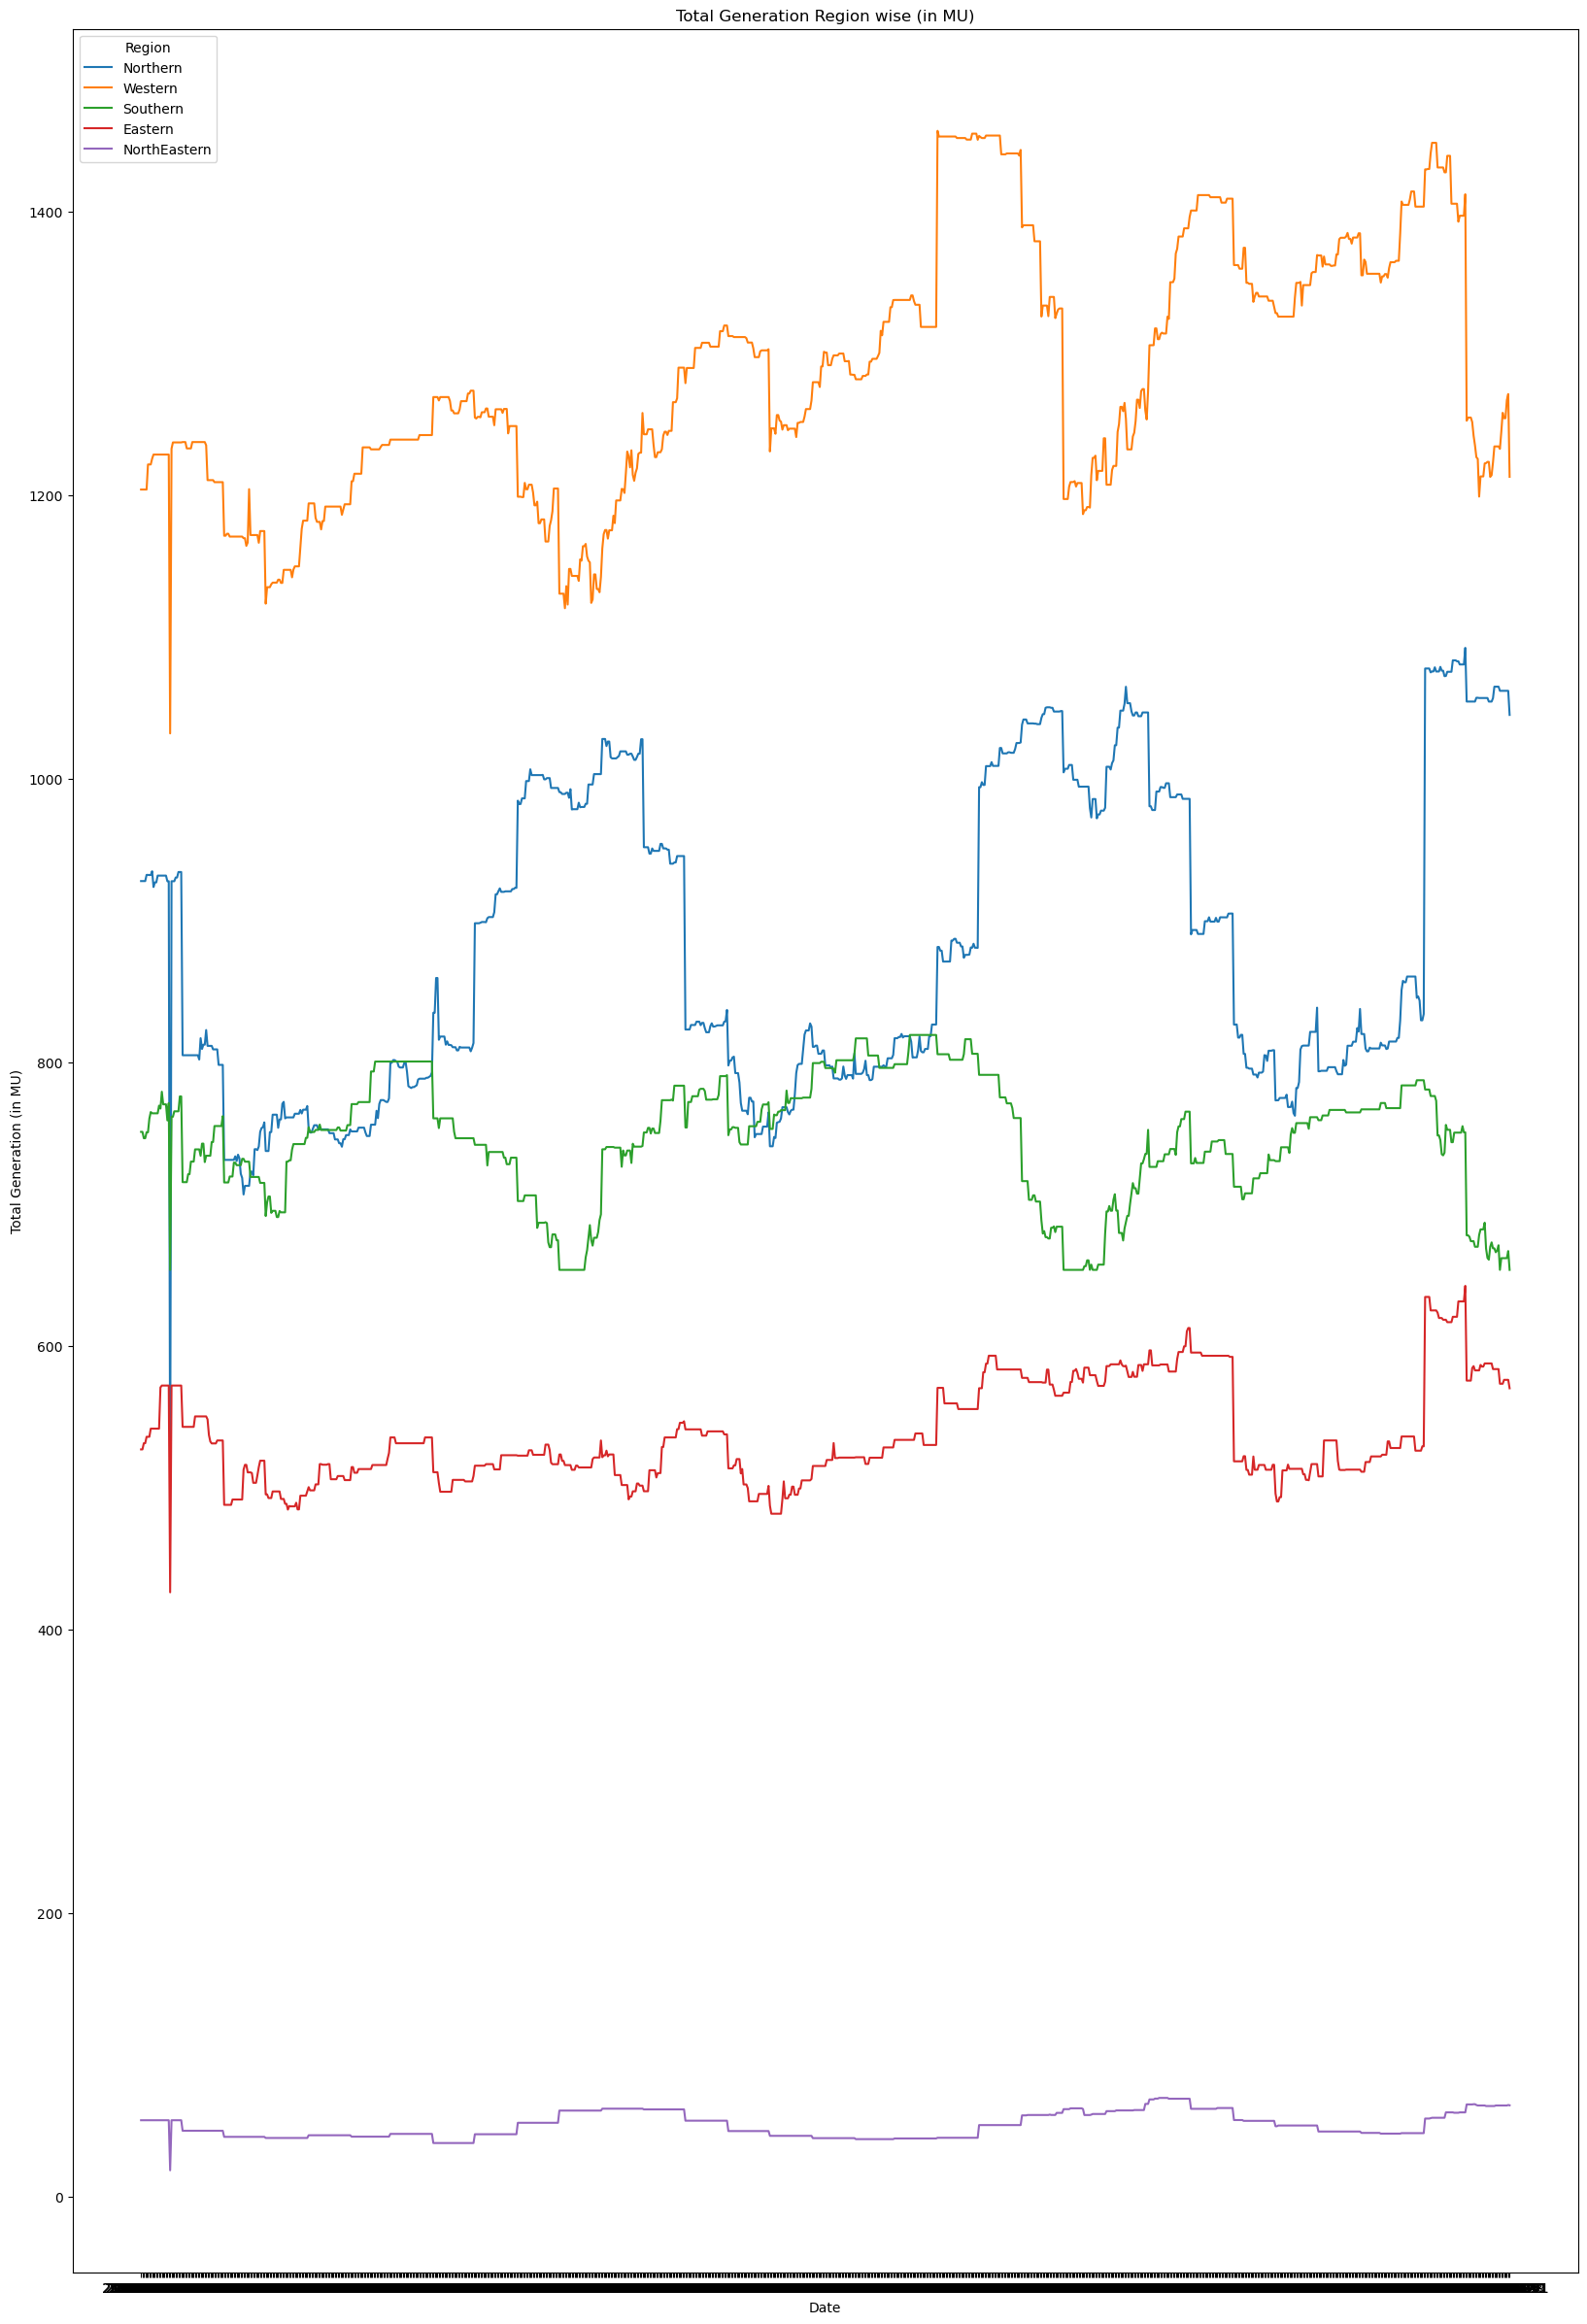

In [212]:
##plotting Total Power (Actual and Estimated) with date
plt.figure(figsize=(20,30))
sns.lineplot(data=df_region,x='Date',y='Total Power Actual Generated (in MU)',ci=False,hue='Region')
plt.ylabel('Total Generation (in MU)')
plt.title("Total Generation Region wise (in MU)")
plt.show();

### Seasonal Decompose of Time Series(Region Wise)

In [213]:
#decomposition function the time series additive
def seasonal_decompose_additive(region,title):
    for column in region[['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']]:
                          df_region_add_decompose=seasonal_decompose(region[column],model='additive',period=12)
                          df_region_add_decompose.plot()
                          plt.title(title)
                          plt.show();
    

In [214]:
#decomposition function the time series multiplicative
def seasonal_decompose_multiplicative(region,title):
    for column in region[['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']]:
                          df_region_mul_decompose=seasonal_decompose(region[column],model='multiplicative',period=12)
                          df_region_mul_decompose.plot()
                          plt.title(title)
                          plt.show();

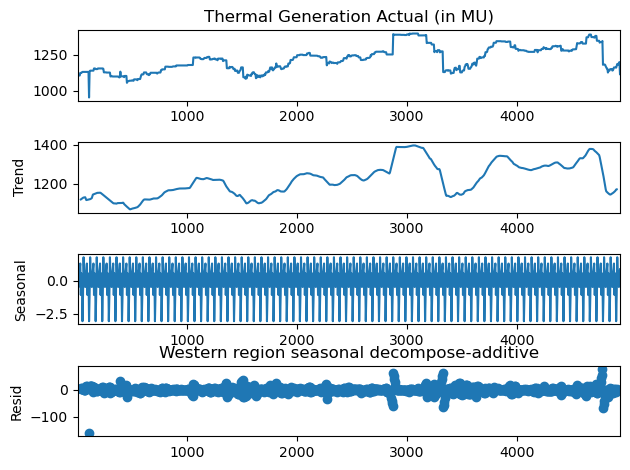

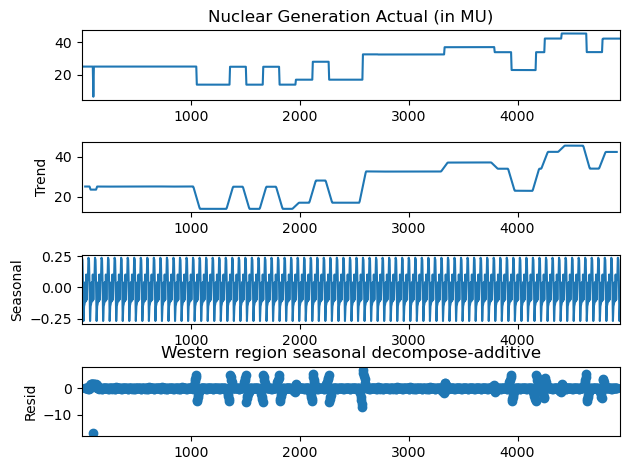

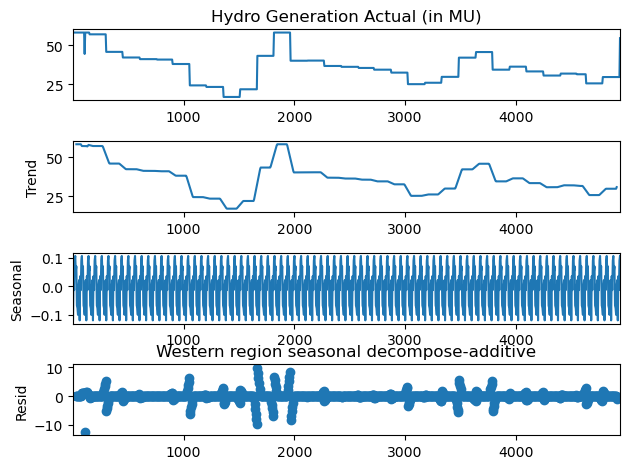

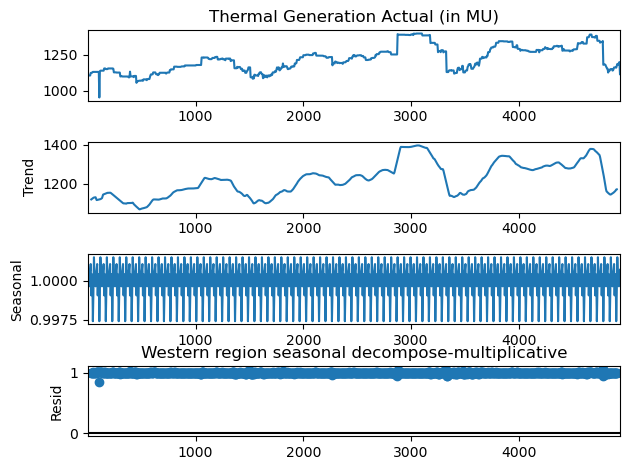

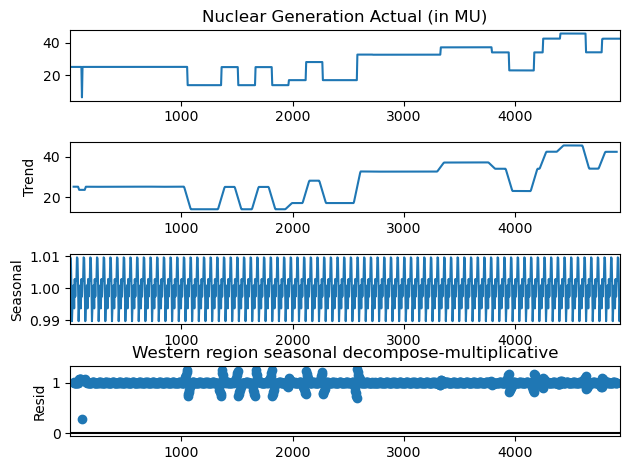

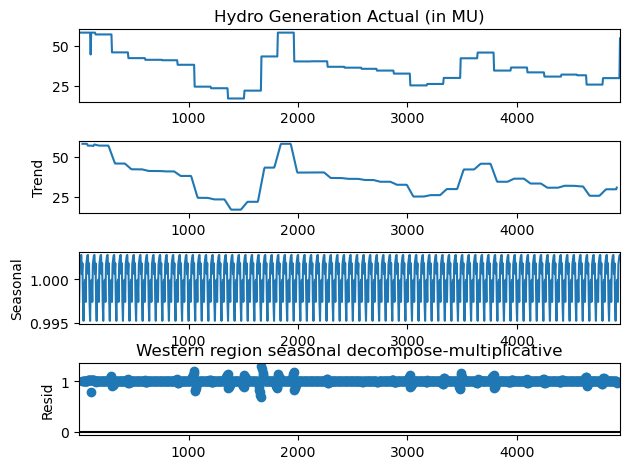

In [215]:
#Seasonal decomposition of Western Region
seasonal_decompose_additive(df_western,"Western region seasonal decompose-additive")
seasonal_decompose_multiplicative(df_western,"Western region seasonal decompose-multiplicative")

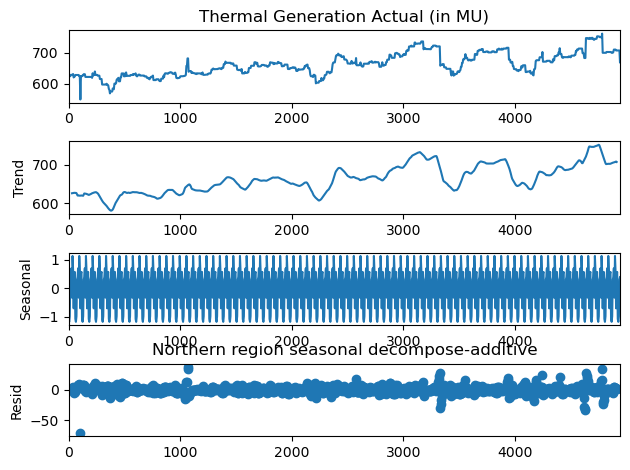

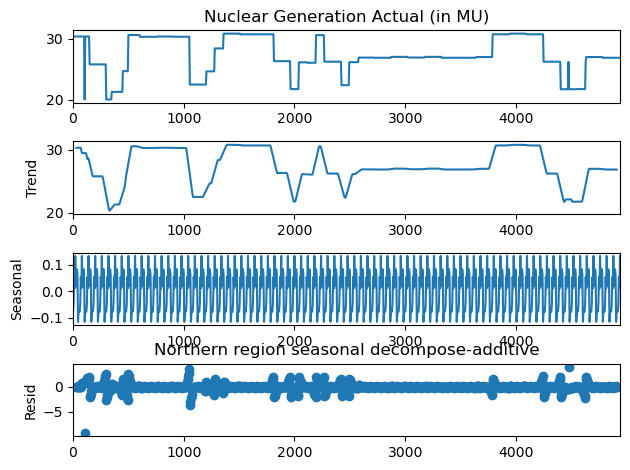

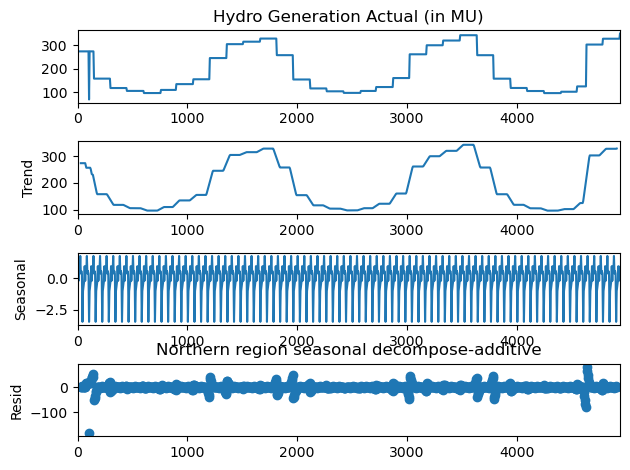

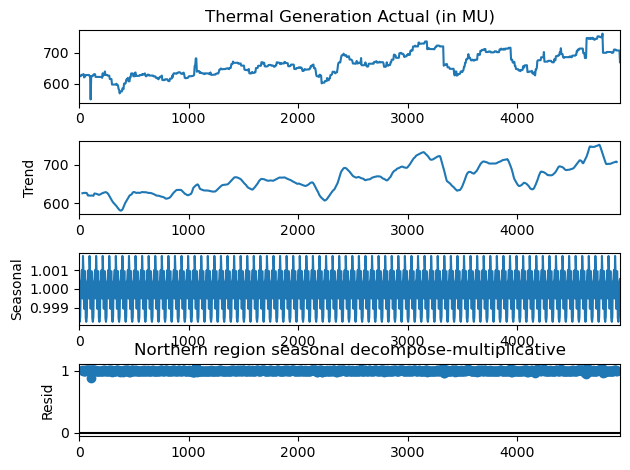

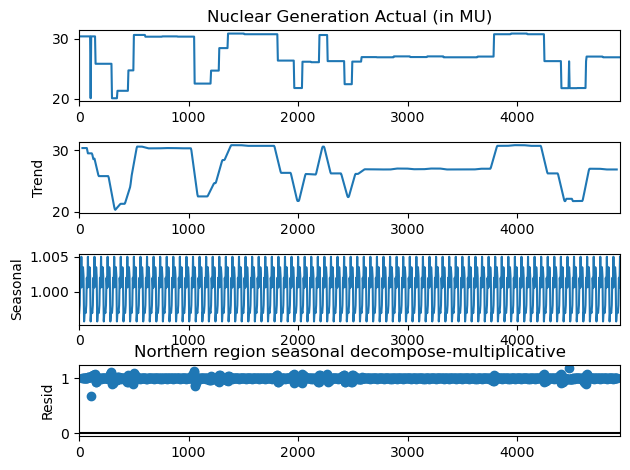

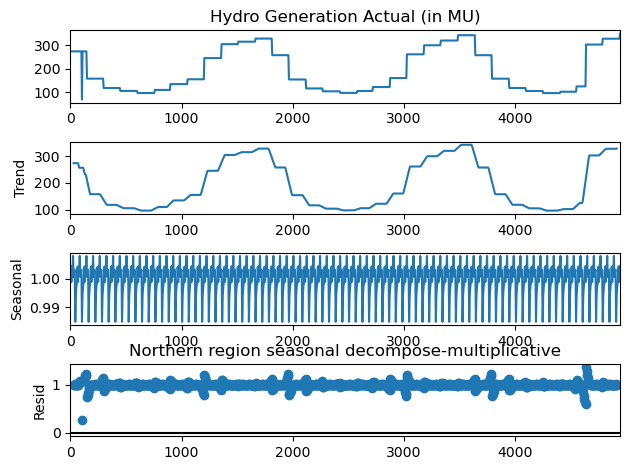

In [216]:
#Seasonal decomposition of Northern Region
seasonal_decompose_additive(df_northern,"Northern region seasonal decompose-additive")
seasonal_decompose_multiplicative(df_northern,"Northern region seasonal decompose-multiplicative")

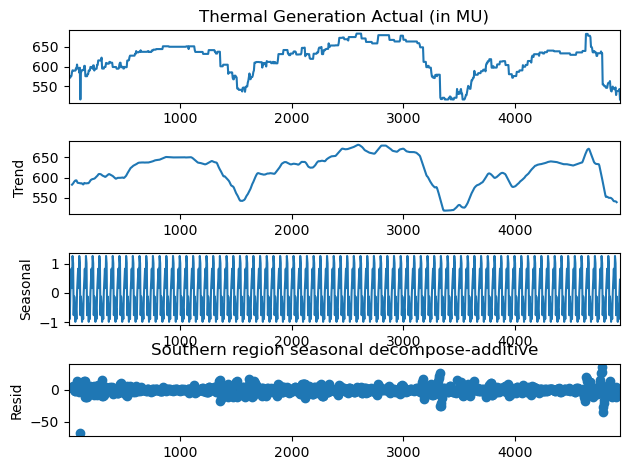

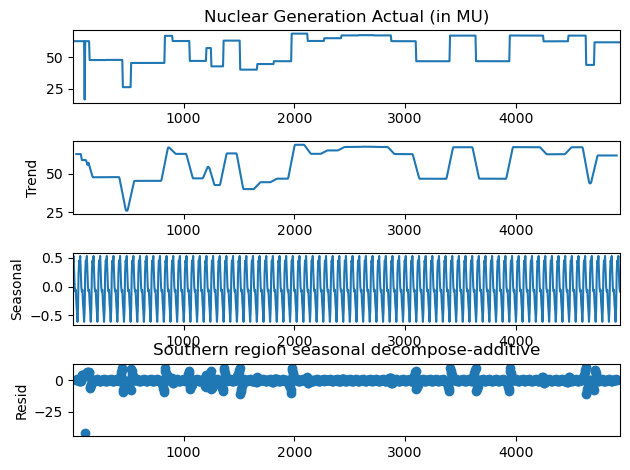

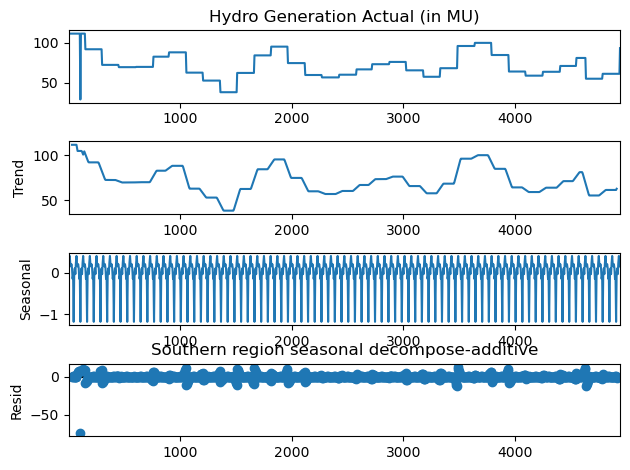

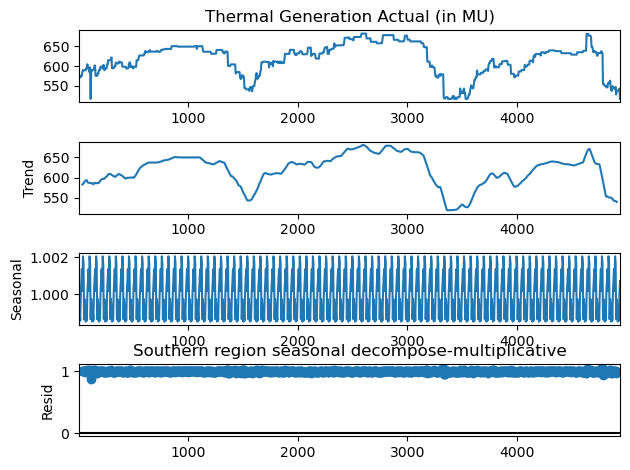

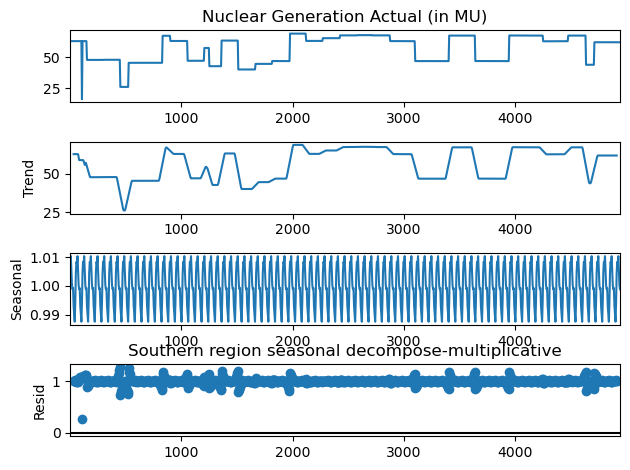

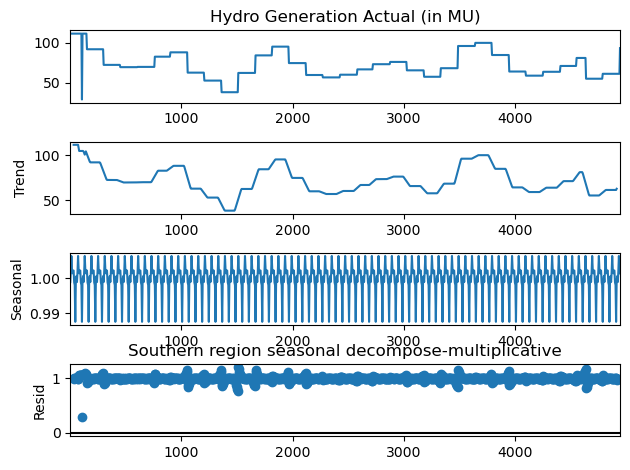

In [217]:
#Seasonal decomposition of Southern Region
seasonal_decompose_additive(df_southern,"Southern region seasonal decompose-additive")
seasonal_decompose_multiplicative(df_southern,"Southern region seasonal decompose-multiplicative")

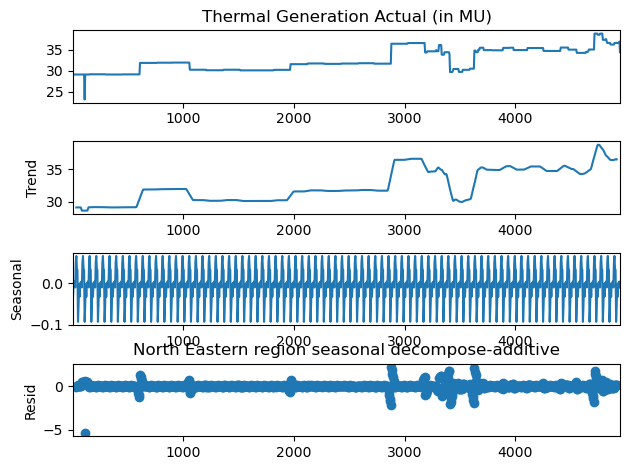

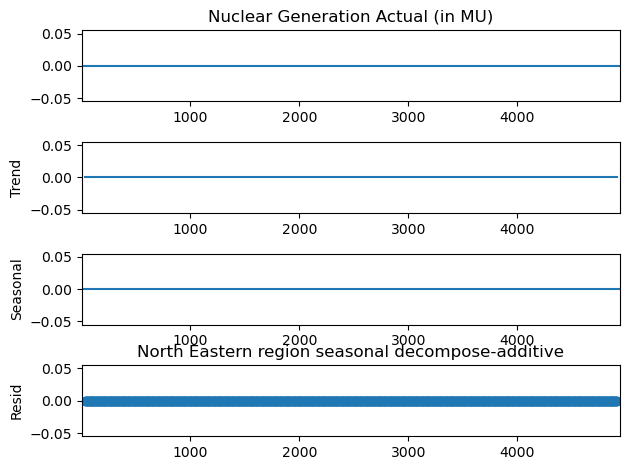

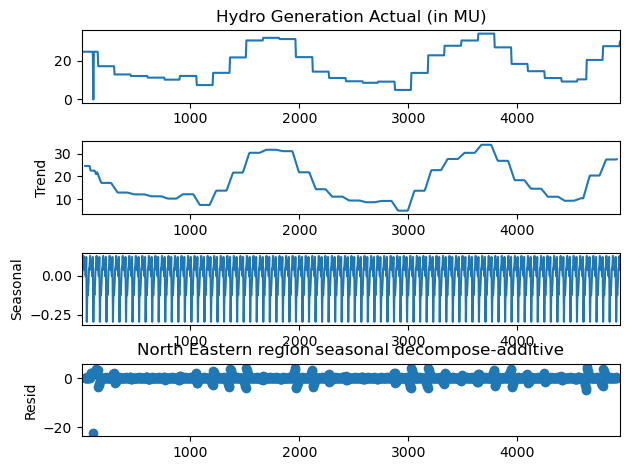

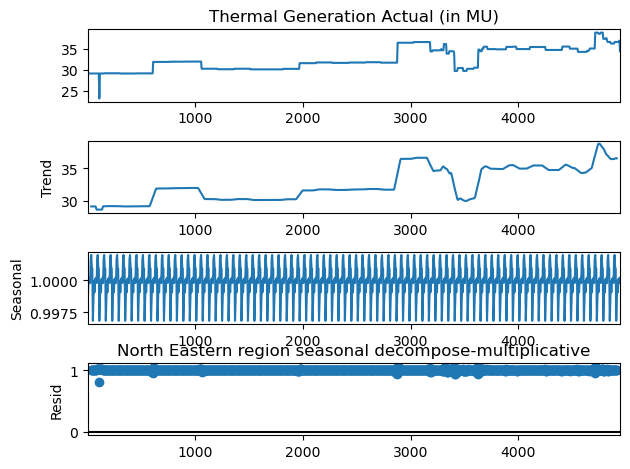

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [218]:
#Seasonal decomposition of North Eastern Region
seasonal_decompose_additive(df_northeastern,"North Eastern region seasonal decompose-additive")
seasonal_decompose_multiplicative(df_northeastern,"North Eastern region seasonal decompose-multiplicative")

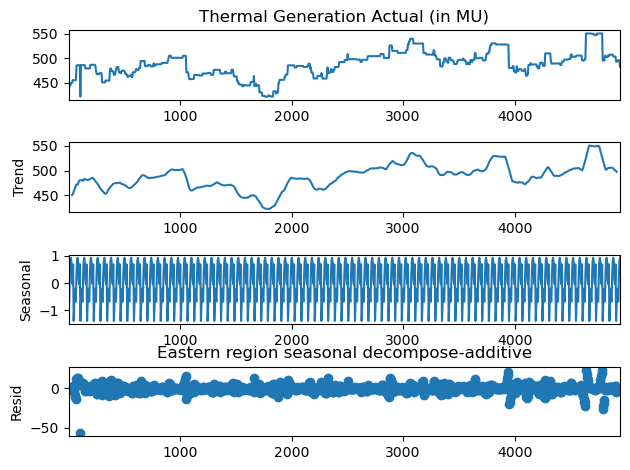

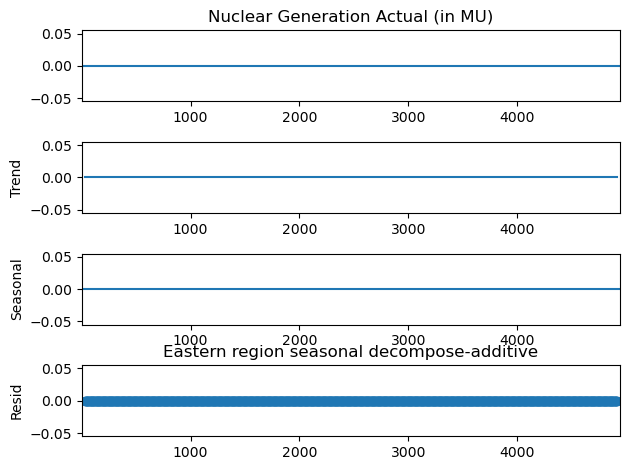

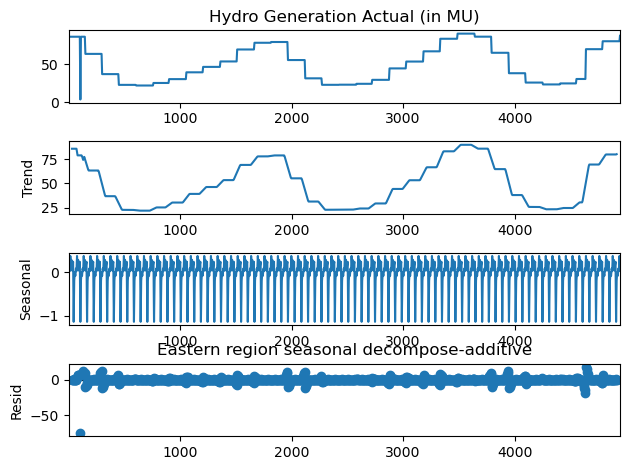

In [219]:
#Seasonal decomposition of Eastern Region
seasonal_decompose_additive(df_eastern,"Eastern region seasonal decompose-additive")

Observations:Df-Eastern-There are no trend present in additive model.  
There is seasonality present in thermal generation.  
Trend and seasonality both are present in Hydro Generation.  


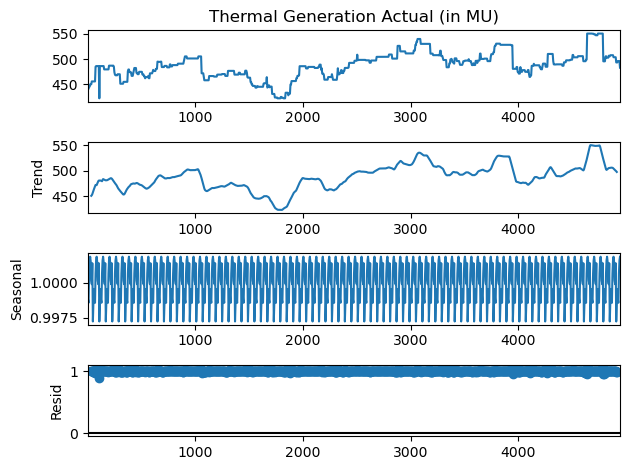

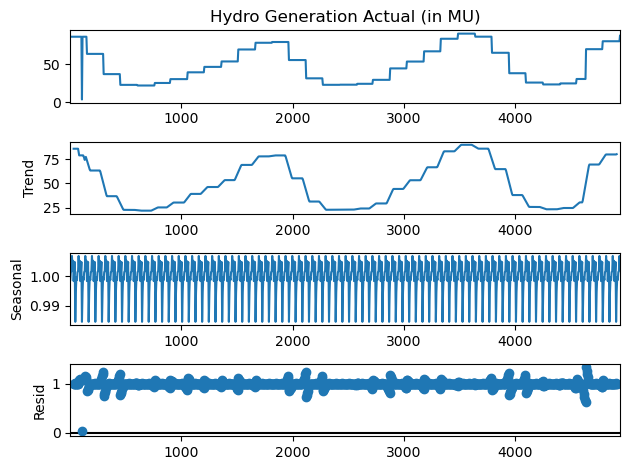

In [220]:
#Multiplicative seasonality is not appropriate for zero and negative values.
#So removing Nuclear Generation from multiplicative seasonal decompose
for column in df_eastern[['Thermal Generation Actual (in MU)','Hydro Generation Actual (in MU)']]:
                          df_eastern_mul_decompose=seasonal_decompose(df_eastern[column],model='multiplicative',period=12)
                          df_eastern_mul_decompose.plot()
                          plt.show();

Observations:Df-Eastern-There are no trend present in multiplicative model.  
There is seasonality present in thermal generation.  
Trend and seasonality both are present in Hydro Generation.  
Residual Error is less fluctuating in additive .  
So the model must be additive.  

Multiplicative seasonality is not appropriate for zero and negative values-as there are no reading for Nuclear generation in Eastern Region.  


### Train Test Split

Let us take the test set from 2020 jan and train set till 2019 dec.

In [250]:
#Creating Region wise test and train dataframe 
df_eastern_train,df_eastern_test=np.split(df_eastern,[int(.75*len(df_eastern))])
df_western_train,df_western_test=np.split(df_western,[int(.75*len(df_western))])
df_northeastern_train,df_northeastern_test=np.split(df_northeastern,[int(.75*len(df_northeastern))])
df_southern_train,df_southern_test=np.split(df_southern,[int(.75*len(df_southern))])
df_northern_train,df_northern_test=np.split(df_northern,[int(.75*len(df_northern))])

In [251]:
#Shape of Test and  Train Dataset
print('Test Data Regionwise')
for i in (df_eastern_test,df_western_test,df_northern_test,df_southern_test,df_northeastern_test):
    print('dataset :',i.shape)
print('Train Data Regionwise')
for i in (df_eastern_train,df_western_train,df_northern_train,df_southern_train,df_northeastern_train):
    print('dataset:',i.shape)

Test Data Regionwise
dataset : (248, 10)
dataset : (248, 10)
dataset : (248, 10)
dataset : (248, 10)
dataset : (248, 10)
Train Data Regionwise
dataset: (741, 10)
dataset: (741, 10)
dataset: (741, 10)
dataset: (741, 10)
dataset: (741, 10)


There are 247 rows and 10 columns in the test dataset.  
There are 742 rows and 10 columns in the test dataset.

In [252]:
#Print Dataset
print('Training Data Regionwise')
for i in (df_eastern_test,df_western_test,df_northern_test,df_southern_test,df_northeastern_test):
    print('dataset :',[i.head(5)])
print('Test Data Regionwise')
for i in (df_eastern_train,df_western_train,df_northern_train,df_southern_train,df_northeastern_train):
    print('dataset:',[i.head(5)])

Training Data Regionwise
dataset : [            Date   Region  Thermal Generation Actual (in MU)  Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  Hydro Generation Estimated (in MU)  Total Power Actual Generated (in MU)  Total Power Estimated (in MU)
3708  2019-09-14  Eastern  500.87                             441.02                                0.0                                0.0                                   86.01                            101.91                              586.88                                542.93                       
3713  2019-09-15  Eastern  495.87                             427.40                                0.0                                0.0                                   86.01                            104.93                              581.88                                532.33                       
3718  2019-09-16  Eastern  495.87 

dataset: [          Date    Region  Thermal Generation Actual (in MU)  Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  Nuclear Generation Estimated (in MU)  Hydro Generation Actual (in MU)  Hydro Generation Estimated (in MU)  Total Power Actual Generated (in MU)  Total Power Estimated (in MU)
0   2017-09-01  Northern  624.23                             484.21                                30.36                              35.57                                 273.27                           320.81                              927.86                                840.59                       
5   2017-09-02  Northern  624.23                             507.42                                30.36                              35.69                                 273.27                           317.19                              927.86                                860.30                       
10  2017-09-03  Northern  624.23                             49

###  Building all the exponential smoothing models on the training data and evaluate the model using RMSE ,MAPE on the test data.

In [253]:
#defining MAPE ,RMSE(sklearn),RMSE (statsmodel) function 

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

Exponential Smoothing

Exponential smoothing is a method for forecasting univariate time series data. It is based on the principle that a prediction is a weighted linear sum of past observations or lags. The Exponential Smoothing time series method works by assigning exponentially decreasing weights for past observations. The technique is so called because the weight assigned to each demand observation exponentially decreases.


<b>Simple Exponential Smoothing

Simple or single exponential smoothing-If the data has no trend and no seasonal pattern, then this method of forecasting the time series is essentially used. This method uses weighted moving averages with exponentially decreasing weights.

The single exponential smoothing formula is given by:

st = αxt+(1 – α)st-1 = st-1 + α(xt – st-1)
    

<b> Double Exponential Smoothing <b>
    
One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend. This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters. Applicable when data has Trend but no seasonality. Two separate components are considered: Level and Trend. Level is the local mean. One smoothing parameter α corresponds to the level series A second smoothing parameter β corresponds to the trend series.


    
**Triple Exponential Smoothing**

In the triple exponential smoothing method, exponential smoothing is used thrice. This method is primarily used to forecast the time series when the data has both linear trend and seasonal patterns.This method is also known as holt-Winters exponential smoothing.


In [254]:
#defining a function for simple exponential smoothing
#create class
def ExpSmooth(train,power,test):
    #SES calculation
    model_SES=SimpleExpSmoothing(train[power],initialization_method='estimated')
    model_SES_autofit=model_SES.fit(optimized=True)
    SES_predict=model_SES_autofit.forecast(steps=len(test))
    predicted_SES=pd.DataFrame({'SES':[SES_predict]})
    
    #calculating MAPE( Mean Absolute Percentage Error (MAPE))
    MAPE_SES=MAPE(test[power].values,SES_predict.values)
    #calculating RMSE(sklearn)
    RMSE_SES_sklearn=mean_squared_error(test[power].values,SES_predict.values,squared=False)
    #statsmodel way to calculate RMSE
    RMSE_SES_sm=em.rmse(test[power].values,SES_predict.values)

    

    
    
    #Double exponential smoothing model
    # Initializing the Double Exponential Smoothing Model
    model_DES = Holt(train[power],initialization_method='estimated')
    # Fitting the model
    model_DES = model_DES.fit()
    # Forecasting using this model for the duration of the test set
    DES_predict =  model_DES.forecast(len(test))
    
    #calculating MAPE
    MAPE_DES=MAPE(test[power].values,DES_predict.values)
    #calculating RMSE(sklearn)
    RMSE_DES_sklearn=mean_squared_error(test[power].values,DES_predict.values,squared=False)
    #statsmodel way to calculate RMSE
    RMSE_DES_sm=em.rmse(test[power].values,DES_predict.values)
    
    
    
    
    #Triple exponential smoothing model(additive model)
    model_TES_1=ExponentialSmoothing(train[power],trend= 'additive',seasonal= 'additive', seasonal_periods=12,initialization_method='estimated')
    model_TES_add=model_TES_1.fit()
    TES_addpredict=model_TES_add.forecast(len(test))
    
    #calculating MAPE
    MAPE_TES_add=MAPE(test[power].values,TES_addpredict.values)
    #calculating RMSE(sklearn)
    RMSE_TES_add_sklearn=mean_squared_error(test[power].values,TES_addpredict.values,squared=False)
    #statsmodel way to calculate RMSE
    RMSE_TES_add_sm=em.rmse(test[power].values,TES_addpredict.values)
    
    
    
    #Triple Exponential smoothing model(multiplicative model)
    model_TES_2=ExponentialSmoothing(train[power],trend='additive',seasonal='multiplicative',seasonal_periods=12,initialization_method='estimated')
    model_TES_mul=model_TES_2.fit()
    TES_mulpredict=model_TES_mul.forecast(len(test))
    
    #calculating MAPE
    MAPE_TES_mul=MAPE(test[power].values,TES_mulpredict.values)
    #calculating RMSE (sklearn)
    RMSE_TES_mul_sklearn=mean_squared_error(test[power].values,TES_mulpredict.values)
    #RMSE statsmodel
    RMSE_TES_mul_sm=em.rmse(test[power].values,TES_mulpredict.values)
    
    data={'RMSE (sklearn)': [RMSE_SES_sklearn,RMSE_DES_sklearn,RMSE_TES_add_sklearn,RMSE_TES_mul_sklearn],'RMSE (statsmodel)': [RMSE_SES_sm,RMSE_DES_sm,RMSE_TES_add_sm,RMSE_TES_mul_sm],'MAPE': [MAPE_SES,MAPE_DES,MAPE_TES_add,MAPE_TES_mul]}
    
    resultsDf_Exp = pd.DataFrame(data,index=['Simple Exponential Model','Double Exponential Model','Holt Winters  ETS(A, A, A)','Holt Winters Model ETS(A, M, M)'])


   
    print(resultsDf_Exp)
    
    plt.figure(figsize=(30,20))
    plt.subplot(2,2,1)
    plt.plot(train.index.values,train[power],label="Train")
    plt.plot(test.index.values,test[power],label="Test")
    plt.plot(test.index.values,SES_predict,label='Simple Exponential Smoothing')
    plt.title("Simple Exponential Smoothing")
    plt.subplot(2,2,2)
    plt.plot(train.index.values,train[power],label="Train")
    plt.plot(test.index.values,test[power],label="Test")
    plt.plot(test.index.values,DES_predict,label='Double Exponential Smoothing')
    plt.title("Double Exponential Smoothing")
    plt.subplot(2,2,3)
    plt.plot(train.index.values,train[power],label="Train")
    plt.plot(test.index.values,test[power],label="Test")
    plt.plot(test.index.values,TES_addpredict,label='Holt Winters  ETS(A, A, A)')
    plt.title("Holt Winters  ETS(A, A, A)")
    plt.subplot(2,2,4)
    plt.plot(train.index.values,train[power],label="Train")
    plt.plot(test.index.values,test[power],label="Test")
    plt.plot(test.index.values,TES_mulpredict,label='Holt Winters  ETS(A, M,M)')
    plt.title("Holt Winters  ETS(A, M, M)")

In [255]:
#defining function for stationarity on data using ADF
def adf(column):
    dftest=adfuller(column)#stationarity check
    print('DF test statistic is %3.3f' %dftest[0])
    print('DF test p-value is %1.4f' %dftest[1])
    print('Critical Values:')
    for dftest, value in dftest[4].items():
        print('\t%s: %.3f' % (dftest, value),'\n')

In [256]:
#checking stationarity for Thermal Generation
print("ADF result for Thermal Generation")
adf(df['Thermal Generation Actual (in MU)'])

ADF result for Thermal Generation
DF test statistic is -2.912
DF test p-value is 0.0439
Critical Values:
	1%: -3.432 

	5%: -2.862 

	10%: -2.567 



The p value is <0.05 and ADF test statistics is less than 2 critical values . We can reject the null hypothesis.  
The time series is stationary.

In [257]:
#checking stationarity for Nuclear Generation
print("ADF result for Nuclear Generation")
adf(df['Nuclear Generation Actual (in MU)'])

ADF result for Nuclear Generation
DF test statistic is -3.574
DF test p-value is 0.0063
Critical Values:
	1%: -3.432 

	5%: -2.862 

	10%: -2.567 



The p value is <0.05 and ADF test statistics is less than critical values .We can reject the null hypothesis.  
The time series is stationary. 

In [258]:
#checking stationarity for Hydro Generation
print("ADF result for Hydro Generation")
adf(df['Hydro Generation Actual (in MU)'])

ADF result for Hydro Generation
DF test statistic is -1.941
DF test p-value is 0.3130
Critical Values:
	1%: -3.432 

	5%: -2.862 

	10%: -2.567 



The p value is >0.05 and ADF statistics are also more than critical values. We Failed to reject the null hypothesis.The Hydro Generation time series is non stationary.

###  Square root transformation to change stationarity

In [259]:
###  Square root transformation to change stationarity region wise
## for Eastern Region
df_eastern_hydro_sqrt=np.sqrt(df_eastern['Hydro Generation Actual (in MU)'])
df_diff=df_eastern_hydro_sqrt.diff().dropna()

#ADF test on df eastern hydro generation
df_test_adf=adfuller(df_diff)#Stationarity check on train time series data
df_test_adf
print('DF test statistic is %3.3f' %df_test_adf[0])
print('DF test p-value is %1.4f' %df_test_adf[1])
print('Critical Values:')
for df_test_adf, value in df_test_adf[4].items():
 print('\t%s: %.3f' % (df_test_adf, value),'\n')

DF test statistic is -12.248
DF test p-value is 0.0000
Critical Values:
	1%: -3.437 

	5%: -2.864 

	10%: -2.568 



p-value is less than 0.05 and test statistics is less than all the critical values.We can reject the null hypothesis.The time series is now stationary.

In [260]:
##for North Eastern Region
df_northeastern_hydro_sqrt=np.sqrt(df_northeastern['Hydro Generation Actual (in MU)'])
df_diff=df_northeastern_hydro_sqrt.diff().dropna()

#ADF test in df northeastern hydro generation
df_test_adf=adfuller(df_diff)#Stationarity check on train time series data
df_test_adf
print('DF test statistic is %3.3f' %df_test_adf[0])
print('DF test p-value is %1.4f' %df_test_adf[1])
print('Critical Values:')
for df_test_adf, value in df_test_adf[4].items():
 print('\t%s: %.3f' % (df_test_adf, value),'\n')

DF test statistic is -12.306
DF test p-value is 0.0000
Critical Values:
	1%: -3.437 

	5%: -2.864 

	10%: -2.568 



p-value is less than 0.05 and test statistics is less than all the critical values.  
We can reject the null hypothesis.The time series is now stationary.

In [261]:
##for Southern Region
df_south_hydro_sqrt=np.sqrt(df_southern['Hydro Generation Actual (in MU)'])
df_diff=df_south_hydro_sqrt.diff().dropna()


#ADF test in df_southern hydro generation
df_test_adf=adfuller(df_diff)#Stationarity check on train time series data
df_test_adf
print('DF test statistic is %3.3f' %df_test_adf[0])
print('DF test p-value is %1.4f' %df_test_adf[1])
print('Critical Values:')
for df_test_adf, value in df_test_adf[4].items():
 print('\t%s: %.3f' % (df_test_adf, value),'\n')

DF test statistic is -11.578
DF test p-value is 0.0000
Critical Values:
	1%: -3.437 

	5%: -2.864 

	10%: -2.568 



p-value is less than 0.05 and test statistics is less than all the critical values.  
We can reject the null hypothesis.The time series is now stationary.

In [262]:
##for Northern Region
df_north_hydro_sqrt=np.sqrt(df_northern['Hydro Generation Actual (in MU)'])
df_diff=df_north_hydro_sqrt.diff().dropna()


#ADF test in df_southern hydro generation
df_test_adf=adfuller(df_diff)#Stationarity check on train time series data
df_test_adf
print('DF test statistic is %3.3f' %df_test_adf[0])
print('DF test p-value is %1.4f' %df_test_adf[1])
print('Critical Values:')
for df_test_adf, value in df_test_adf[4].items():
 print('\t%s: %.3f' % (df_test_adf, value),'\n')

DF test statistic is -11.387
DF test p-value is 0.0000
Critical Values:
	1%: -3.437 

	5%: -2.864 

	10%: -2.568 



p-value is less than 0.05 and test statistics is less than all the critical values.
We can reject the null hypothesis.The time series is now stationary.


In [263]:
##for Western Region
df_west_hydro_sqrt=np.sqrt(df_western['Hydro Generation Actual (in MU)'])
df_diff=df_west_hydro_sqrt.diff().dropna()


#ADF test in df_southern hydro generation
df_test_adf=adfuller(df_diff)
print("DF test p statistics is " ,df_test_adf[0])
print("DF test p-values is ",df_test_adf[1])
print("Critical Values:")
for df_test_adf in df_test_adf[4].items():
    print('\t%s:%.3f '%(df_test_adf,value),'\n')

DF test p statistics is  -29.788178224853848
DF test p-values is  0.0
Critical Values:
	('1%', -3.4369927443074353):-2.568  

	('5%', -2.864472756705845):-2.568  

	('10%', -2.568331546097238):-2.568  



p-value is less than 0.05 and test statistics is less than all the critical values.
We can reject the null hypothesis.The time series is now stationary.


In [264]:
#defining function for automated ARIMA,SARIMA,SARIMAX
def arima(train,power,test):
    #model auto-ARIMA
    model_arima=auto_arima(train[power],test='adf',m=24,seasonal=True,trace=False,error_action='ignore',suppress_warnings=True,stepwise=True)
    pre_ARIMA=model_arima.predict(len(test[power]))
    
   
    
    #caulculating MAPE
    MAPE_arima=MAPE(test[power].values,pre_ARIMA.values)
    #calculating RMSE(statsmodel)
    RMSE_arima_sm=em.rmse(test[power].values,pre_ARIMA.values)
    
    
    #model auto-SARIMA
    model_sarima=auto_arima(train[power],start_p=0,d=0, start_q=0,
                      max_p=5,max_d=5, max_q=5,
                      m=1,             
                      seasonal=True,   
                      start_P=0,
                      D=1,
                      start_Q=0,
                      max_P=5,
                      max_D=5,
                      max_Q=5,
                      
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True,stepwise=True)
    pre_SARIMA = model_sarima.predict(len(test[power]))
    
    
    #calculating MAPE
    MAPE_sarima=MAPE(test[power].values,pre_SARIMA.values)
    #calculating RMSE (statsmodel)
    RMSE_sarima_sm=em.rmse(test[power].values,pre_SARIMA.values)
    
    
    
    data1={"MAPE:":[MAPE_arima,MAPE_sarima],"RMSE:":[RMSE_arima_sm,RMSE_sarima_sm]}
    
    resultDF_arima=pd.DataFrame(data1,index=['Auto-Arima','Auto-Sarima'])      
    print(resultDF_arima)
    
    plt.figure(figsize=(30,20))
    plt.subplot(1,2,1)
    plt.plot(train.index.values,train[power],label="Train")
    plt.plot(test.index.values,test[power],label="Test")
    plt.plot(test.index.values,pre_ARIMA,label='ARIMA')
    plt.title("Auto-ARIMA")
    plt.subplot(1,2,2)
    plt.plot(train.index.values,train[power],label="Train")
    plt.plot(test.index.values,test[power],label="Test")
    plt.plot(test.index.values,pre_SARIMA,label='SARIMA')
    plt.title("Auto-SARIMA")

                                 RMSE (sklearn)  RMSE (statsmodel)      MAPE
Simple Exponential Model         23.178227       23.178227          3.503505
Double Exponential Model         23.212302       23.212302          4.217521
Holt Winters  ETS(A, A, A)       23.225427       23.225427          4.224147
Holt Winters Model ETS(A, M, M)  539.529524      23.227775          4.224833


KeyError: 'Thermal Generation Actual(in MU)'

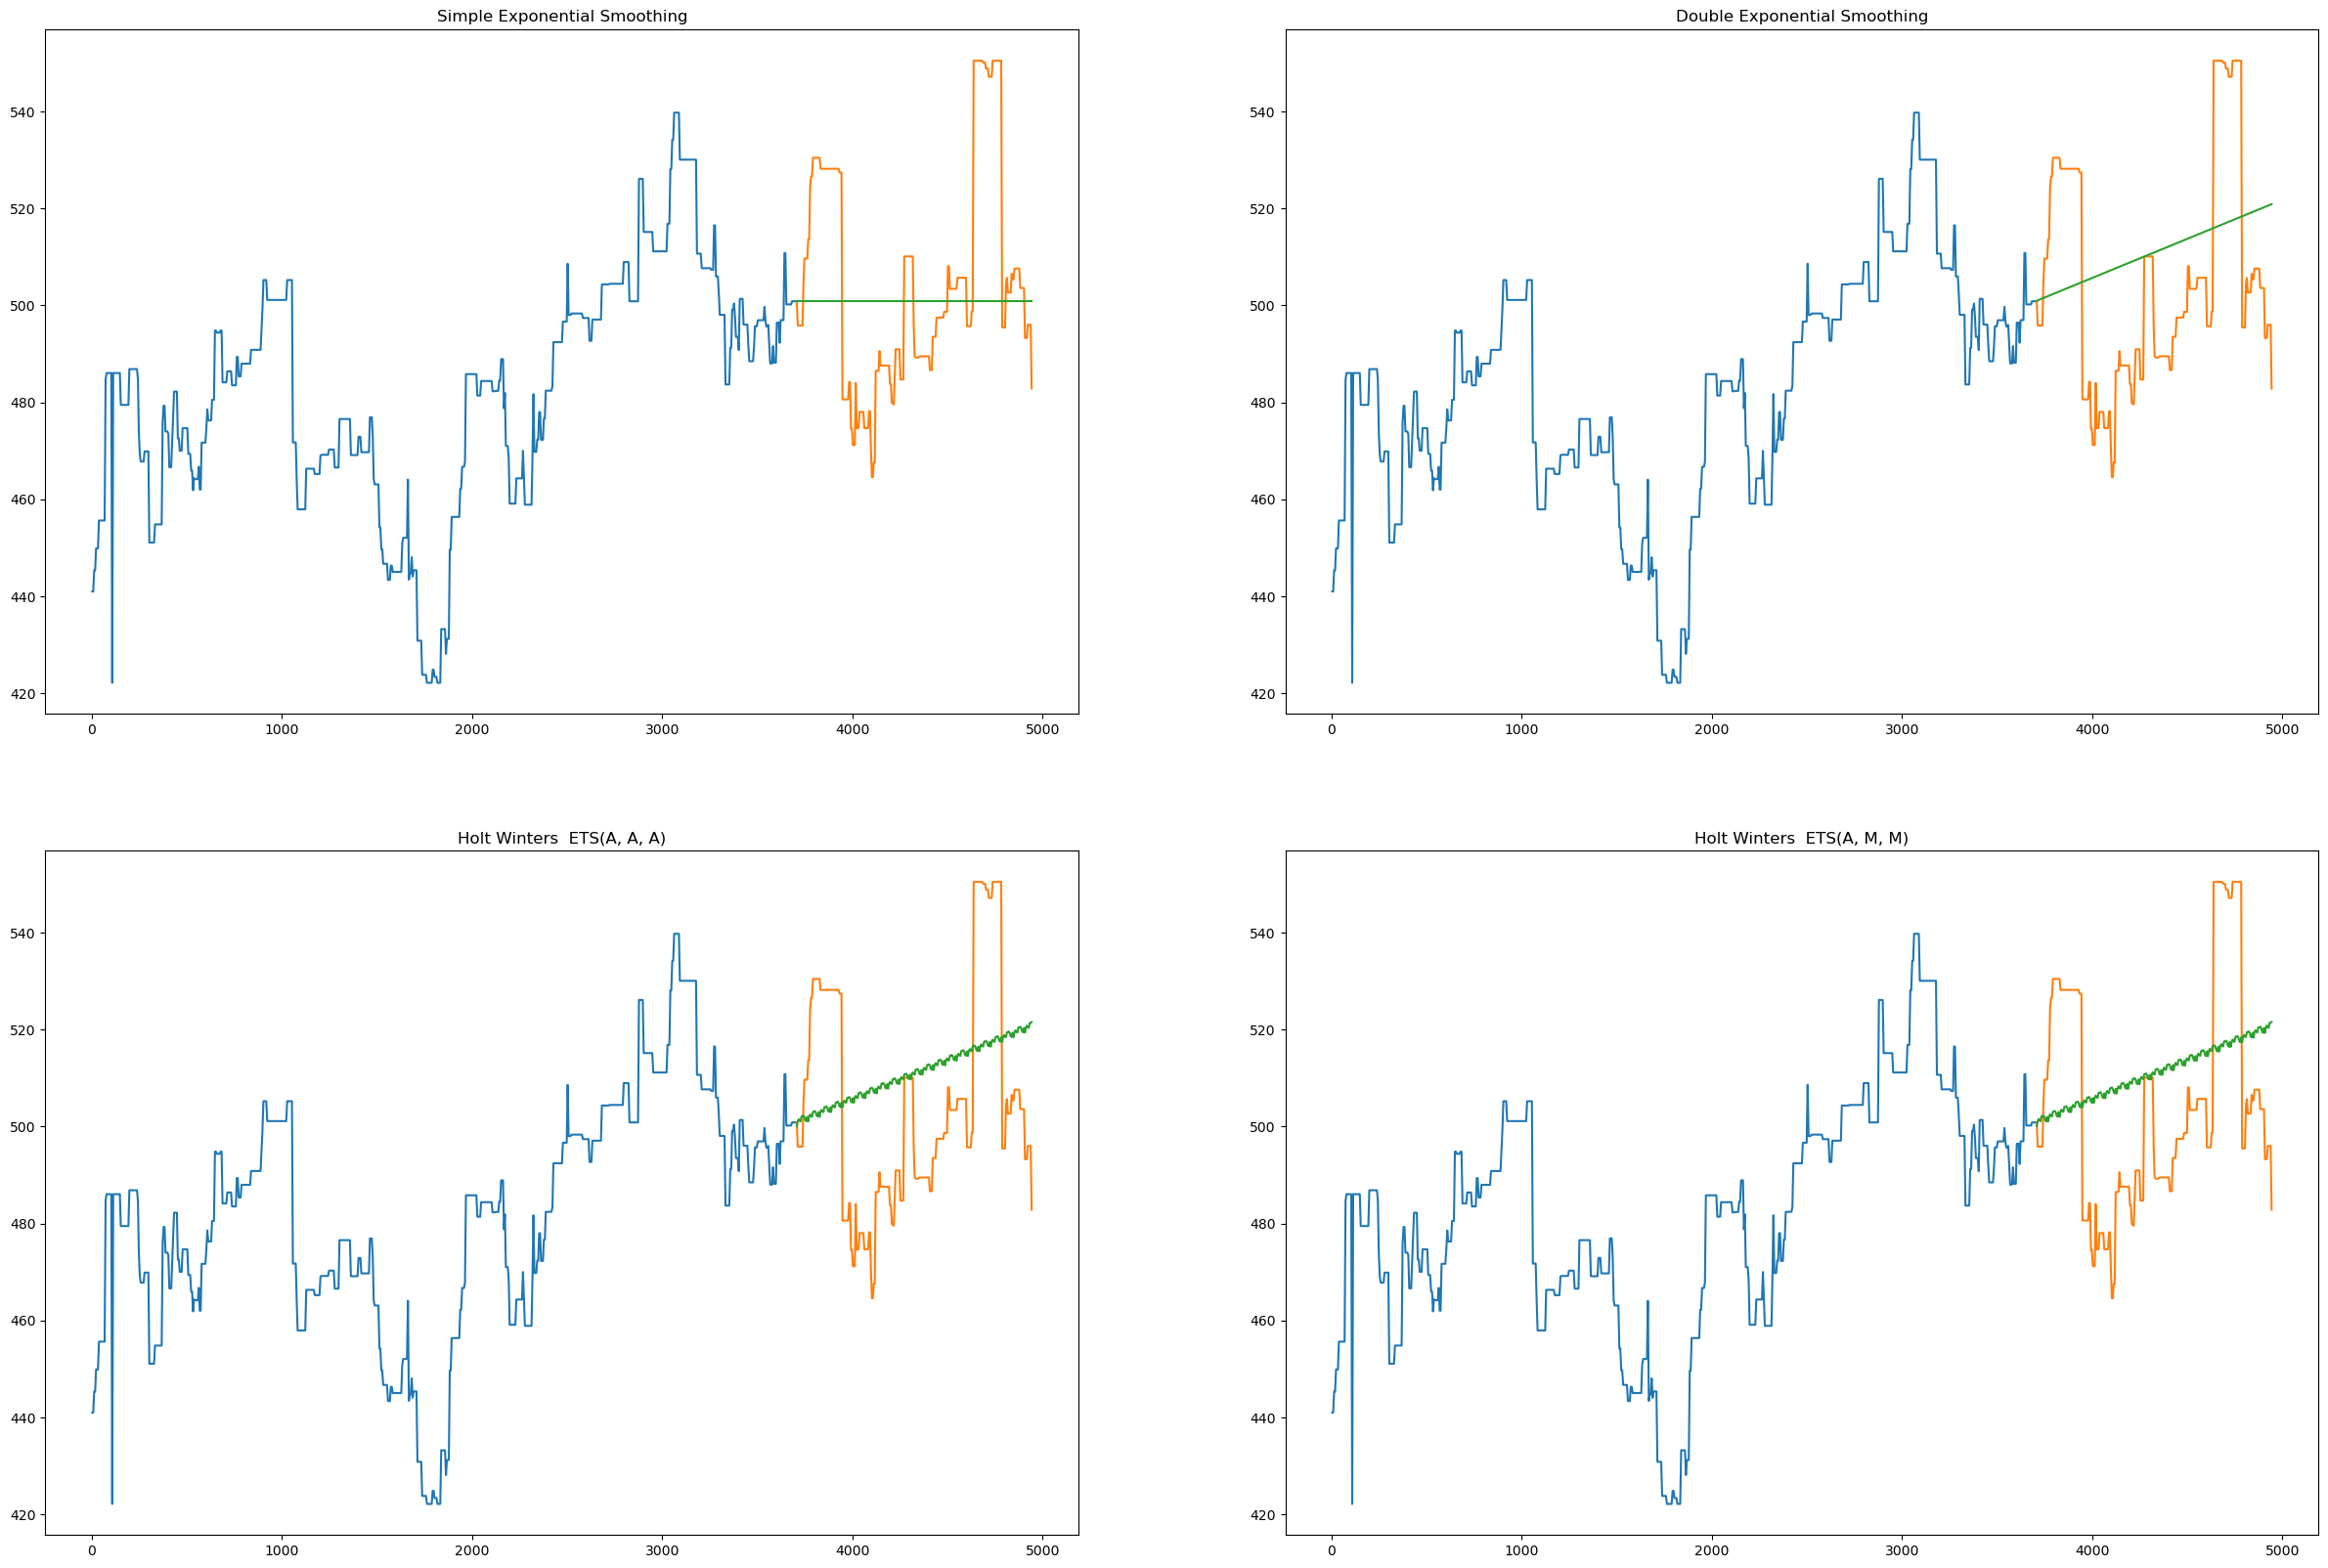

In [265]:
ExpSmooth(df_eastern_train,'Thermal Generation Actual (in MU)',df_eastern_test)
arima(df_eastern_train,'Thermal Generation Actual(in MU)',df_eastern_test)

                MAPE:      RMSE:
Auto-Arima   3.503505  23.178226
Auto-Sarima  4.344048  30.007487
None


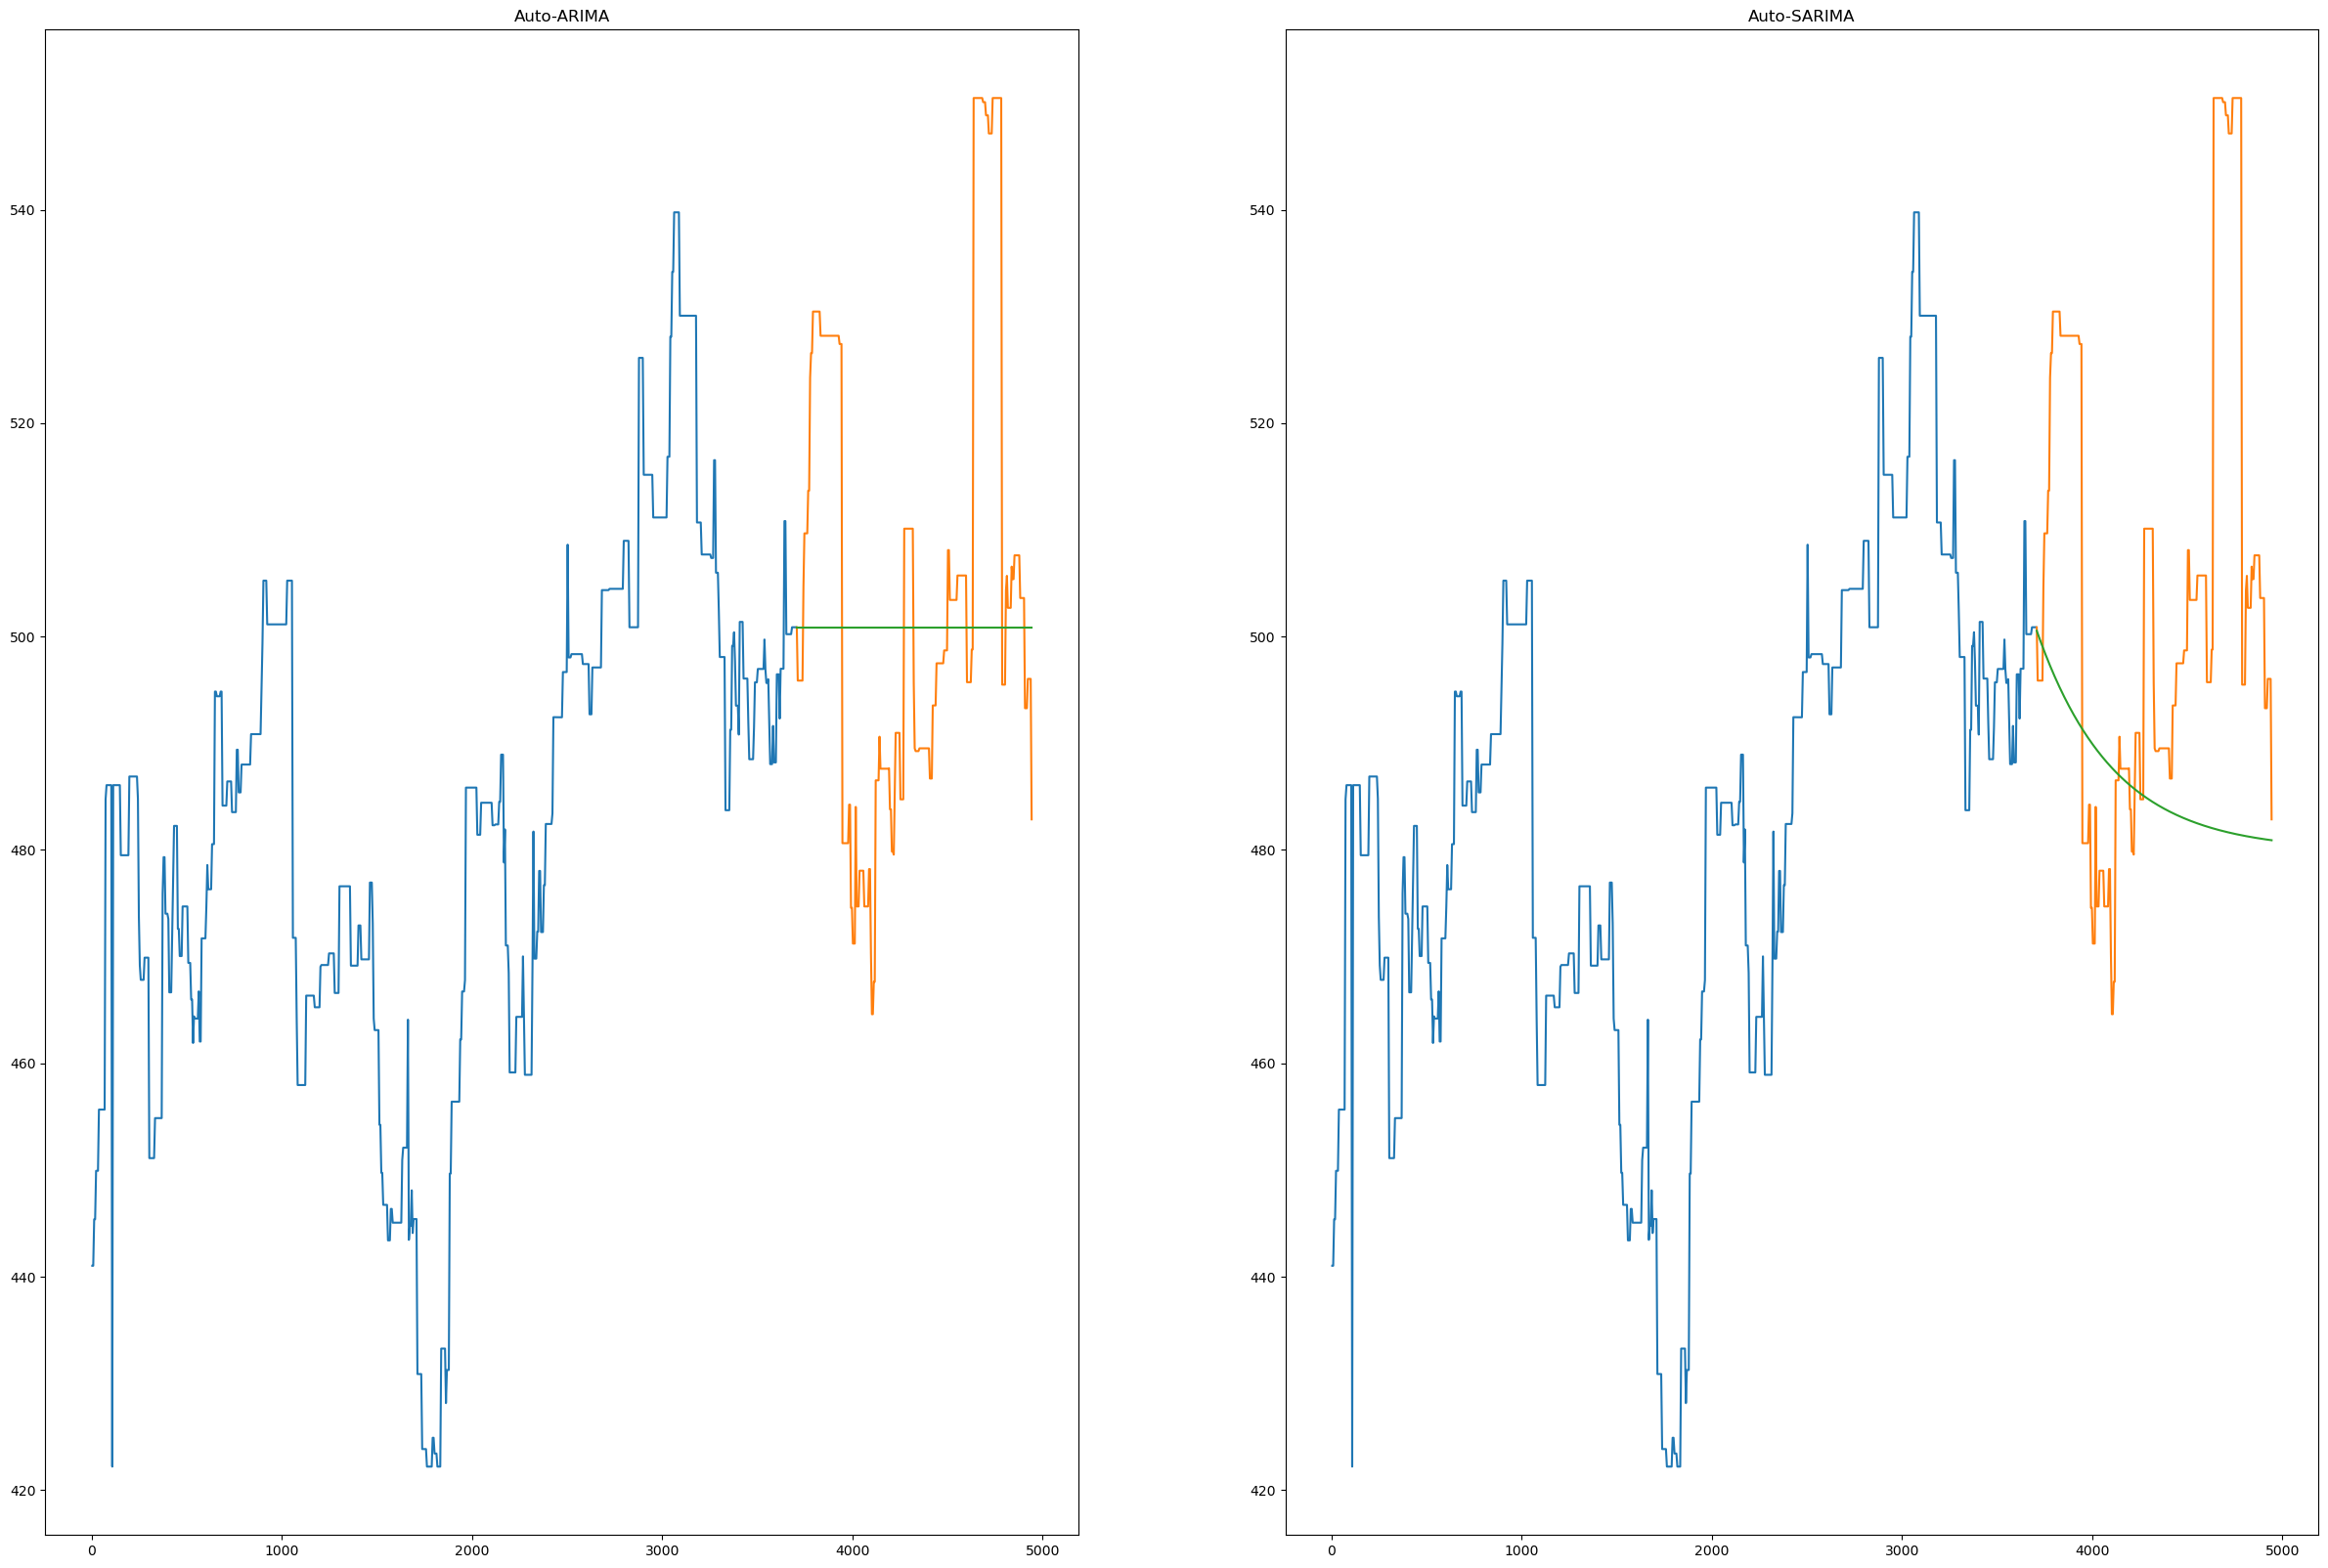

In [266]:
result=arima(df_eastern_train,'Thermal Generation Actual (in MU)',df_eastern_test)
print (result)